# NBA CAPSTONE PROJECT

#### The following notebook contains all the code used for the forumulation of this project. The sections are broken down into:
#### I. Data Collecting
#### II. Data Wrangling
#### III. Data Storytelling
#### IV. Exploratory Data Analysis - Inferential Statistics & Machine Learning

## I. Data Collecting

In [1]:
#importing necessary modules

import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pytz
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#enumerating the dates of urls that data will be scraped from
#data is compromised from the 2014-2015 through the 2017-2018 NBA regular seasons (4 seasons)

base_url = 'http://www.espn.com/nba/scoreboard/_/date/'

#2014-2015 regular season dates
OCT4 = [str(x+1) for x in range(20141027,20141031)]
NOV4 = [str(x+1) for x in range(20141100,20141130)]
DEC4 = [str(x+1) for x in range(20141200,20141231)]
JAN4 = [str(x+1) for x in range(20150100,20150131)]
FEB4 = [str(x+1) for x in range(20150200,20150228)]
MAR4 = [str(x+1) for x in range(20150300,20150331)]
APR4 = [str(x+1) for x in range(20150400,20150416)]

#2015-2016 regular season dates
OCT5 = [str(x+1) for x in range(20151026,20151031)]
NOV5 = [str(x+1) for x in range(20151100,20151130)]
DEC5 = [str(x+1) for x in range(20151200,20151231)]
JAN5 = [str(x+1) for x in range(20160100,20160131)]
FEB5 = [str(x+1) for x in range(20160200,20160229)]
MAR5 = [str(x+1) for x in range(20160300,20160331)]
APR5 = [str(x+1) for x in range(20160400,20160414)]

#2016-2017 regular season dates
OCT6 = [str(x+1) for x in range(20161024,20161031)]
NOV6 = [str(x+1) for x in range(20161100,20161130)]
DEC6 = [str(x+1) for x in range(20161200,20161231)]
JAN6 = [str(x+1) for x in range(20170100,20170131)]
FEB6 = [str(x+1) for x in range(20170200,20170228)]
MAR6 = [str(x+1) for x in range(20170300,20170331)]
APR6 = [str(x+1) for x in range(20170400,20170413)]

#2017-2018 regular season dates
OCT7 = [str(x+1) for x in range(20171016,20171031)]
NOV7 = [str(x+1) for x in range(20171100,20171130)]
DEC7 = [str(x+1) for x in range(20171200,20171231)]
JAN7 = [str(x+1) for x in range(20180100,20180131)]
FEB7 = [str(x+1) for x in range(20180200,20180228)]
MAR7 = [str(x+1) for x in range(20180300,20180331)]
APR7 = [str(x+1) for x in range(20180400,20180411)]

FEB4.remove('20150215')#remove all star game
FEB5.remove('20160214')#remove all star game
FEB6.remove('20170219')#remove all star game
FEB7.remove('20180216')#remove rising stars game
FEB7.remove('20180218')#remove all star game

DATES = OCT4 + NOV4 + DEC4 + JAN4 + FEB4 + MAR4 + APR4 + OCT5 + NOV5 + DEC5 + JAN5 + FEB5 + MAR5 + APR5 +\
OCT6 + NOV6 + DEC6 + JAN6 + FEB6 + MAR6 + APR6 + OCT7 + NOV7 + DEC7 + JAN7 + FEB7 + MAR7 + APR7

urls = [base_url + DATES[i] for i,x in enumerate(DATES)]

In [3]:
#scraping team names from espn.com

team_names_scrape = []

def find_teams(doc):
    start = doc.find('shortDisplayName')
    start = start + 18
    end = start + 50
    terminate = doc.find('</head>')
    
    name = doc[start:end]
    name_list = name.split(',')
    name = name.replace(" " , "")
    team = name_list[0].strip('"')
    team_names_scrape.append(team)
    if end < terminate:
        find_teams(doc[end:])
    else:
        return team_names_scrape

In [4]:
#list of all NBA teams

teams = ['Hawks','Celtics','Nets','Hornets','Bulls','Cavaliers','Mavericks','Nuggets','Pistons','Warriors',\
'Rockets','Pacers','Clippers','Lakers','Grizzlies','Heat','Bucks','Timberwolves','Pelicans','Knicks','Thunder',\
'Magic','76ers','Suns','Trail Blazers', 'Kings','Spurs','Raptors','Jazz','Wizards']

In [5]:
#function checks if team names acquired from espn.com match teams list and appends to new list for team names

def clean_names():
    team_list = []
    for team in team_names_scrape:
        try:
            if team in teams:
                team_list.append(team)
        except(IndexError):
            print("List is ready")
    for i,team in enumerate(team_list):
        try: 
            if team_list[i+1] == team_list[i]:
                team_list.remove(team_list[i+1])
        except IndexError:
            return team_list
    return team_list

In [6]:
#function scrapes espn.com for all final game scores for both teams in a game and appends them to list

team_scores = []

def find_team_score(doc):
    start = doc.find('homeAway')
    end = start + 40
    terminate = doc.find('</head>')
    sc = doc[start:end]
    sc_list = sc.split(',')    
    sco = sc_list[1]
    scor = sco.split(':')
    score = scor[-1].strip('"')
    
    team_scores.append(score)
    
    if score == '':
        team_scores.remove(score)
    if score == '0':
        team_scores.remove(score)
        
    for score in range(len(team_scores)):
        team_scores[score] = int(team_scores[score])
  
       
    if end < terminate:
        find_team_score(doc[end:])
    else:
        return team_scores

In [7]:
#scraping all dates and times of games

datetimes = []

def find_dates(doc):
    
    soup = BeautifulSoup(doc, 'html.parser')
    body = soup.text
    
    start = body.find('attendance')
    end = start + 60
    terminate = body.find('\n\t\t\t\t\t\n')
    sc = body[start:end]
    sc_list = sc.split(',')
    sc_list1 = sc_list[1]
    dt = sc_list1[13:-2]
        
    datetimes.append(dt)
    
    try:    
        if end < terminate:
            find_dates(body[end:])
        else:
            return datetimes
    except(IndexError):
        return datetimes 

In [8]:
#grabbing all scores in the first quarter for both teams in a game

first_quarter_scores = []

def find_first_quarter_score(doc):  
    start = doc.find('linescores":[{"value":')
    end = start + 24
    terminate = doc.find('\n\t\t\t\t\t\n')
    sc = doc[start:end]
    sc1 = sc.split('}')
    sc1q = sc1[0]
    if sc1q[-2] == ':':
        score = sc1q[-1]
    else:
        score = sc1q[-2:]
    first_quarter_scores.append(score)
    
    if score == '':
        first_quarter_scores.remove(score)
   
    for score in range(len(first_quarter_scores)):
        first_quarter_scores[score] = int(first_quarter_scores[score])
    
    try:  
        if end < terminate:
            find_first_quarter_score(doc[end:])
        else:
            return team_list
    except(IndexError):
        return first_quarter_scores

In [9]:
#grabbing all scores in the second quarter for both teams in a game


second_quarter_scores = []

def find_second_quarter_score(doc): 
    start = doc.find('linescores":[{"value":')
    end = start + 37
    terminate = doc.find('\n\t\t\t\t\t\n')
    sc = doc[start:end]
    sc2 = sc.split('}')
    sc2q = sc2[1]
    if sc2q[-1] == '}':
        sc2q.pop[-1]
    if sc2q[-2] == ':':
        score = sc2q[-1]
    else:
        score = sc2q[-2:]
    
    second_quarter_scores.append(score)
    
    if score == '':
        second_quarter_scores.remove(score)
    
    for score in range(len(second_quarter_scores)):
        second_quarter_scores[score] = int(second_quarter_scores[score])

    try:  
        if end < terminate:
            find_second_quarter_score(doc[end:])
        else:
            return team_list
    except(IndexError):
        return second_quarter_scores

In [10]:
#grabbing all scores in the third quarter for both teams in a game


third_quarter_scores = []

def find_third_quarter_score(doc): 
    start = doc.find('linescores":[{"value":')
    end = start + 50
    terminate = doc.find('\n\t\t\t\t\t\n')
    sc = doc[start:end]
    sc3 = sc.split('}')
    sc3q = sc3[2]
    if sc3q[-1] == '}':
        sc3q.pop[-1]
    if sc3q[-2] == ':':
        score = sc3q[-1]
    else:
        score = sc3q[-2:]
    
    third_quarter_scores.append(score)
    
    if score == '':
        third_quarter_scores.remove(score)
    
    for score in range(len(third_quarter_scores)):
        third_quarter_scores[score] = int(third_quarter_scores[score])
    
    try:  
        if end < terminate:
            find_third_quarter_score(doc[end:])
        else:
            print('end of teams')
    except(IndexError):
        return third_quarter_scores

In [11]:
#grabbing all scores in the fourth quarter for both teams in a game


fourth_quarter_scores = []

def find_fourth_quarter_score(doc): 
    start = doc.find('linescores":[{"value":')
    end = start + 63
    terminate = doc.find('\n\t\t\t\t\t\n')
    sc = doc[start:end]
    sc4 = sc.split('}')
    sc4q = sc4[3]
    if sc4q[-1] == '}':
        sc4q.pop[-1]
    if sc4q[-2] == ':':
        score = sc4q[-1]
    else:
        score = sc4q[-2:]
    
    fourth_quarter_scores.append(score)
    
    if score == '':
        fourth_quarter_scores.remove(score)
    
    for score in range(len(fourth_quarter_scores)):
        fourth_quarter_scores[score] = int(fourth_quarter_scores[score])
   
    try:  
        if end < terminate:
            find_fourth_quarter_score(doc[end:])
        else:
            print('end of teams')
    except(IndexError):
        return fourth_quarter_scores

In [12]:
#function encompasses all previous functions for enumerated urls

def all_data():
    
    for url in urls:
        try:
            
            r = requests.get(url)
            html_doc = r.text
            find_teams(html_doc)
        
            names = clean_names()
            find_team_score(html_doc)
            find_dates(html_doc)
            find_first_quarter_score(html_doc)
            find_second_quarter_score(html_doc)
            find_third_quarter_score(html_doc)
            find_fourth_quarter_score(html_doc)
        except(IndexError):
            print('Function Check')
        
    return names

In [13]:
#runs major function, with names equalling the list of teams by game

names = all_data()

Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check
Function Check


In [14]:
print(len(names))
print(len(team_scores))
print(len(datetimes))

9857
9840
4928


## II. Data Wrangling

In [15]:
#insert missing team name that did not get correctly scraped
names.insert(9, '76ers')

In [16]:
#removing values in list of names and datetimes that incorrectly get scraped

#2017-2018 removing values of a postponed game between the pacers and pelicans
names.pop(9013)
names.pop(9012)
datetimes.pop(4506)

#2016-2017 removing values of 3 postponed games and the kings and 76ers mistakenly being counted an extra time 
names.pop(8434)
names.pop(6876)
names.pop(6811) 
names.pop(6810) 
datetimes.pop(3405)
names.pop(6045) 
names.pop(6044) 
datetimes.pop(3022)
names.pop(5459) 
names.pop(5458) 
datetimes.pop(2729)

#2015-2016 removing values of 2 postponed games on 1/23/2016 and the suns mistakenly being counted an extra time
names.pop(3775) 
names.pop(3774) 
datetimes.pop(1887)
names.pop(3771) 
names.pop(3770) 
datetimes.pop(1885)

#2014-2015 removing values of 2 postponed games on 1/26/2015 
names.pop(1337)
names.pop(1336)
names.pop(1335)
names.pop(1334)
datetimes.pop(668)
datetimes.pop(667)

'2015-01-27T00:30'

In [17]:
#checking lists are configured to the corrext sizes so data matches up
print(len(names))
print(len(team_scores))
print(len(datetimes))

9840
9840
4920


In [18]:
#appends team names and scores to lists based on if the team is home or away

h_team, a_team, h_score, a_score = [],[],[],[]
def match_data(teams,scores):
    try:#inputs are lists
        for i in range(0, len(scores), 2):
            h_team.append(teams[i])
            a_team.append(teams[i+1])
            h_score.append(scores[i])
            a_score.append(scores[i+1])
        if len(teams) != len(scores):
            print("There's a mismatch somewhere.")
    except(IndexError):
        print('Ready')
match_data(names, team_scores)

In [19]:
#appends quarter scores to lists based on if team is home or away

h_1q, a_1q, h_2q, a_2q, h_3q, a_3q, h_4q, a_4q = [],[],[],[],[],[],[],[]
def match_quarters(q1,q2,q3,q4):
    try:#inputs are lists
        for i in range(0, len(q4), 2):
            h_1q.append(q1[i])
            a_1q.append(q1[i+1])
            h_2q.append(q2[i])
            a_2q.append(q2[i+1])
            h_3q.append(q3[i])
            a_3q.append(q3[i+1])
            h_4q.append(q4[i])
            a_4q.append(q4[i+1])
        if len(q1) != len(q3):
            print("There's a mismatch somewhere.")
    except(IndexError):
        print('Ready')
match_quarters(first_quarter_scores, second_quarter_scores, third_quarter_scores, fourth_quarter_scores)

In [20]:
#inputs all data into pandas dataframe

data = {"Date":datetimes,"Home":h_team, "H_Score": h_score, "Away": a_team, "A_Score": a_score, "H_1Q":h_1q, "H_2Q":\
h_2q, "H_3Q":h_3q, "H_4Q":h_4q,"A_1Q":a_1q, "A_2Q":a_2q, "A_3Q":a_3q, "A_4Q":a_4q }
df = pd.DataFrame(data)

print(df.shape)
df.head()

(4920, 13)


,Date,Home,H_Score,Away,A_Score,H_1Q,H_2Q,H_3Q,H_4Q,A_1Q,A_2Q,A_3Q,A_4Q
0,2014-10-29T00:00,Pelicans,101,Magic,84,24,24,30,23,25,16,23,20
1,2014-10-29T00:00,Spurs,101,Mavericks,100,26,19,31,25,24,29,20,27
2,2014-10-29T02:30,Lakers,90,Rockets,108,19,26,24,21,31,31,23,23
3,2014-10-29T23:00,Hornets,108,Bucks,106,25,21,22,32,24,33,26,17
4,2014-10-29T23:00,Pacers,103,76ers,91,26,22,30,25,24,27,22,18


In [21]:
#create separate data and time columns, converting the time zone to EST

df['Date'] = df['Date'].map(lambda row: row.replace('T',' '))
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M')

In [22]:
#set date as index
df = df.set_index('Date')

In [23]:
#convert to EST 
df = df.tz_localize('Zulu').tz_convert('US/Eastern')

In [24]:
#reset index
df.reset_index(level=0, inplace=True)

In [25]:
#create time of day data column
df['Time'] = [x.time() for x in df['Date']]

In [26]:
#convert to datetime
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S')

In [27]:
#configure correct format for time
df['Time'] = df['Time'].dt.strftime('%H:%M')

In [28]:
#configure correct format for date

df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [29]:
#order data columns in df
df = df[['Date', 'Time', 'Home', 'H_Score', 'Away', 'A_Score', 'H_1Q', 'H_2Q', 'H_3Q', 'H_4Q', \
'A_1Q', 'A_2Q', 'A_3Q', 'A_4Q']]

In [30]:
#dataframe takes all rows of only home games (which is original dataframe), adds home column and adjusts column names

df_home = df
df_home['Home/Away'] = df_home.apply(lambda row: 'Home', axis = 1)
df_home = df_home.rename(columns={'Home':'Team', 'H_Score':'Score','Away':'Opponent','A_Score':'OpponentScore',\
'H_1Q':'1Q','H_2Q':'2Q','H_3Q':'3Q','H_4Q':'4Q', 'A_1Q':'O_1Q', 'A_2Q':'O_2Q','A_3Q':'O_3Q','A_4Q':'O_4Q'})

In [31]:
#calculates home team's and opponent's halftime scores per game by adding first and second quarters together
#number column will be used to sort df back into original order after concatenation of home and road games as well as 
#provide a reference for which number game it is in the season

df_home['HtScore'] = df_home['1Q'] + df_home['2Q']
df_home['O_HtScore'] = df_home['O_1Q'] + df_home['O_2Q']
df_home['Number'] = range(1, (len(df_home)+1),1)

df_home.head()

,Date,Time,Team,Score,Opponent,OpponentScore,1Q,2Q,3Q,4Q,O_1Q,O_2Q,O_3Q,O_4Q,Home/Away,HtScore,O_HtScore,Number
0,2014-10-28,20:00,Pelicans,101,Magic,84,24,24,30,23,25,16,23,20,Home,48,41,1
1,2014-10-28,20:00,Spurs,101,Mavericks,100,26,19,31,25,24,29,20,27,Home,45,53,2
2,2014-10-28,22:30,Lakers,90,Rockets,108,19,26,24,21,31,31,23,23,Home,45,62,3
3,2014-10-29,19:00,Hornets,108,Bucks,106,25,21,22,32,24,33,26,17,Home,46,57,4
4,2014-10-29,19:00,Pacers,103,76ers,91,26,22,30,25,24,27,22,18,Home,48,51,5


In [32]:
#dataframe represents all team values as away teams

df_away = df
df_away['Home/Away'] = df_away.apply(lambda row: 'Away', axis = 1)
df_away = df.rename(columns={'Away':'Team', 'A_Score':'Score','Home':'Opponent','H_Score':'OpponentScore','H_1Q':\
'O_1Q','H_2Q':'O_2Q','H_3Q':'O_3Q','H_4Q':'O_4Q', 'A_1Q':'1Q', 'A_2Q':'2Q','A_3Q':'3Q','A_4Q':'4Q'})

In [33]:
#calculates away team's and opponent's halftime scores per game

df_away['HtScore'] = df_away['1Q'] + df_away['2Q']
df_away['O_HtScore'] = df_away['O_1Q'] + df_away['O_2Q']
df_away['Number'] = range(1, (len(df_away)+1),1)

df_away.head()

,Date,Time,Opponent,OpponentScore,Team,Score,O_1Q,O_2Q,O_3Q,O_4Q,1Q,2Q,3Q,4Q,Home/Away,HtScore,O_HtScore,Number
0,2014-10-28,20:00,Pelicans,101,Magic,84,24,24,30,23,25,16,23,20,Away,41,48,1
1,2014-10-28,20:00,Spurs,101,Mavericks,100,26,19,31,25,24,29,20,27,Away,53,45,2
2,2014-10-28,22:30,Lakers,90,Rockets,108,19,26,24,21,31,31,23,23,Away,62,45,3
3,2014-10-29,19:00,Hornets,108,Bucks,106,25,21,22,32,24,33,26,17,Away,57,46,4
4,2014-10-29,19:00,Pacers,103,76ers,91,26,22,30,25,24,27,22,18,Away,51,48,5


In [34]:
#concatenate dataframes of all home games and away games. This doubles the size of original dataframe, with each game
#being represented as two rows, one for each team. Sort by date and number to return dataframe to original order and 
#organize column names

df = pd.concat([df_home,df_away])
df = df.sort_values(by = ['Date','Number'])
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df = df[['Date','Time','Team','Home/Away','Opponent','1Q','2Q','HtScore','3Q','4Q',\
'Score','O_1Q','O_2Q','O_HtScore','O_3Q','O_4Q','OpponentScore','Number' ]]

df.head()

,Date,Time,Team,Home/Away,Opponent,1Q,2Q,HtScore,3Q,4Q,Score,O_1Q,O_2Q,O_HtScore,O_3Q,O_4Q,OpponentScore,Number
0,2014-10-28,20:00,Pelicans,Home,Magic,24,24,48,30,23,101,25,16,41,23,20,84,1
0,2014-10-28,20:00,Magic,Away,Pelicans,25,16,41,23,20,84,24,24,48,30,23,101,1
1,2014-10-28,20:00,Spurs,Home,Mavericks,26,19,45,31,25,101,24,29,53,20,27,100,2
1,2014-10-28,20:00,Mavericks,Away,Spurs,24,29,53,20,27,100,26,19,45,31,25,101,2
2,2014-10-28,22:30,Lakers,Home,Rockets,19,26,45,24,21,90,31,31,62,23,23,108,3


In [35]:
#upload excel file of statistics for each game in 2017-2018 season 

stats_file = '/Users/jeffreyebert/Documents/Springboard/Capstone/nba_stats.xlsx'

df_stats = pd.read_excel(stats_file)
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

print(df_stats.shape)
df_stats.head()

(9840, 23)


,Team,Game,Date,Home,Opponent,WINorLOSS,Points,FGM,FGA,FG%,...,FTM,FTA,FT%,OREB,REB,AST,STL,BLK,TO,PF
0,ATL,1,2014-10-29,Away,TOR,L,102,40,80,0.500,...,9,17,0.529,10,42,26,6,8,17,24
1,ATL,2,2014-11-01,Home,IND,W,102,35,69,0.507,...,25,33,0.758,3,37,26,10,6,12,20
2,ATL,3,2014-11-05,Away,SAS,L,92,38,92,0.413,...,8,11,0.727,10,37,26,14,5,13,25
3,ATL,4,2014-11-07,Away,CHO,L,119,43,93,0.462,...,20,26,0.769,7,38,28,8,3,19,33
4,ATL,5,2014-11-08,Home,NYK,W,103,33,81,0.407,...,28,36,0.778,12,41,18,10,5,8,17


In [36]:
#convert team names to abbreviations of teams using the statistics dataframe

nba_abrvs = list(df_stats['Team'].unique())
nba_teams_dict = dict(zip(teams,nba_abrvs))

df['Team'] = df['Team'].map(nba_teams_dict)
df['Opponent'] = df['Opponent'].map(nba_teams_dict)

df.head()

,Date,Time,Team,Home/Away,Opponent,1Q,2Q,HtScore,3Q,4Q,Score,O_1Q,O_2Q,O_HtScore,O_3Q,O_4Q,OpponentScore,Number
0,2014-10-28,20:00,NOP,Home,ORL,24,24,48,30,23,101,25,16,41,23,20,84,1
0,2014-10-28,20:00,ORL,Away,NOP,25,16,41,23,20,84,24,24,48,30,23,101,1
1,2014-10-28,20:00,SAS,Home,DAL,26,19,45,31,25,101,24,29,53,20,27,100,2
1,2014-10-28,20:00,DAL,Away,SAS,24,29,53,20,27,100,26,19,45,31,25,101,2
2,2014-10-28,22:30,LAL,Home,HOU,19,26,45,24,21,90,31,31,62,23,23,108,3


In [37]:
#fixing game that was given the wrong date
#df.iloc[6034, df.columns.get_loc('Date')] = '2017-01-08'
#df.iloc[6035, df.columns.get_loc('Date')] = '2017-01-08'

In [38]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [39]:
#merge scores and stats dataframes together. Add column of day game is played

df = pd.merge(df, df_stats, on = ['Date', 'Team'], how = 'left')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df['Day'] = df['Date'].dt.day_name()

print(df.shape)
df.head()

(9840, 40)


,Date,Time,Team,Home/Away,Opponent_x,1Q,2Q,HtScore,3Q,4Q,...,FTA,FT%,OREB,REB,AST,STL,BLK,TO,PF,Day
0,2014-10-28,20:00,NOP,Home,ORL,24,24,48,30,23,...,31,0.484,26,62,20,10,17,9,17,Tuesday
1,2014-10-28,20:00,ORL,Away,NOP,25,16,41,23,20,...,21,0.762,16,56,17,5,9,18,25,Tuesday
2,2014-10-28,20:00,SAS,Home,DAL,26,19,45,31,25,...,16,0.813,9,38,23,5,3,20,20,Tuesday
3,2014-10-28,20:00,DAL,Away,SAS,24,29,53,20,27,...,19,0.842,9,33,17,9,3,10,20,Tuesday
4,2014-10-28,22:30,LAL,Home,HOU,19,26,45,24,21,...,39,0.795,11,36,16,7,3,11,32,Tuesday


In [40]:
df = df.rename(columns = {'Opponent_x':'Opponent'})

In [41]:
df = df[['Date','Day','Time','Team','Home/Away','Opponent','1Q','2Q','HtScore','3Q','4Q','Score','O_1Q','O_2Q',\
'O_HtScore','O_3Q','O_4Q','OpponentScore','FGM', 'FGA', 'FG%','3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',\
'REB', 'AST','STL', 'BLK', 'TO', 'PF','Number' ]]

In [42]:
#import excel file of lines and totals for all games in 2017-2018 NBA season

lines_file = '/Users/jeffreyebert/Documents/Logs/NBAlines.xlsx'

df_lines = pd.read_excel(lines_file)

print(df_lines.shape)
df_lines.head()

(9840, 6)


,Date,Team,Homeaway,Opponent,Line,Total
0,20171017,Cavaliers,home,Celtics,-3.5,212.5
1,20171017,Celtics,away,Cavaliers,3.5,212.5
2,20171017,Warriors,home,Rockets,-9.0,228.5
3,20171017,Rockets,away,Warriors,9.0,228.5
4,20171018,Celtics,home,Bucks,-2.0,206.0


In [43]:
#data column type based off spread of game, if a team is favored to win they are of type Fav, if an underdog they are 
#of type dog and if the spread is even teams are labeled as Pickem 
#fixed spelling of Trail Blazers, 76ers, adjusted team names to abbreviations, and changed date to datetime format

df_lines['Type'] = df_lines.apply(lambda row: 'Dog' if row[4] > 0 else 'Fav', axis=1)
df_lines['Type'] = df_lines.apply(lambda row: 'Pickem' if row[4] == 0 else row[6], axis=1)
df_lines['Team'] = df_lines.apply(lambda row: 'Trail Blazers' if row[1] == 'Trailblazers' else row[1],axis=1)
df_lines['Opponent'] = df_lines.apply(lambda row: 'Trail Blazers' if row[3] == 'Trailblazers' else row[3],axis=1)
df_lines['Team'] = df_lines.apply(lambda row: '76ers'  if row[1] == 'Seventysixers' else row[1],axis=1)
df_lines['Opponent'] = df_lines.apply(lambda row: '76ers'  if row[3] == 'Seventysixers' else row[3],axis=1)
df_lines['Team'] = df_lines['Team'].map(nba_teams_dict)
df_lines['Opponent'] = df_lines['Opponent'].map(nba_teams_dict)
df_lines['Date'] = pd.to_datetime(df_lines['Date'], format = '%Y%m%d')
df_lines = df_lines[['Date', 'Team', 'Opponent', 'Line', 'Total', 'Type']]

df_lines.head()

,Date,Team,Opponent,Line,Total,Type
0,2017-10-17,CLE,BOS,-3.5,212.5,Fav
1,2017-10-17,BOS,CLE,3.5,212.5,Dog
2,2017-10-17,GSW,HOU,-9.0,228.5,Fav
3,2017-10-17,HOU,GSW,9.0,228.5,Dog
4,2017-10-18,BOS,MIL,-2.0,206.0,Fav


In [44]:
#merge dataframes with scores and states with dataframes of lines

df = pd.merge(df, df_lines, on = ['Date','Team'], how = 'left')
df = df.sort_values(by = ['Date','Time'])
df = df.drop(columns = ['Opponent_y'])
df = df.rename(columns = {'Opponent_x':'Opponent'})

print(df.shape)
df.head()

(9840, 38)


,Date,Day,Time,Team,Home/Away,Opponent,1Q,2Q,HtScore,3Q,...,REB,AST,STL,BLK,TO,PF,Number,Line,Total,Type
0,2014-10-28,Tuesday,20:00,NOP,Home,ORL,24,24,48,30,...,62,20,10,17,9,17,1,-10.0,192.0,Fav
1,2014-10-28,Tuesday,20:00,ORL,Away,NOP,25,16,41,23,...,56,17,5,9,18,25,1,10.0,192.0,Dog
2,2014-10-28,Tuesday,20:00,SAS,Home,DAL,26,19,45,31,...,38,23,5,3,20,20,2,-3.5,203.0,Fav
3,2014-10-28,Tuesday,20:00,DAL,Away,SAS,24,29,53,20,...,33,17,9,3,10,20,2,3.5,203.0,Dog
4,2014-10-28,Tuesday,22:30,LAL,Home,HOU,19,26,45,24,...,36,16,7,3,11,32,3,7.0,207.0,Dog


In [45]:
#Result column indicates if a team won or lost the current game
#Margin column represents total a team won or lost the game by
#SpreadResult indicates if a team won,lost or pushed (tied) vs the spread in the current game
#TotalResult represents if the amount of points scored in the game was over, under or equal to the predicted game total
#HtResult represents if a team is winning, losing or tied with its opponent at halftime of the game
#TotalPoints equals the total points scored in the game by both teams

df['Result'] = df.apply(lambda row: 'W' if row[11] > row[17] else 'L', axis = 1)
df['Margin'] = df.apply(lambda row: row[11] - row[17], axis = 1)
df['SpreadResult'] = df.apply(lambda row: 'W' if row[39] > abs(row[35]) and row[35] < 0 else 'L', axis =1)
df['SpreadResult'] = df.apply(lambda row: 'W' if abs(row[39]) < row[35] and row[35] > 0 else row[40], axis =1)
df['SpreadResult'] = df.apply(lambda row: 'W' if row[39] > 0 and row[35] > 0 else row[40], axis =1)
df['SpreadResult'] = df.apply(lambda row: 'W' if row[35] >= row[39] and row[38] == 'W' and row[35] > 0 else row[40], axis =1)
df['SpreadResult'] = df.apply(lambda row: 'W' if row[35] == 0.0 and row[39] > 0 else row[40], axis =1)
df['SpreadResult'] = df.apply(lambda row: 'P' if row[35] == abs(row[39]) and row[39] < 0 else row[40], axis=1) 
df['SpreadResult'] = df.apply(lambda row: 'P' if abs(row[35]) == row[39] and row[35] < 0 else row[40], axis=1) 
df['TotalResult'] = df.apply(lambda row: 'Over' if row[11] + row[17] > row[36] else 'Under',axis =1)
df['TotalResult'] = df.apply(lambda row: 'Equal' if row[11] + row[17] == row[36] else row[41],axis =1)
df['HtResult'] = df.apply(lambda row: 'W' if row[8] > row[14] else 'L', axis=1)
df['HtResult'] = df.apply(lambda row: 'Tie' if row[8] == row[14] else row[42],axis=1)
df['HtMargin'] = df.apply(lambda row: row[8] - row[14], axis = 1)
df['TotalPoints'] = df.apply(lambda row: row[11] + row[17],axis =1)
df = df[['Date', 'Day', 'Time', 'Team', 'Home/Away', 'Opponent', '1Q', '2Q','HtScore', '3Q', '4Q', 'Score', 'O_1Q',\
'O_2Q', 'O_HtScore', 'O_3Q','O_4Q', 'OpponentScore', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%','FTM', 'FTA', 'FT%',\
'OREB', 'REB', 'AST', 'STL', 'BLK', 'TO','PF','Margin', 'Result','Line', 'Type','SpreadResult','HtMargin',\
'HtResult','Total','TotalPoints','TotalResult','Number']]

df.head()

,Date,Day,Time,Team,Home/Away,Opponent,1Q,2Q,HtScore,3Q,...,Result,Line,Type,SpreadResult,HtMargin,HtResult,Total,TotalPoints,TotalResult,Number
0,2014-10-28,Tuesday,20:00,NOP,Home,ORL,24,24,48,30,...,W,-10.0,Fav,W,7,W,192.0,185,Under,1
1,2014-10-28,Tuesday,20:00,ORL,Away,NOP,25,16,41,23,...,L,10.0,Dog,L,-7,L,192.0,185,Under,1
2,2014-10-28,Tuesday,20:00,SAS,Home,DAL,26,19,45,31,...,W,-3.5,Fav,L,-8,L,203.0,201,Under,2
3,2014-10-28,Tuesday,20:00,DAL,Away,SAS,24,29,53,20,...,L,3.5,Dog,W,8,W,203.0,201,Under,2
4,2014-10-28,Tuesday,22:30,LAL,Home,HOU,19,26,45,24,...,L,7.0,Dog,L,-17,L,207.0,198,Under,3


In [46]:
#adding Season column to df to designate where to separate in upcoming functions
df['Season'] = df.apply(lambda row: '14-15' if row[0] < datetime.strptime('2015-10-01', '%Y-%m-%d') else 'no season', axis = 1)
df['Season'] = df.apply(lambda row: '15-16' if row[0] < datetime.strptime('2016-10-01', '%Y-%m-%d') and row[0] > datetime.strptime('2015-10-01', '%Y-%m-%d') else row[-1], axis = 1)
df['Season'] = df.apply(lambda row: '16-17' if row[0] < datetime.strptime('2017-10-01', '%Y-%m-%d') and row[0] > datetime.strptime('2016-10-01', '%Y-%m-%d') else row[-1], axis = 1)
df['Season'] = df.apply(lambda row: '17-18' if row[0] < datetime.strptime('2018-10-01', '%Y-%m-%d') and row[0] > datetime.strptime('2017-10-01', '%Y-%m-%d') else row[-1], axis = 1)

df.head()

,Date,Day,Time,Team,Home/Away,Opponent,1Q,2Q,HtScore,3Q,...,Line,Type,SpreadResult,HtMargin,HtResult,Total,TotalPoints,TotalResult,Number,Season
0,2014-10-28,Tuesday,20:00,NOP,Home,ORL,24,24,48,30,...,-10.0,Fav,W,7,W,192.0,185,Under,1,14-15
1,2014-10-28,Tuesday,20:00,ORL,Away,NOP,25,16,41,23,...,10.0,Dog,L,-7,L,192.0,185,Under,1,14-15
2,2014-10-28,Tuesday,20:00,SAS,Home,DAL,26,19,45,31,...,-3.5,Fav,L,-8,L,203.0,201,Under,2,14-15
3,2014-10-28,Tuesday,20:00,DAL,Away,SAS,24,29,53,20,...,3.5,Dog,W,8,W,203.0,201,Under,2,14-15
4,2014-10-28,Tuesday,22:30,LAL,Home,HOU,19,26,45,24,...,7.0,Dog,L,-17,L,207.0,198,Under,3,14-15


In [47]:
#putting all team names and seasons into lists

team_list = list(df['Team'].unique())
season_list = list(df['Season'].unique())

In [48]:
#function takes one team's games and calculates amount of days between consecutive games for that team into new df
#for loop concatenating all dfs together.
#column Rest represents the amount of days off a team has inbetween consecutive games played. NaT indicates first game 
#of season thus no rest days, 1 days indicates playing on back-to-back days, 2 days indicates 1 full day of rest 
#between games, 3 days indicates 2 full days of rest, etc. A Rest value of 8 or more days indicates the first game
#a team has played since the all-star break.

def rest(team,season,df):
    
    #next df represents df of one season, then broken down by team
    #break seasons down 14-15,15-16,16-17,17-18
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['Rest'] = df_teams.groupby('Team')['Date'].diff()
    return df_teams

df_rest = pd.DataFrame()

for season in season_list:

    for team in team_list: 
        df_rest = df_rest.append(rest(team,season,df))
df_rest = df_rest.sort_values(by = ['Date','Time'])

In [49]:
#function takes one teams opponent's games and calculates days between consecutive games for that team into new df
#for loop concatenating all dfs together.
#O_Rest represents the amount of days off a team's opponent has inbetween consecutive games played. 

def rest_o(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Opponent'] == team]
    df_teams['O_Rest'] = df_teams.groupby('Opponent')['Date'].diff()
    return df_teams

df_rest_o = pd.DataFrame()

for season in season_list:
    
    for team in team_list: 
        df_rest_o = df_rest_o.append(rest_o(team,season,df))
df_rest_o = df_rest_o.sort_values(by = ['Date','Time'])

In [50]:
#creating win column represented by a 1 if a team wins and a 0 if a team loses
df['win'] = df.Result.map(lambda x: 1 if x == 'W' else 0)

#create loss column represented by a 1 if a team loses and a 0 if a team wins
df['lose'] = df['Result'].map(lambda x: 1 if x == 'L' else 0)

In [51]:
#function takes one team's games and calculates consecutive wins of that team into new df
#for loop concatenating all dfs together.
#column W_Streak represents if a team has an active winning streak before start of current game and its length

def winstreak(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    w = df_teams.win.astype(bool)
    df_teams['W_Streak'] = (w.groupby([w, (~w).cumsum().where(w)]).cumcount().add(1).mul(w))
    df_teams['W_Streak'] = df_teams['W_Streak'].shift(1, axis =0)
    return df_teams

df_win = pd.DataFrame()

for season in season_list:
     for team in team_list: 
        df_win = df_win.append(winstreak(team,season,df))
df_win = df_win.sort_values(by = ['Date','Time'])

In [52]:
#function takes team opponent's games and calculates consecutive wins of that team into new df
#for loop concatenating all dfs together.
#O_W_Streak represents if a team's opponent has an active winning streak before start of current game and its length

def winstreak_o(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Opponent'] == team]
    w = df_teams.lose.astype(bool)
    df_teams['O_W_Streak'] = (w.groupby([w, (w).cumsum().where(w)]).cumcount().add(1).mul(w))
    df_teams['O_W_Streak'] = df_teams['O_W_Streak'].shift(1, axis =0)
    return df_teams

df_win_o = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_win_o = df_win_o.append(winstreak_o(team,season,df))
df_win_o = df_win_o.sort_values(by = ['Date','Time'])

In [53]:
#function takes one team's games and calculates consecutive losses of that team into new df
#for loop concatenating all dfs together.
#column L_Streak represents if a team has an active losing streak before start of current game and its length

def losingstreak(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    w = df_teams.lose.astype(bool)
    df_teams['L_Streak'] = (w.groupby([w, (~w).cumsum().where(w)]).cumcount().add(1).mul(w))
    df_teams['L_Streak'] = df_teams['L_Streak'].shift(1, axis =0)
    return df_teams

df_lose = pd.DataFrame()

for season in season_list:
     for team in team_list: 
        df_lose = df_lose.append(losingstreak(team,season,df))
df_lose = df_lose.sort_values(by = ['Date','Time'])

In [54]:
#function takes team's opponent's games and calculates consecutive losses of that team into new df
#for loop concatenating all dfs together.
#O_L_Streak represents if a team's opponent has an active losing streak before start of current game and its length

def losingstreak_o(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Opponent'] == team]
    w = df_teams.win.astype(bool)
    df_teams['O_L_Streak'] = (w.groupby([w, (~w).cumsum().where(w)]).cumcount().add(1).mul(w))
    df_teams['O_L_Streak'] = df_teams['O_L_Streak'].shift(1, axis=0)
    return df_teams

df_lose_o = pd.DataFrame()

for season in season_list:
     for team in team_list: 
        df_lose_o = df_lose_o.append(losingstreak_o(team,season,df))
df_lose_o = df_lose_o.sort_values(by = ['Date','Time'])

In [55]:
#function aggregates wins of a team and calculates percentage of games won, returning new dataframe
#for loop concatenating all dataframes together with new column of interest
#Win_% data column represents current winning percentage of team at start of that current game

def winningpercentage(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['win_count'] = df_teams['win'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['Win_%'] = round(df_teams['win_count'] / df_teams['game_count'],3)
    df_teams['Win_%'] = df_teams['Win_%'].shift(1, axis =0)
    return df_teams

df_winperc = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_winperc = df_winperc.append(winningpercentage(team,season,df))
df_winperc = df_winperc.sort_values(by = ['Date','Time'])

In [56]:
#function aggregates wins of a team and calculates percentage of games won of team's opponent, returning new dataframe
#for loop concatenating all dataframes together with new column of interest
#O_Win_% data column represents current winning percentage of team's opponent at start of that current game

def winningpercentage_o(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Opponent'] == team]
    df_teams['win_count'] = df_teams['lose'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['O_Win_%'] = round(df_teams['win_count'] / df_teams['game_count'],3)
    df_teams['O_Win_%'] = df_teams['O_Win_%'].shift(1, axis =0)
    return df_teams

df_winperc_o = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_winperc_o = df_winperc_o.append(winningpercentage_o(team,season,df))
df_winperc_o = df_winperc_o.sort_values(by = ['Date','Time'])

In [57]:
#function aggregates team wins, calculates percentage of games won, finds percentage of past 10 games, creating new df
#for loop concatenating all dataframes together with new column of interest
#Win_%_Last10 column represents current winning percentage of a team's last 10 games played at start of current game

def winningpercentage_last10(team,season,df):
   
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['Win_%_Last10'] = df_teams['win'].rolling(min_periods=10, window=10).sum() / 10
    df_teams['Win_%_Last10'] = df_teams['Win_%_Last10'].shift(1, axis =0)
    return df_teams

df_winperc_10 = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_winperc_10 = df_winperc_10.append(winningpercentage_last10(team,season,df))
df_winperc_10 = df_winperc_10.sort_values(by = ['Date','Time'])

In [58]:
#function aggregates team opponent's wins, calculates percentage of games won, finds percentage of past 10 games, 
#creating new df 
#for loop concatenating all dataframes together with new column of interest
#O_Win_%_Last10 column represents current winning percentage of a team's opponent's last 10 games played 
#at start of current game

def winningpercentage_last10_o(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Opponent'] == team]
    df_teams['O_Win_%_Last10'] = df_teams['lose'].rolling(min_periods=10, window=10).sum() / 10
    df_teams['O_Win_%_Last10'] = df_teams['O_Win_%_Last10'].shift(1, axis =0)

    return df_teams

df_winperc_10_o = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_winperc_10_o = df_winperc_10_o.append(winningpercentage_last10_o(team,season,df))
df_winperc_10_o = df_winperc_10_o.sort_values(by = ['Date','Time'])

In [59]:
# 'sr_win' column designates a 1 if a team won against the spread and a 0 if a team loses against the spread
#function aggregates wins of a team vs the spread and calculates percentage of games won, returning new dataframe
#for loop concatenating all dataframes together with new column of interest
# 'SR_Win_%' column represents current winning percentage of team vs the spread at start of that current game

df['sr_win'] = df.SpreadResult.map(lambda x: 1 if x == 'W' else 0)  
df['sr_lose'] = df.SpreadResult.map(lambda x: 1 if x == 'L' else 0)      


def sr_winningpercentage(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams = df_teams[df_teams.SpreadResult != 'P']
    df_teams['win_count'] = df_teams['sr_win'].cumsum() 
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['SR_Win_%'] = round(df_teams['win_count'] / df_teams['game_count'],3)
    df_teams['SR_Win_%'] = df_teams['SR_Win_%'].shift(1, axis =0)
    return df_teams

df_sr_winperc = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_sr_winperc = df_sr_winperc.append(sr_winningpercentage(team,season,df))
df_sr_winperc = df_sr_winperc.sort_values(by = ['Date','Time'])

In [60]:
#team winning percentage vs performance against the spread

#df_winperc_final represents df with additional column 'Win_%_F' to represent winning percentage at end of year

def winningpercentage_final(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['win_count'] = df_teams['win'].sum()
    df_teams['Win_%_F'] = round(df_teams['win_count'] / len(df_teams),3)
    return df_teams

df_winperc_final = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_winperc_final = df_winperc_final.append(winningpercentage_final(team,season,df))
df_winperc_final = df_winperc_final.sort_values(by = ['Date','Time'])

In [61]:
#team winning percentage vs performance against the spread

#df_sr_winperc_final represents df with additional column 'SR_Win_%_F' to represent winning percentage of team against
#the spread at the end of the season

def sr_winningpercentage_final(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_tie = df_teams[df_teams.SpreadResult == 'P']
    df_teams['win_count'] = df_teams['sr_win'].sum()
    df_teams['SR_Win_%_F'] = round(df_teams['win_count'] / (len(df_teams) - len(df_tie)),3)

    return df_teams

df_sr_winperc_final = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_sr_winperc_final = df_sr_winperc_final.append(sr_winningpercentage_final(team,season,df))
df_sr_winperc_final = df_sr_winperc_final.sort_values(by = ['Date','Time'])

In [62]:
#function takes one team's games and calculates consecutive home games of that team into new df
#for loop concatenating all dfs together.
#column H_Streak represents if a team is on a current homestand before start of current game and its length of games

df['home'] = df['Home/Away'].map(lambda x: 1 if x == 'Home' else 0)  

def homestreak(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    w = df_teams.home.astype(bool)
    df_teams['H_Streak'] = (w.groupby([w, (~w).cumsum().where(w)]).cumcount().add(1).mul(w))
    df_teams['H_Streak'] = df_teams['H_Streak'].shift(1, axis =0)
    return df_teams

df_home = pd.DataFrame()

for season in season_list:
     for team in team_list: 
        df_home = df_home.append(homestreak(team,season,df))
df_home = df_home.sort_values(by = ['Date','Time'])

In [63]:
#function takes one team's games and calculates consecutive home games of that team into new df
#for loop concatenating all dfs together.
#column A_Streak represents if a team is on a current road trip before start of current game and its length of games

df['away'] = df['Home/Away'].map(lambda x: 1 if x == 'Away' else 0)  

def awaystreak(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    w = df_teams.away.astype(bool)
    df_teams['A_Streak'] = (w.groupby([w, (~w).cumsum().where(w)]).cumcount().add(1).mul(w))
    df_teams['A_Streak'] = df_teams['A_Streak'].shift(1, axis =0)
    return df_teams

df_away = pd.DataFrame()

for season in season_list:
     for team in team_list: 
        df_away = df_away.append(awaystreak(team,season,df))
df_away = df_away.sort_values(by = ['Date','Time'])

In [64]:
#team season margins. Total amount of points scored compared to their opponents in every game.

#df_margin represents df with additional column 'Margin_F' to represent season point differential

def margin_final(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['Margin_F'] = df_teams['Margin'].sum()
    return df_teams

df_margin = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_margin = df_margin.append(margin_final(team,season,df))
df_margin = df_margin.sort_values(by = ['Date','Time'])

In [65]:
#upcoming functions will calculate mean stat values for each team throughout the season. These will be used to
#determine which statstical values are most significant when predicting individual outcomes of future games.

#df_fgm represents df with additional column 'A_FGM' to represent average number of field goals made per game 
#per team up to the current game played

def avg_fgm(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['fgm_count'] = df_teams['FGM'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_FGM'] = df_teams['fgm_count'] / df_teams['game_count']
    df_teams['A_FGM'] = df_teams['A_FGM'].shift(1, axis =0)
    return df_teams

df_fgm = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_fgm = df_fgm.append(avg_fgm(team,season,df))
df_fgm = df_fgm.sort_values(by = ['Date','Time'])

In [66]:
#df_fga represents df with additional column 'A_FGA' to represent average number of field goals attempted per game 
#per team up to the current game played

def avg_fga(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['fga_count'] = df_teams['FGA'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_FGA'] = df_teams['fga_count'] / df_teams['game_count']
    df_teams['A_FGA'] = df_teams['A_FGA'].shift(1, axis =0)
    return df_teams

df_fga = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_fga = df_fga.append(avg_fga(team,season,df))
df_fga = df_fga.sort_values(by = ['Date','Time'])

In [67]:
#df_fgp represents df with additional column 'A_FG%' to represent the average field goal percentage per game per team 
#up to the current game played

def avg_fgp(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['fgm_count'] = df_teams['FGM'].cumsum()
    df_teams['fga_count'] = df_teams['FGA'].cumsum()
    df_teams['A_FG%'] = df_teams['fgm_count'] / df_teams['fga_count']
    df_teams['A_FG%'] = df_teams['A_FG%'].shift(1, axis =0)
    return df_teams

df_fgp = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_fgp = df_fgp.append(avg_fgp(team,season,df))
df_fgp = df_fgp.sort_values(by = ['Date','Time'])

In [68]:
#df_3pm represents df with additional column 'A_3PM' to represent average number of 3 pointers made per game per team 
#up to the current game played

def avg_3pm(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['3pm_count'] = df_teams['3PM'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_3PM'] = df_teams['3pm_count'] / df_teams['game_count']
    df_teams['A_3PM'] = df_teams['A_3PM'].shift(1, axis =0)
    return df_teams

df_3pm = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_3pm = df_3pm.append(avg_3pm(team,season,df))
df_3pm = df_3pm.sort_values(by = ['Date','Time'])

In [69]:
#df_3pa represents df with additional column 'A_3PA' to represent average number of 3 pointers attempted per game 
#per team up to the current game played

def avg_3pa(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['3pa_count'] = df_teams['3PA'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_3PA'] = df_teams['3pa_count'] / df_teams['game_count']
    df_teams['A_3PA'] = df_teams['A_3PA'].shift(1, axis =0)     #??????????????
    return df_teams

df_3pa = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_3pa = df_3pa.append(avg_3pa(team,season,df))
df_3pa = df_3pa.sort_values(by = ['Date','Time'])

In [70]:
#df_3pp represents df with additional column 'A_3P%' to represent the average 3 point percentage per game per team 
#up to the current game played

def avg_3pp(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['3pm_count'] = df_teams['3PM'].cumsum()
    df_teams['3pa_count'] = df_teams['3PA'].cumsum()
    df_teams['A_3P%'] = df_teams['3pm_count'] / df_teams['3pa_count']
    df_teams['A_3P%'] = df_teams['A_3P%'].shift(1, axis =0)
    return df_teams

df_3pp = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_3pp = df_3pp.append(avg_3pp(team,season,df))
df_3pp = df_3pp.sort_values(by = ['Date','Time'])

In [71]:
#df_ftm represents df with additional column 'A_FTM' to represent average number of free throws made per game 
#per team up to the current game played

def avg_ftm(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['ftm_count'] = df_teams['FTM'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_FTM'] = df_teams['ftm_count'] / df_teams['game_count']
    df_teams['A_FTM'] = df_teams['A_FTM'].shift(1, axis=0)
    return df_teams

df_ftm = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_ftm = df_ftm.append(avg_ftm(team,season,df))
df_ftm = df_ftm.sort_values(by = ['Date','Time'])

In [72]:
#df_fta represents df with additional column 'A_FTA' to represent average number of free throws attempted per game 
#per team up to the current game played

def avg_fta(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['fta_count'] = df_teams['FTA'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_FTA'] = df_teams['fta_count'] / df_teams['game_count']
    df_teams['A_FTA'] = df_teams['A_FTA'].shift(1, axis=0)
    return df_teams

df_fta = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_fta = df_fta.append(avg_fta(team,season,df))
df_fta = df_fta.sort_values(by = ['Date','Time'])

In [73]:
#df_ftp represents df with additional column 'A_FT%' to represent the average free throw percentage per game per team 
#up to the current game played

def avg_ftp(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['ftm_count'] = df_teams['FTM'].cumsum()
    df_teams['fta_count'] = df_teams['FTA'].cumsum()
    df_teams['A_FT%'] = df_teams['ftm_count'] / df_teams['fta_count']
    df_teams['A_FT%'] = df_teams['A_FT%'].shift(1, axis=0)
    return df_teams

df_ftp = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_ftp = df_ftp.append(avg_ftp(team,season,df))
df_ftp = df_ftp.sort_values(by = ['Date','Time'])

In [74]:
#df_oreb represents df with additional column 'A_OREB' to represent average number of offensive rebounds made 
#per game per team up to the current game played

def avg_oreb(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['oreb_count'] = df_teams['OREB'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_OREB'] = (df_teams['oreb_count'] / df_teams['game_count']).shift(1,axis=0)
    return df_teams

df_oreb = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_oreb = df_oreb.append(avg_oreb(team,season,df))
df_oreb = df_oreb.sort_values(by = ['Date','Time'])

In [75]:
#df_reb represents df with additional column 'A_REB' to represent average number of rebounds made 
#per game per team up to the current game played

def avg_reb(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['reb_count'] = df_teams['REB'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_REB'] = (df_teams['reb_count'] / df_teams['game_count']).shift(1,axis=0)
    return df_teams

df_reb = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_reb = df_reb.append(avg_reb(team,season,df))
df_reb = df_reb.sort_values(by = ['Date','Time'])

In [76]:
#df_ast represents df with additional column 'A_AST' to represent average number of assists made per game 
#per team up to the current game played

def avg_ast(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['ast_count'] = df_teams['AST'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_AST'] = (df_teams['ast_count'] / df_teams['game_count']).shift(1,axis=0)
    return df_teams

df_ast = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_ast = df_ast.append(avg_ast(team,season,df))
df_ast = df_ast.sort_values(by = ['Date','Time'])

In [77]:
#df_stl represents df with additional column 'A_STL' to represent average number of steals made per game 
#per team up to the current game played

def avg_stl(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['stl_count'] = df_teams['STL'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_STL'] = (df_teams['stl_count'] / df_teams['game_count']).shift(1,axis=0)
    return df_teams

df_stl = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_stl = df_stl.append(avg_stl(team,season,df))
df_stl = df_stl.sort_values(by = ['Date','Time'])

In [78]:
#df_blk represents df with additional column 'A_BLK' to represent average number of blocks made per game 
#per team up to the current game played

def avg_blk(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['blk_count'] = df_teams['BLK'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_BLK'] = (df_teams['blk_count'] / df_teams['game_count']).shift(1,axis=0)
    return df_teams

df_blk = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_blk = df_blk.append(avg_blk(team,season,df))
df_blk = df_blk.sort_values(by = ['Date','Time'])

In [79]:
#df_to represents df with additional column 'A_TO' to represent average number of turnovers made per game 
#per team up to the current game played

def avg_to(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['to_count'] = df_teams['TO'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_TO'] = (df_teams['to_count'] / df_teams['game_count']).shift(1,axis=0)
    return df_teams

df_to = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_to = df_to.append(avg_to(team,season,df))
df_to = df_to.sort_values(by = ['Date','Time'])

In [80]:
#df_pf represents df with additional column 'A_PF' to represent average number of fouls made per game per team 
#up to the current game played

def avg_pf(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams['pf_count'] = df_teams['PF'].cumsum()
    df_teams['game_count'] = range(1,len(df_teams) + 1,1)
    df_teams['A_PF'] = (df_teams['pf_count'] / df_teams['game_count']).shift(1,axis=0)
    return df_teams

df_pf = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_pf = df_pf.append(avg_pf(team,season,df))
df_pf = df_pf.sort_values(by = ['Date','Time'])

In [81]:
#add new columns to df

df['Rest'] = df_rest['Rest']
df['O_Rest'] = df_rest_o['O_Rest']
df['W_Streak'] = df_win['W_Streak']
df['L_Streak'] = df_lose['L_Streak']
df['Win_%'] = df_winperc['Win_%']
df['Win_%_Last10'] = df_winperc_10['Win_%_Last10']
df['O_W_Streak'] = df_win_o['O_W_Streak']
df['O_L_Streak'] = df_lose_o['O_L_Streak']
df['O_Win_%'] = df_winperc_o['O_Win_%']
df['O_Win_%_Last10'] = df_winperc_10_o['O_Win_%_Last10']
df['SR_Win_%'] = df_sr_winperc['SR_Win_%']
df['Win_%_F'] = df_winperc_final['Win_%_F']
df['SR_Win_%_F'] = df_sr_winperc_final['SR_Win_%_F']
df['H_Streak'] = df_home['H_Streak']
df['A_Streak'] = df_away['A_Streak']
df['Margin_F'] = df_margin['Margin_F']
df['A_FGM'] = df_fgm['A_FGM']
df['A_FGA'] = df_fga['A_FGA']
df['A_FG%'] = df_fgp['A_FG%']
df['A_3PM'] = df_3pm['A_3PM']
df['A_3PA'] = df_3pa['A_3PA']
df['A_3P%'] = df_3pp['A_3P%']
df['A_FTM'] = df_ftm['A_FTM']
df['A_FTA'] = df_fta['A_FTA']
df['A_FT%'] = df_ftp['A_FT%']
df['A_OREB'] = df_oreb['A_OREB']
df['A_REB'] = df_reb['A_REB']
df['A_AST'] = df_ast['A_AST']
df['A_STL'] = df_stl['A_STL']
df['A_BLK'] = df_blk['A_BLK']
df['A_TO'] = df_to['A_TO']
df['A_PF'] = df_pf['A_PF']

#change setting to view all data columns when calling df.head()
pd.set_option('display.max_columns',999)
#viewing dataset of first 50 games
df.head(100)

,Date,Day,Time,Team,Home/Away,Opponent,1Q,2Q,HtScore,3Q,4Q,Score,O_1Q,O_2Q,O_HtScore,O_3Q,O_4Q,OpponentScore,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,REB,AST,STL,BLK,TO,PF,Margin,Result,Line,Type,SpreadResult,HtMargin,HtResult,Total,TotalPoints,TotalResult,Number,Season,win,lose,sr_win,sr_lose,home,away,Rest,O_Rest,W_Streak,L_Streak,Win_%,Win_%_Last10,O_W_Streak,O_L_Streak,O_Win_%,O_Win_%_Last10,SR_Win_%,Win_%_F,SR_Win_%_F,H_Streak,A_Streak,Margin_F,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_REB,A_AST,A_STL,A_BLK,A_TO,A_PF
0,2014-10-28,Tuesday,20:00,NOP,Home,ORL,24,24,48,30,23,101,25,16,41,23,20,84,41,101,0.406,4,17,0.235,15,31,0.484,26,62,20,10,17,9,17,17,W,-10.0,Fav,W,7,W,192.0,185,Under,1,14-15,1,0,1,0,1,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549,0.562,NaN,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-10-28,Tuesday,20:00,ORL,Away,NOP,25,16,41,23,20,84,24,24,48,30,23,101,32,84,0.381,4,11,0.364,16,21,0.762,16,56,17,5,9,18,25,-17,L,10.0,Dog,L,-7,L,192.0,185,Under,1,14-15,0,1,0,1,0,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305,0.506,NaN,NaN,-469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-10-28,Tuesday,20:00,SAS,Home,DAL,26,19,45,31,25,101,24,29,53,20,27,100,37,70,0.529,14,28,0.500,13,16,0.813,9,38,23,5,3,20,20,1,W,-3.5,Fav,L,-8,L,203.0,201,Under,2,14-15,1,0,0,1,1,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671,0.531,NaN,NaN,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-10-28,Tuesday,20:00,DAL,Away,SAS,24,29,53,20,27,100,26,19,45,31,25,101,38,78,0.487,8,21,0.381,16,19,0.842,9,33,17,9,3,10,20,-1,L,3.5,Dog,W,8,W,203.0,201,Under,2,14-15,0,1,1,0,0,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.610,0.462,NaN,NaN,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-10-28,Tuesday,22:30,LAL,Home,HOU,19,26,45,24,21,90,31,31,62,23,23,108,28,79,0.354,3,10,0.300,31,39,0.795,11,36,16,7,3,11,32,-18,L,7.0,Dog,L,-17,L,207.0,198,Under,3,14-15,0,1,0,1,1,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256,0.468,NaN,NaN,-561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-10-28,Tuesday,22:30,HOU,Away,LAL,31,31,62,23,23,108,19,26,45,24,21,90,31,73,0.425,12,29,0.414,34,50,0.680,14,47,22,7,3,13,30,18,W,-7.0,Fav,W,17,W,207.0,198,Under,3,14-15,1,0,1,0,0,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683,0.588,NaN,NaN,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-10-29,Wednesday,19:00,CHO,Home,MIL,25,21,46,22,32,108,24,33,57,26,17,106,41,101,0.406,6,21,0.286,20,29,0.690,15,50,27,8,9,10,20,2,W,-8.0,Fav,L,-11,L,193.0,214,Over,4,14-15,1,0,0,1,1,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.402,0.488,NaN,NaN,-260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-10-29,Wednesday,19:00,MIL,Away,CHO,24,33,57,26,17,106,25,21,46,22,32,108,39,80,0.488,7,14,0.500,21,24,0.875,3,35,25,9,10,14,25,-2,L,8.0,Dog,W,11,W,193.0,214,Over,4,14-15,0,1,1,0,0,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500,0.582,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-10-29,Wednesday,19:00,IND,Home,PHI,26,22,48,30,25,103,24,27,51,22,18,91,38,81,0.469,8,25,0.320,19,28,0.679,14,50,22,5,13,17,24,12,W,-7.0,Fav,W,-3,L,190.0,194,Over,5,14-15,1,0,1,0,1,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.463,0.525,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-10-29,Wednesday,19:00,PHI,Away,IND,24,27,51,22,18,91,26,22,48,30,25,103,34,89,0.382,6,21,0.286,17,30,0.567,15,42,17,10,5,11,29,-12,L,7.0,Dog,L,3,W,190.0,194,Over,5,14-15,0,1,0,1,0,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.220,0.481,NaN,NaN,-736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## III. Data Storytelling

### Important questions to consider:

#### What are the most important determinants to see if a team is profitable throughout the season?

#### Are there variables that we can look at across multiple seasons to see if a team will perform well in a certain year?

#### What are some underlying factors that occur as a season goes on that can help better predict a winner of a certain game?

In [84]:
#adding division data column to df
atlantic = ['BOS','BRK','NYK','PHI','TOR']
central = ['CLE', 'CHI', 'DET','IND','MIL']
southeast = ['ATL','CHO','MIA','ORL','WAS']
northwest = ['DEN','MIN','OKC','POR','UTA']
pacific = ['GSW', 'LAC','LAL', 'PHO','SAC']
southwest = ['DAL','HOU','MEM','NOP','SAS']
df['Division'] = df.apply(lambda row: 'Atlantic' if row[3] in atlantic else 'Central', axis=1)
df['Division'] = df.apply(lambda row: 'Southeast' if row[3] in southeast else row[-1], axis=1)
df['Division'] = df.apply(lambda row: 'Northwest' if row[3] in northwest else row[-1], axis=1)
df['Division'] = df.apply(lambda row: 'Pacific' if row[3] in pacific else row[-1], axis=1)
df['Division'] = df.apply(lambda row: 'Southwest' if row[3] in southwest else row[-1], axis=1)

In [85]:
#adding conference data column to df
east = ['ATL','BOS','BRK','CHI','CHO','CLE','IND','DET','MIL','NYK','PHI','ORL','TOR','WAS','MIA']
df['Conference'] = df.apply(lambda row: 'Eastern' if row[3] in east else 'Western', axis=1)

#winning percentages lists of teams in eastern conference by season
wp4east = df[(df.Season == '14-15') & (df.Conference == 'Eastern')].groupby('Team')['Win_%_F'].mean().tolist()
wp5east = df[(df.Season == '15-16') & (df.Conference == 'Eastern')].groupby('Team')['Win_%_F'].mean().tolist()
wp6east = df[(df.Season == '16-17') & (df.Conference == 'Eastern')].groupby('Team')['Win_%_F'].mean().tolist()
wp7east = df[(df.Season == '17-18') & (df.Conference == 'Eastern')].groupby('Team')['Win_%_F'].mean().tolist()

#ATS percentages lists of teams in eastern conference by season
sp4east = df[(df.Season == '14-15') & (df.Conference == 'Eastern')].groupby('Team')['SR_Win_%_F'].mean().tolist()
sp5east = df[(df.Season == '15-16') & (df.Conference == 'Eastern')].groupby('Team')['SR_Win_%_F'].mean().tolist()
sp6east = df[(df.Season == '16-17') & (df.Conference == 'Eastern')].groupby('Team')['SR_Win_%_F'].mean().tolist()
sp7east = df[(df.Season == '17-18') & (df.Conference == 'Eastern')].groupby('Team')['SR_Win_%_F'].mean().tolist()

#winning percentages lists of teams in western conference by season
wp4west = df[(df.Season == '14-15') & (df.Conference == 'Western')].groupby('Team')['Win_%_F'].mean().tolist()
wp5west = df[(df.Season == '15-16') & (df.Conference == 'Western')].groupby('Team')['Win_%_F'].mean().tolist()
wp6west = df[(df.Season == '16-17') & (df.Conference == 'Western')].groupby('Team')['Win_%_F'].mean().tolist()
wp7west = df[(df.Season == '17-18') & (df.Conference == 'Western')].groupby('Team')['Win_%_F'].mean().tolist()

#ATS percentages lists of teams in western conference by season
sp4west = df[(df.Season == '14-15') & (df.Conference == 'Western')].groupby('Team')['SR_Win_%_F'].mean().tolist()
sp5west = df[(df.Season == '15-16') & (df.Conference == 'Western')].groupby('Team')['SR_Win_%_F'].mean().tolist()
sp6west = df[(df.Season == '16-17') & (df.Conference == 'Western')].groupby('Team')['SR_Win_%_F'].mean().tolist()
sp7west = df[(df.Season == '17-18') & (df.Conference == 'Western')].groupby('Team')['SR_Win_%_F'].mean().tolist()

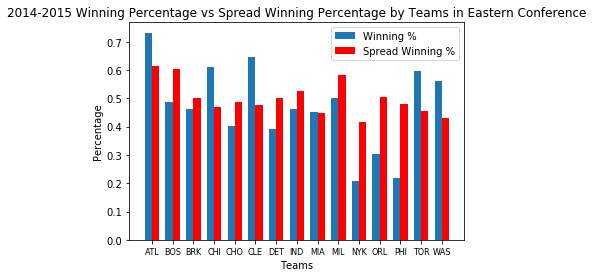

In [86]:
#the following code blocks create team by team bar graphs of spread win% by season for each conference

N = 15
ind = np.arange(N) 
width = 0.35 

plt.bar(ind, wp4east, width, label='Winning %')
plt.bar(ind + width, sp4east, width,
    label='Spread Winning %',color= ['red'])

plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('2014-2015 Winning Percentage vs Spread Winning Percentage by Teams in Eastern Conference')
plt.xticks(ind + width / 2, ('ATL', 'BOS', 'BRK', 'CHI', 'CHO','CLE','DET','IND','MIA','MIL','NYK','ORL',\
'PHI', 'TOR', 'WAS'), size=8)
plt.legend(loc='best')

plt.show()

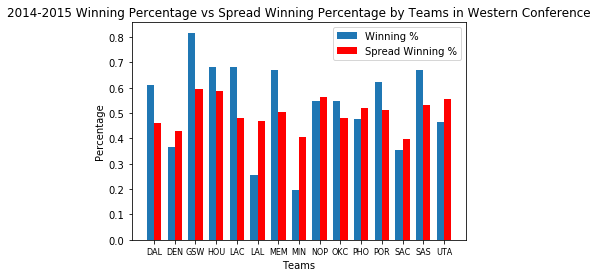

In [87]:
plt.bar(ind, wp4west, width, label='Winning %')
plt.bar(ind + width, sp4west, width,
    label='Spread Winning %',color= 'red')

plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('2014-2015 Winning Percentage vs Spread Winning Percentage by Teams in Western Conference')
plt.xticks(ind + width / 2, ('DAL', 'DEN', 'GSW', 'HOU', 'LAC','LAL','MEM','MIN','NOP','OKC',\
'PHO', 'POR','SAC', 'SAS','UTA'), size=8)
plt.legend(loc='best')

plt.show()

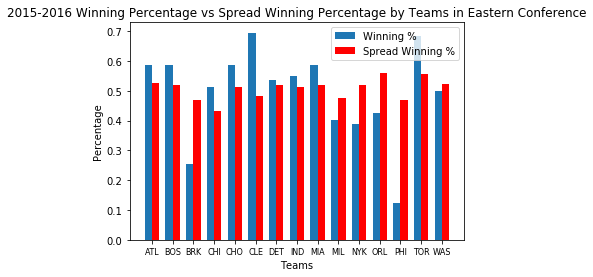

In [88]:
plt.bar(ind, wp5east, width, label='Winning %')
plt.bar(ind + width, sp5east, width,
    label='Spread Winning %',color= 'red')

plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('2015-2016 Winning Percentage vs Spread Winning Percentage by Teams in Eastern Conference')
plt.xticks(ind + width / 2, ('ATL', 'BOS', 'BRK', 'CHI', 'CHO','CLE','DET','IND','MIA','MIL','NYK','ORL',\
'PHI', 'TOR', 'WAS'), size=8)
plt.legend(loc='best')

plt.show()

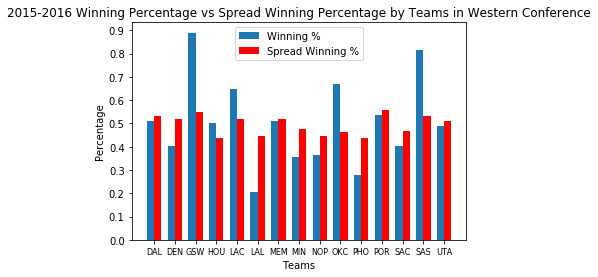

In [89]:
plt.bar(ind, wp5west, width, label='Winning %')
plt.bar(ind + width, sp5west, width,
    label='Spread Winning %',color= 'red')

plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('2015-2016 Winning Percentage vs Spread Winning Percentage by Teams in Western Conference')
plt.xticks(ind + width / 2, ('DAL', 'DEN', 'GSW', 'HOU', 'LAC','LAL','MEM','MIN','NOP','OKC',\
'PHO', 'POR','SAC', 'SAS','UTA'), size=8)
plt.yticks(np.arange(0, 1, .1))
plt.legend(loc='best')

plt.show()

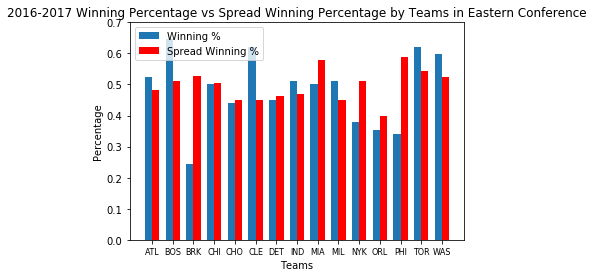

In [90]:
plt.bar(ind, wp6east, width, label='Winning %')
plt.bar(ind + width, sp6east, width,
    label='Spread Winning %',color= 'red')

plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('2016-2017 Winning Percentage vs Spread Winning Percentage by Teams in Eastern Conference')
plt.xticks(ind + width / 2, ('ATL', 'BOS', 'BRK', 'CHI', 'CHO','CLE','DET','IND','MIA','MIL','NYK','ORL',\
'PHI', 'TOR', 'WAS'), size=8)
plt.yticks(np.arange(0,.8,.1))
plt.legend(loc='best')

plt.show()

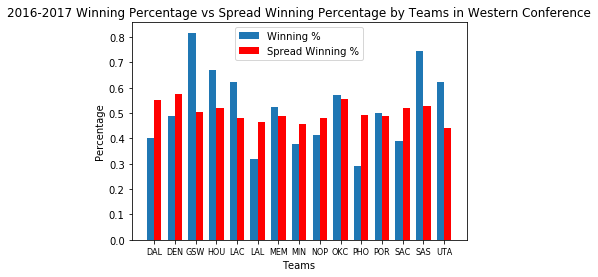

In [91]:
plt.bar(ind, wp6west, width, label='Winning %')
plt.bar(ind + width, sp6west, width,
    label='Spread Winning %',color= 'red')

plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('2016-2017 Winning Percentage vs Spread Winning Percentage by Teams in Western Conference')
plt.xticks(ind + width / 2, ('DAL', 'DEN', 'GSW', 'HOU', 'LAC','LAL','MEM','MIN','NOP','OKC',\
'PHO', 'POR','SAC', 'SAS','UTA'), size=8)
plt.yticks(np.arange(0, .9, .1))
plt.legend(loc='best')

plt.show()

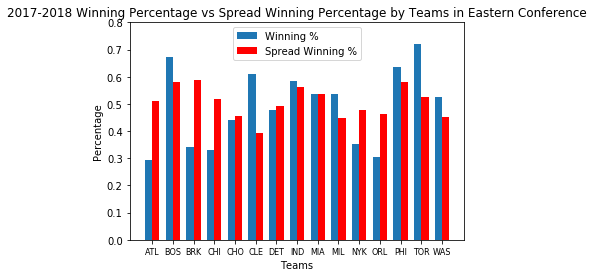

In [92]:
plt.bar(ind, wp7east, width, label='Winning %')
plt.bar(ind + width, sp7east, width,
    label='Spread Winning %',color= 'red')

plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('2017-2018 Winning Percentage vs Spread Winning Percentage by Teams in Eastern Conference')
plt.xticks(ind + width / 2, ('ATL', 'BOS', 'BRK', 'CHI', 'CHO','CLE','DET','IND','MIA','MIL','NYK','ORL',\
'PHI', 'TOR', 'WAS'), size=8)
plt.yticks(np.arange(0,.9,.1))
plt.legend(loc='best')

plt.show()

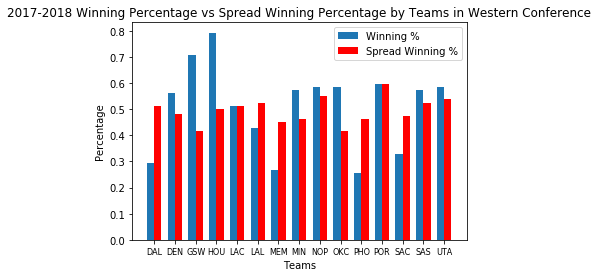

In [93]:
plt.bar(ind, wp7west, width, label='Winning %')
plt.bar(ind + width, sp7west, width,
    label='Spread Winning %',color= 'red')

plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('2017-2018 Winning Percentage vs Spread Winning Percentage by Teams in Western Conference')
plt.xticks(ind + width / 2, ('DAL', 'DEN', 'GSW', 'HOU', 'LAC','LAL','MEM','MIN','NOP','OKC',\
'PHO', 'POR','SAC', 'SAS','UTA'), size=8)
plt.yticks(np.arange(0, .9, .1))
plt.legend(loc='best')

plt.show()

These eight graphs were separated by season in order to view how a team's winning percentage and their winning percentage against the spread (ATS) are related to each other each year, and if there are any patterns to these relationships. The graphs were separated by conference in order to improve readability in the graphs and not over clutter them. Splitting up the teams by conference is a natural decision since it is a sensible way to group the teams together and most games throughout an NBA season are played by teams within the same conference. 

It is clear that yearly winning percentages have more variability than their percentages ATS because oddsmakers are trying to curb the spreads to make them as even as possible, which is why spread percentages hover closer to 50%. But, what is the relationship between a team's winning percentage and their ATS percentage? Based on the graphs, it appears most team's percentages are close to one another, and an extreme winning percentage can yield an extreme ATS percentage. For example in the '14-'15 season, ATL and GSW had the highest winning percentages and highest ATS percentages in their conference. However each season has a few outliers. In the '14-'15 season, PHI had the second worst record in the Eastern Conference, but there ATS % was still close to 50% and in the middle of the pack that year. In the '17-'18 season, GSW, HOU, and TOR had the best records in the league, but had huge disparities in their ATS percentages, which were average. This shows that just because a team is one of the best or worst in the league doesn't mean they will necessarily be the most or least profitable ATS throughout the season. There are many possible reasons why this could be, and it would be best to pay close attention to a team throughout a season to fully understand why. Common reasons could include high winning teams winning in close contests, and not blowing out their opponents like could be expected by the best teams, thus not covering the spread. This applies in the opposite for more frequent losing teams where they are losing often in close games and covering the point spread. There is an old sports betting adage that goes "Good teams win, great teams cover." In this context, there are many ways to evaluate how good a team truly is, all depending on the metrics being observed.

In [94]:
#winning percentages lists of teams by season
winperc_list4 = df[df.Season == '14-15'].groupby('Team')['Win_%_F'].mean().tolist()
winperc_list5 = df[df.Season == '15-16'].groupby('Team')['Win_%_F'].mean().tolist()
winperc_list6 = df[df.Season == '16-17'].groupby('Team')['Win_%_F'].mean().tolist()
winperc_list7 = df[df.Season == '17-18'].groupby('Team')['Win_%_F'].mean().tolist()

#ATS winning percentages lists of teams by season
spreadperc_list4 = df[df.Season == '14-15'].groupby('Team')['SR_Win_%_F'].mean().tolist()
spreadperc_list5 = df[df.Season == '15-16'].groupby('Team')['SR_Win_%_F'].mean().tolist()
spreadperc_list6 = df[df.Season == '16-17'].groupby('Team')['SR_Win_%_F'].mean().tolist()
spreadperc_list7 = df[df.Season == '17-18'].groupby('Team')['SR_Win_%_F'].mean().tolist()

#creating team by team lists of ATS percentages by season 
atlsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[0]
bossp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[1]
brksp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[2]
chisp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[3]
chosp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[4]
clesp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[5]
dalsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[6]
densp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[7]
detsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[8]
gswsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[9]
housp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[10]
indsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[11]
lacsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[12]
lalsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[13]
memsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[14]
miasp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[15]
milsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[16]
minsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[17]
nopsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[18]
nyksp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[19]
okcsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[20]
orlsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[21]
phisp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[22]
phosp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[23]
porsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[24]
sacsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[25]
sassp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[26]
torsp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[27]
utasp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[28]
wassp = list(zip(spreadperc_list4,spreadperc_list5,spreadperc_list6,spreadperc_list7))[29]

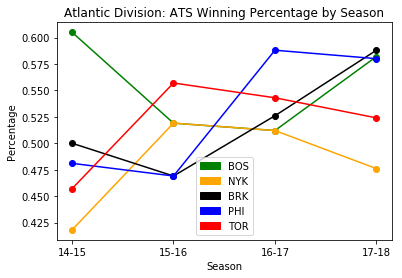

In [95]:
#plotting ATS winning percentages for each season by division

plt.plot(season_list,bossp,color='green',marker='o')
plt.plot(season_list,nyksp,color='orange',marker='o')
plt.plot(season_list,brksp,color='black',marker='o')
plt.plot(season_list,phisp,color='blue',marker='o')
plt.plot(season_list,torsp,color='red',marker='o')
plt.title('Atlantic Division: ATS Winning Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Percentage')

celtics = mpatches.Patch(color='green', label='BOS')
knicks = mpatches.Patch(color='orange',label='NYK')
nets = mpatches.Patch(color='black',label='BRK')
sixers = mpatches.Patch(color='blue',label='PHI')
raptors = mpatches.Patch(color='red',label='TOR')

plt.legend(handles=[celtics,knicks,nets,sixers,raptors])

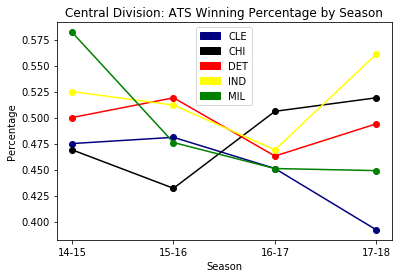

In [96]:
#plotting ATS winning percentages for each season by division

plt.plot(season_list,clesp,color='navy',marker='o')
plt.plot(season_list,chisp,color='black',marker='o')
plt.plot(season_list,detsp,color='red',marker='o')
plt.plot(season_list,indsp,color='yellow',marker='o')
plt.plot(season_list,milsp,color='green',marker='o')
plt.title('Central Division: ATS Winning Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Percentage')

cavs = mpatches.Patch(color='navy', label='CLE')
bulls = mpatches.Patch(color='black',label='CHI')
pistons = mpatches.Patch(color='red',label='DET')
pacers = mpatches.Patch(color='yellow',label='IND')
bucks = mpatches.Patch(color='green',label='MIL')

plt.legend(handles=[cavs,bulls,pistons,pacers,bucks])

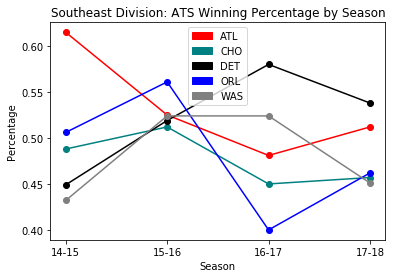

In [97]:
#plotting ATS winning percentages for each season by division

plt.plot(season_list,atlsp,color='red',marker='o')
plt.plot(season_list,chosp,color='teal',marker='o')
plt.plot(season_list,miasp,color='black',marker='o')
plt.plot(season_list,orlsp,color='blue',marker='o')
plt.plot(season_list,wassp,color='gray',marker='o')
plt.title('Southeast Division: ATS Winning Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Percentage')

hawks = mpatches.Patch(color='red', label='ATL')
hornets = mpatches.Patch(color='teal',label='CHO')
heat = mpatches.Patch(color='black',label='DET')
magic = mpatches.Patch(color='blue',label='ORL')
wizards = mpatches.Patch(color='gray',label='WAS')

plt.legend(handles=[hawks,hornets,heat,magic,wizards])

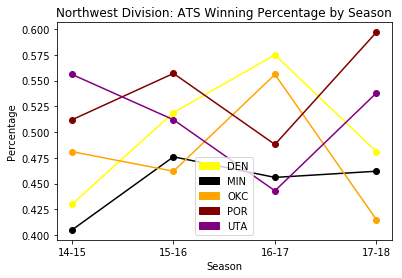

In [98]:
#plotting ATS winning percentages for each season by division

plt.plot(season_list,densp,color='yellow',marker='o')
plt.plot(season_list,minsp,color='black',marker='o')
plt.plot(season_list,okcsp,color='orange',marker='o')
plt.plot(season_list,porsp,color='maroon',marker='o')
plt.plot(season_list,utasp,color='purple',marker='o')
plt.title('Northwest Division: ATS Winning Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Percentage')

nuggets = mpatches.Patch(color='yellow', label='DEN')
twolves = mpatches.Patch(color='black',label='MIN')
thunder = mpatches.Patch(color='orange',label='OKC')
trailblazers = mpatches.Patch(color='maroon',label='POR')
jazz = mpatches.Patch(color='purple',label='UTA')

plt.legend(handles=[nuggets,twolves,thunder,trailblazers,jazz])

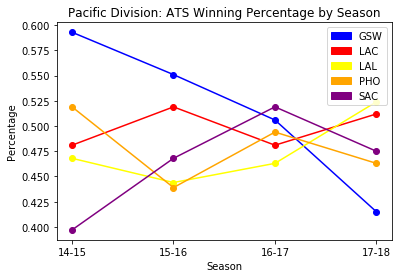

In [99]:
#plotting ATS winning percentages for each season by division

plt.plot(season_list,gswsp,color='blue',marker='o')
plt.plot(season_list,lacsp,color='red',marker='o')
plt.plot(season_list,lalsp,color='yellow',marker='o')
plt.plot(season_list,phosp,color='orange',marker='o')
plt.plot(season_list,sacsp,color='purple',marker='o')
plt.title('Pacific Division: ATS Winning Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Percentage')

warriors = mpatches.Patch(color='blue', label='GSW')
clippers = mpatches.Patch(color='red',label='LAC')
lakers = mpatches.Patch(color='yellow',label='LAL')
suns = mpatches.Patch(color='orange',label='PHO')
kings = mpatches.Patch(color='purple',label='SAC')

plt.legend(handles=[warriors,clippers,lakers,suns,kings], loc = 'upper right')

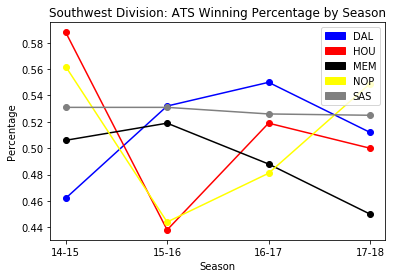

In [100]:
#plotting ATS winning percentages for each season by division

plt.plot(season_list,dalsp,color='blue',marker='o')
plt.plot(season_list,housp,color='red',marker='o')
plt.plot(season_list,memsp,color='black',marker='o')
plt.plot(season_list,nopsp,color='yellow',marker='o')
plt.plot(season_list,sassp,color='gray',marker='o')
plt.title('Southwest Division: ATS Winning Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Percentage')

mavs = mpatches.Patch(color='blue', label='DAL')
rockets = mpatches.Patch(color='red',label='HOU')
grizzlies = mpatches.Patch(color='black',label='MEM')
pelicans = mpatches.Patch(color='yellow',label='NOP')
spurs = mpatches.Patch(color='gray',label='SAS')

plt.legend(handles=[mavs,rockets,grizzlies,pelicans,spurs], loc = 'upper right')

These six graphs represent a team's winning percentage against the spread (ATS) by season, broken down by division in order to maintain readabaility. The purpose of these is to detect any possible patterns between team's ATS winning percentage by year, and see if there is any relationship. From these graphs, it does not look like a previous season's ATS percentage is indicative of the next season's. There are very few instances a team had the highest ATS percentage in their division for consecutive seasons. Interestingly there are two teams that had ATS percentages of over .500 all four seasons. Those teams are the Spurs and Celtics, two of the most consistently winning teams over the last few years. There are also just two teams that have had an ATS percentage of under .500 for each season. Those teams are the Cavaliers and the Timberwolves. However, there are instances where the lines on the graphs are relatively even, meaning a consistent performance in seaosn to season ATS performance. Previously mentioned as one of the only teams to finish about .500 every year, the Spurs ATS has barely deviated, hovering around .53 each season. The Lakers had a three year stretch with a consistent mark from .44 to .47, where they were one of the most frequent losers in basketball. The Timberwolves had a similar losing stretch to the Lakers, and the Raptors had a 3 year consistent strecth as well where they were among the top teams in the Eastern Conference each year, and had ATS percentages ranging from .524 to .557.

Even if there are some longer term trends within the data here, it is hard to say that ATS performance in one season has a large effect on the next, albeit some exceptions depending on the team. 

These next four plots represent a team's season points margin vs their Winning Percentage against the spread. The season points margin is an aggregation of how many points a team wins or loses by each (represented by the Margin column in df).This is often looked as a good measure of the best teams, because not only does it measure wins and losses but how many points a team is winning or losing by throughout the year.

Text(0,0.5,'Winning Percentage Against the Spread')

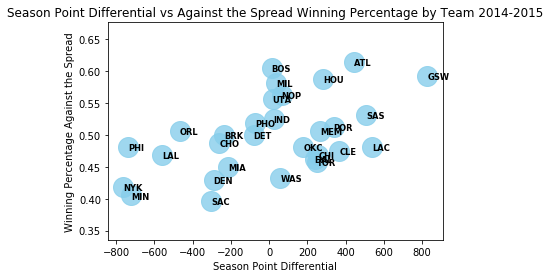

In [101]:
#list of each team's season point differential
margins4 = df[df.Season == '14-15'].groupby('Team')['Margin_F'].mean().tolist()
margins5 = df[df.Season == '15-16'].groupby('Team')['Margin_F'].mean().tolist()
margins6 = df[df.Season == '16-17'].groupby('Team')['Margin_F'].mean().tolist()
margins7 = df[df.Season == '17-18'].groupby('Team')['Margin_F'].mean().tolist()

##create dataframe and plot point differential by ATS win %
dfg = pd.DataFrame({
'x': margins4,
'y': spreadperc_list4,
'group': ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM',\
'MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']})
 
p1=sns.regplot(data=dfg, x="x", y="y", fit_reg=False, color="skyblue",marker='o', scatter_kws={'s':400})
 
#add annotations one by one with a loop
for line in range(0,dfg.shape[0]):
     p1.text(dfg.x[line] - .02, dfg.y[line]-.005, dfg.group[line], size='small', color='black', weight='semibold')
 
p1.set_title('Season Point Differential vs Against the Spread Winning Percentage by Team 2014-2015')
p1.set_xlabel('Season Point Differential')
p1.set_ylabel('Winning Percentage Against the Spread')

Text(0,0.5,'Winning Percentage Against the Spread')

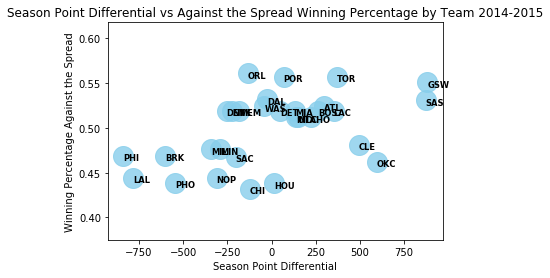

In [102]:
#create dataframe and plot point differential by ATS win %
dfg = pd.DataFrame({
'x': margins5,
'y': spreadperc_list5,
'group': ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM',\
'MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']})
 
p1=sns.regplot(data=dfg, x="x", y="y", fit_reg=False, color="skyblue",marker='o', scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,dfg.shape[0]):
     p1.text(dfg.x[line] - .02, dfg.y[line]-.005, dfg.group[line], size='small', color='black', weight='semibold')
 
p1.set_title('Season Point Differential vs Against the Spread Winning Percentage by Team 2014-2015')
p1.set_xlabel('Season Point Differential')
p1.set_ylabel('Winning Percentage Against the Spread')

Text(0,0.5,'Winning Percentage Against the Spread')

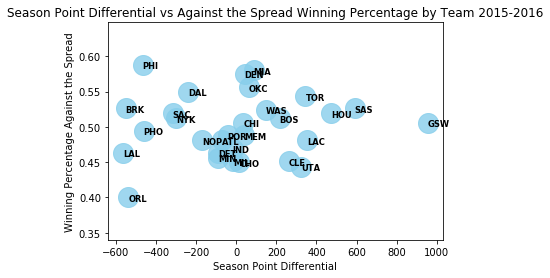

In [103]:
#create dataframe and plot point differential by ATS win %
dfg = pd.DataFrame({
'x': margins6,
'y': spreadperc_list6,
'group': ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM',\
'MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']})
 
p1=sns.regplot(data=dfg, x="x", y="y", fit_reg=False, color="skyblue",marker='o', scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,dfg.shape[0]):
     p1.text(dfg.x[line] - .02, dfg.y[line]-.005, dfg.group[line], size='small', color='black', weight='semibold')
 
p1.set_title('Season Point Differential vs Against the Spread Winning Percentage by Team 2015-2016')
p1.set_xlabel('Season Point Differential')
p1.set_ylabel('Winning Percentage Against the Spread')

Text(0,0.5,'Winning Percentage Against the Spread')

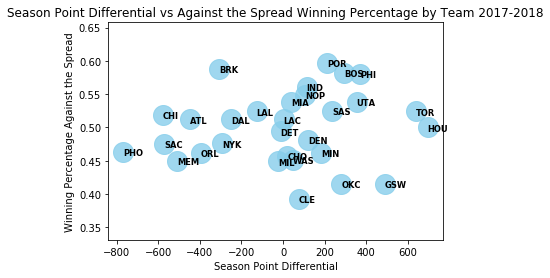

In [104]:
#create dataframe and plot point differential by ATS win %
dfg = pd.DataFrame({
'x': margins7,
'y': spreadperc_list7,
'group': ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM',\
'MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']})
 
p1=sns.regplot(data=dfg, x="x", y="y", fit_reg=False, color="skyblue",marker='o', scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,dfg.shape[0]):
     p1.text(dfg.x[line] - .02, dfg.y[line]-.005, dfg.group[line], size='small', color='black', weight='semibold')
 
p1.set_title('Season Point Differential vs Against the Spread Winning Percentage by Team 2017-2018')
p1.set_xlabel('Season Point Differential')
p1.set_ylabel('Winning Percentage Against the Spread')

These plots representing a team's seaosn points differtial against their against the spread (ATS) winning percentage generally follow a pattern of appearing to be positively linearly coorelated. This makes sense because a team that wins by a lot of points is likely to win more games by covering the spread and vice versa for teams that lose by a lot of points. There are exceptions to this trend though, with many coming in the 2016-2017 season, which looks noticeably different from the other plots. In this plot, five of the eight teams with the season's lowest differentials actually had an ATS winning percentage of greater than .500. Generally, if a team has a strong point differential they are more likely to cover the spread throughout the course of a season, which is intuitive. As a bettor it could be very profitable to bet on teams having large disparities in their points differential, under the correct conditions.

The percentage of games won against the spread at home was %49.43
The percentage of games won against the spread on the road was %50.57


/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jeffreyebert/anaconda3/lib/python

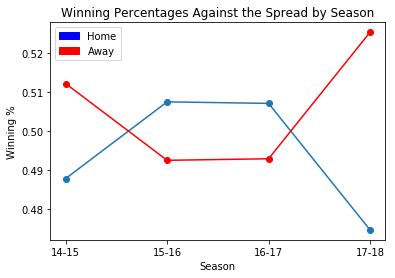

In [105]:
#df of all values where games did not push against the spread (either a winner or loser)
df_np = df[df.SpreadResult != 'P']

#spread win % at home
df_sh = df_np[df_np.home == 1]
df_shw = df_sh[df_sh.sr_win == 1]
df_shp = len(df_shw) / len(df_sh)
print('The percentage of games won against the spread at home was %' + '{:.2f}'.format(df_shp * 100))

#spread win % on road
df_sa = df_np[df_np.away == 1]
df_saw = df_sa[df_sa.sr_win == 1]
df_sap = len(df_saw) / len(df_sa)
print('The percentage of games won against the spread on the road was %' + '{:.2f}'.format(df_sap * 100))

#how does this vary from year to year?
#spread win % at home 2014-2015
df_sh4 = df_np[(df_np.home == 1) & (df.Season == '14-15')]
df_shw4 = df_sh4[df_sh4.sr_win == 1]
df_shp4 = len(df_shw4) / len(df_sh4)
#spread win % at home 2015-2016
df_sh5 = df_np[(df_np.home == 1) & (df.Season == '15-16')]
df_shw5 = df_sh5[df_sh5.sr_win == 1]
df_shp5 = len(df_shw5) / len(df_sh5)
#spread win % at home 2016-2017
df_sh6 = df_np[(df_np.home == 1) & (df.Season == '16-17')]
df_shw6 = df_sh6[df_sh6.sr_win == 1]
df_shp6 = len(df_shw6) / len(df_sh6)
#spread win % at home 2017-2018
df_sh7 = df_np[(df_np.home == 1) & (df.Season == '17-18')]
df_shw7 = df_sh7[df_sh7.sr_win == 1]
df_shp7 = len(df_shw7) / len(df_sh7)
#spread win % on road 2014-2015
df_sa4 = df_np[(df_np.away == 1) & (df.Season == '14-15')]
df_saw4 = df_sa4[df_sa4.sr_win == 1]
df_sap4 = len(df_saw4) / len(df_sa4)
#spread win % on road 2015-2016
df_sa5 = df_np[(df_np.away == 1) & (df.Season == '15-16')]
df_saw5 = df_sa5[df_sa5.sr_win == 1]
df_sap5 = len(df_saw5) / len(df_sa5)
#spread win % on road 2016-2017
df_sa6 = df_np[(df_np.away == 1) & (df.Season == '16-17')]
df_saw6 = df_sa6[df_sa6.sr_win == 1]
df_sap6 = len(df_saw6) / len(df_sa6)
#spread win % on road 2017-2018
df_sa7 = df_np[(df_np.away == 1) & (df.Season == '17-18')]
df_saw7 = df_sa7[df_sa7.sr_win == 1]
df_sap7 = len(df_saw7) / len(df_sa7)

shwp,sawp = [],[]
shwp.append(df_shp4),shwp.append(df_shp5),shwp.append(df_shp6),shwp.append(df_shp7)
sawp.append(df_sap4),sawp.append(df_sap5),sawp.append(df_sap6),sawp.append(df_sap7)

plt.plot(season_list,shwp, marker = 'o')
plt.title('Winning Percentages Against the Spread by Season')
plt.ylabel('Winning %')
plt.xlabel('Season')
plt.plot(season_list,sawp, marker = 'o',color = 'red')
home = mpatches.Patch(color='blue', label='Home')
away = mpatches.Patch(color='red', label='Away')
plt.legend(handles=[home,away])


Based on this graph and the data found, there is no advantage when playing either at home or on the road for a team covering the spread. This makes sense because spread values factor in the difference in points associated with playing home or away games. All of these values are very close to 50%, with the most deviation in the last season with road teams covering the spread almost 53% of the time. It is difficult to say what this can be attributed to without looking at the data on a game by game basis. Although home/away splits as a whole for the NBA does not provide significant value in telling us when teams will cover, that does not mean certain teams do not show important trends in covering the spread based on whether they are in their home stadium or on the road. 

The percentage of games won against the spread at home as an underdog was %47.62
The percentage of games won against the spread at home as a favorite was %49.87
The percentage of games won against the spread on road as an underdog was %50.13
The percentage of games won against the spread on road as a favorite was %52.38


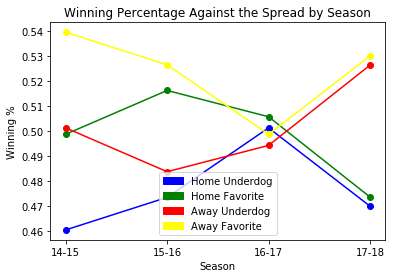

In [106]:
#spread win % at home as an underdog
df_shu = df_np[(df_np.home == 1) & (df_np.Type == 'Dog')]
df_shuw = df_shu[df_shu.sr_win == 1]
df_shup = len(df_shuw) / len(df_shu)
print('The percentage of games won against the spread at home as an underdog was %' + '{:.2f}'.format(df_shup * 100))

#spread win % at home as an favorite
df_shf = df_np[(df_np.home == 1) & (df_np.Type == 'Fav')]
df_shfw = df_shf[df_shf.sr_win == 1]
df_shfp = len(df_shfw) / len(df_shf)
print('The percentage of games won against the spread at home as a favorite was %' + '{:.2f}'.format(df_shfp * 100))

#spread win % on road as an underdog
df_sau = df_np[(df_np.away == 1) & (df_np.Type == 'Dog')]
df_sauw = df_sau[df_sau.sr_win == 1]
df_saup = len(df_sauw) / len(df_sau)
print('The percentage of games won against the spread on road as an underdog was %' + '{:.2f}'.format(df_saup * 100))

#spread win % on road as an favorite
df_saf = df_np[(df_np.away == 1) & (df_np.Type == 'Fav')]
df_safw = df_saf[df_saf.sr_win == 1]
df_safp = len(df_safw) / len(df_saf)
print('The percentage of games won against the spread on road as a favorite was %' + '{:.2f}'.format(df_safp * 100))

#how does this vary from year to year?

#spread win % at home as an underdog in 2014-2015
df_shu4 = df_np[(df_np.home == 1) & (df_np.Type == 'Dog') & (df_np.Season == '14-15')]
df_shuw4 = df_shu4[df_shu4.sr_win == 1]
df_shup4 = len(df_shuw4) / len(df_shu4)

#spread win % at home as an underdog in 2015-2016
df_shu5 = df_np[(df_np.home == 1) & (df_np.Type == 'Dog') & (df_np.Season == '15-16')]
df_shuw5 = df_shu5[df_shu5.sr_win == 1]
df_shup5 = len(df_shuw5) / len(df_shu5)

#spread win % at home as an underdog in 2016-2017
df_shu6 = df_np[(df_np.home == 1) & (df_np.Type == 'Dog') & (df_np.Season == '16-17')]
df_shuw6 = df_shu6[df_shu6.sr_win == 1]
df_shup6 = len(df_shuw6) / len(df_shu6)

#spread win % at home as an underdog in 2017-2018
df_shu7 = df_np[(df_np.home == 1) & (df_np.Type == 'Dog') & (df_np.Season == '17-18')]
df_shuw7 = df_shu7[df_shu7.sr_win == 1]
df_shup7 = len(df_shuw7) / len(df_shu7)

#spread win % at home as a favorite in 2014-2015
df_shf4 = df_np[(df_np.home == 1) & (df_np.Type == 'Fav') & (df_np.Season == '14-15')]
df_shfw4 = df_shf4[df_shf4.sr_win == 1]
df_shfp4 = len(df_shfw4) / len(df_shf4)

#spread win % at home as a favorite in 2015-2016
df_shf5 = df_np[(df_np.home == 1) & (df_np.Type == 'Fav') & (df_np.Season == '15-16')]
df_shfw5 = df_shf5[df_shf5.sr_win == 1]
df_shfp5 = len(df_shfw5) / len(df_shf5)

#spread win % at home as a favorite in 2016-2017
df_shf6 = df_np[(df_np.home == 1) & (df_np.Type == 'Fav') & (df_np.Season == '16-17')]
df_shfw6 = df_shf6[df_shf6.sr_win == 1]
df_shfp6 = len(df_shfw6) / len(df_shf6)

#spread win % at home as a favorite in 2017-2018
df_shf7 = df_np[(df_np.home == 1) & (df_np.Type == 'Fav') & (df_np.Season == '17-18')]
df_shfw7 = df_shf7[df_shf7.sr_win == 1]
df_shfp7 = len(df_shfw7) / len(df_shf7)

#spread win % on road as an underdog in 2014-2015
df_sau4 = df_np[(df_np.home == 0) & (df_np.Type == 'Dog') & (df_np.Season == '14-15')]
df_sauw4 = df_sau4[df_sau4.sr_win == 1]
df_saup4 = len(df_sauw4) / len(df_sau4)

#spread win % on road as an underdog in 2015-2016
df_sau5 = df_np[(df_np.home == 0) & (df_np.Type == 'Dog') & (df_np.Season == '15-16')]
df_sauw5 = df_sau5[df_sau5.sr_win == 1]
df_saup5 = len(df_sauw5) / len(df_sau5)

#spread win % on road as an underdog in 2016-2017
df_sau6 = df_np[(df_np.home == 0) & (df_np.Type == 'Dog') & (df_np.Season == '16-17')]
df_sauw6 = df_sau6[df_sau6.sr_win == 1]
df_saup6 = len(df_sauw6) / len(df_sau6)

#spread win % on road as an underdog in 2017-2018
df_sau7 = df_np[(df_np.home == 0) & (df_np.Type == 'Dog') & (df_np.Season == '17-18')]
df_sauw7 = df_sau7[df_sau7.sr_win == 1]
df_saup7 = len(df_sauw7) / len(df_sau7)

#spread win % on road as a favorite in 2014-2015
df_saf4 = df_np[(df_np.home == 0) & (df_np.Type == 'Fav') & (df_np.Season == '14-15')]
df_safw4 = df_saf4[df_saf4.sr_win == 1]
df_safp4 = len(df_safw4) / len(df_saf4)

#spread win % on road as a favorite in 2015-2016
df_saf5 = df_np[(df_np.home == 0) & (df_np.Type == 'Fav') & (df_np.Season == '15-16')]
df_safw5 = df_saf5[df_saf5.sr_win == 1]
df_safp5 = len(df_safw5) / len(df_saf5)

#spread win % on road as a favorite in 2016-2017
df_saf6 = df_np[(df_np.home == 0) & (df_np.Type == 'Fav') & (df_np.Season == '16-17')]
df_safw6 = df_saf6[df_saf6.sr_win == 1]
df_safp6 = len(df_safw6) / len(df_saf6)

#spread win % on road as a favorite in 2017-2018
df_saf7 = df_np[(df_np.home == 0) & (df_np.Type == 'Fav') & (df_np.Season == '17-18')]
df_safw7 = df_saf7[df_saf7.sr_win == 1]
df_safp7 = len(df_safw7) / len(df_saf7)

shup,shfp,saup,safp = [],[],[],[]
shup.append(df_shup4),shup.append(df_shup5),shup.append(df_shup6),shup.append(df_shup7)
shfp.append(df_shfp4),shfp.append(df_shfp5),shfp.append(df_shfp6),shfp.append(df_shfp7)
saup.append(df_saup4),saup.append(df_saup5),saup.append(df_saup6),saup.append(df_saup7)
safp.append(df_safp4),safp.append(df_safp5),safp.append(df_safp6),safp.append(df_safp7)

plt.plot(season_list,shup, color = 'blue', marker = 'o')
plt.plot(season_list,shfp, color = 'green', marker = 'o')
plt.plot(season_list,saup, color = 'red', marker = 'o')
plt.plot(season_list,safp, color = 'yellow', marker = 'o')
plt.title('Winning Percentage Against the Spread by Season')
plt.xlabel('Season')
plt.ylabel('Winning %')
homeu = mpatches.Patch(color='blue', label='Home Underdog')
homef = mpatches.Patch(color='green', label='Home Favorite')
awayu = mpatches.Patch(color='red', label='Away Underdog')
awayf = mpatches.Patch(color='yellow', label='Away Favorite')
plt.legend(handles=[homeu,homef,awayu,awayf])

Because the spread is intended to level the playing field, it is expected that these season averages hover around 50%. For the most part this is true, but there is some fluctuation in these values. The greatest outlier is in the 2014-2015 season, where road favorites covered the spread at a 54% rate and thus home underdogs covered at just a 46% rate. While these differences in values are interesting and can likely be explained by in-season data, these values could not help a potential gambler in predicting the result against the spread because there is no clear pattern.

In [107]:
#df of all values where games did not push against the spread (either a winner or loser)
df_np = df[df.SpreadResult != 'P']

#spread win % on road for BOS
df_saatl = df_np[(df_np.away == 1) & (df.Team == 'BOS')]
df_saatlw = df_saatl[df_saatl.sr_win == 1]
df_saatlp = len(df_saatlw) / len(df_saatl)
print('The percentage of games won against the spread on the road for BOS was '\
+ '{:.2f}'.format(df_saatlp * 100) + '%')

#spread win % on road for BOS 2014-2015
df_sabos4 = df_np[(df_np.away == 1) & (df.Season == '14-15') & (df.Team == 'BOS')]
df_sabosw4 = df_sabos4[df_sabos4.sr_win == 1]
df_sabosp4 = len(df_sabosw4) / len(df_sabos4)
#spread win % on road for BOS 2015-2016
df_sabos5 = df_np[(df_np.away == 1) & (df.Season == '15-16') & (df.Team == 'BOS')]
df_sabosw5 = df_sabos5[df_sabos5.sr_win == 1]
df_sabosp5 = len(df_sabosw5) / len(df_sabos5)
#spread win % on road for BOS 2016-2017
df_sabos6 = df_np[(df_np.away == 1) & (df.Season == '16-17') & (df.Team == 'BOS')]
df_sabosw6 = df_sabos6[df_sabos6.sr_win == 1]
df_sabosp6 = len(df_sabosw6) / len(df_sabos6)
#spread win % on road for BOS 2017-2018
df_sabos7 = df_np[(df_np.away == 1) & (df.Season == '17-18') & (df.Team == 'BOS')]
df_sabosw7 = df_sabos7[df_sabos7.sr_win == 1]
df_sabosp7 = len(df_sabosw7) / len(df_sabos7)

print("Boston's season by season ATS winning percentages on the road were: " + "{:.3f}".format(df_sabosp4 * 100)\
+ '%, ' + "{:.3f}".format(df_sabosp5 * 100) + '%, ' + "{:.3f}".format(df_sabosp6 * 100) + '%, '\
+ "{:.3f}".format(df_sabosp7 * 100) + '%')

#spread win % at home for POR 2014-2015
df_shpor4 = df_np[(df_np.home == 1) & (df.Season == '14-15') & (df.Team == 'POR')]
df_shporw4 = df_shpor4[df_shpor4.sr_win == 1]
df_shporp4 = len(df_shporw4) / len(df_shpor4)
#spread win % at home for POR 2015-2016
df_shpor5 = df_np[(df_np.home == 1) & (df.Season == '15-16') & (df.Team == 'POR')]
df_shporw5 = df_shpor5[df_shpor5.sr_win == 1]
df_shporp5 = len(df_shporw5) / len(df_shpor5)
#spread win % at home for POR 2016-2017
df_shpor6 = df_np[(df_np.home == 1) & (df.Season == '16-17') & (df.Team == 'POR')]
df_shporw6 = df_shpor6[df_shpor6.sr_win == 1]
df_shporp6 = len(df_shporw6) / len(df_shpor6)
#spread win % at home for POR 2017-2018
df_shpor7 = df_np[(df_np.home == 1) & (df.Season == '17-18') & (df.Team == 'POR')]
df_shporw7 = df_shpor7[df_shpor7.sr_win == 1]
df_shporp7 = len(df_shporw7) / len(df_shpor7)

print("Portland's season by season ATS winning percentages at home were: " + "{:.3f}".format(df_shporp4 * 100)\
+ '%, ' + "{:.3f}".format(df_shporp5 * 100) + '%, ' + "{:.3f}".format(df_shporp6 * 100) + '%, '\
+ "{:.3f}".format(df_shporp7 * 100) + '%')

#spread win % at home for MIN 2014-2015
df_samin4 = df_np[(df_np.home == 1) & (df.Season == '14-15') & (df.Team == 'MIN')]
df_saminw4 = df_samin4[df_samin4.sr_win == 1]
df_saminp4 = len(df_saminw4) / len(df_samin4)
#spread win % at home for MIN 2015-2016
df_samin5 = df_np[(df_np.home == 1) & (df.Season == '15-16') & (df.Team == 'MIN')]
df_saminw5 = df_samin5[df_samin5.sr_win == 1]
df_saminp5 = len(df_saminw5) / len(df_samin5)
#spread win % at home for MIN 2016-2017
df_samin6 = df_np[(df_np.home == 1) & (df.Season == '16-17') & (df.Team == 'MIN')]
df_saminw6 = df_samin6[df_samin6.sr_win == 1]
df_saminp6 = len(df_saminw6) / len(df_samin6)
#spread win % at home for MIN 2017-2018
df_samin7 = df_np[(df_np.home == 1) & (df.Season == '17-18') & (df.Team == 'MIN')]
df_saminw7 = df_samin7[df_samin7.sr_win == 1]
df_saminp7 = len(df_saminw7) / len(df_samin7)

print("Minnesota's season by season ATS winning percentages at home were: " + "{:.3f}".format(df_saminp4 * 100)\
+ '%, ' + "{:.3f}".format(df_saminp5 * 100) + '%, ' + "{:.3f}".format(df_saminp6 * 100) + '%, '\
+ "{:.3f}".format(df_saminp7 * 100) + '%')

The percentage of games won against the spread on the road for BOS was 60.25%
Boston's season by season ATS winning percentages on the road were: 65.854%, 46.341%, 62.500%, 66.667%
Portland's season by season ATS winning percentages at home were: 56.098%, 56.410%, 53.659%, 60.526%
Minnesota's season by season ATS winning percentages at home were: 34.211%, 34.146%, 48.780%, 50.000%


/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning:

It may not be of significant note how one team's home/away ATS percentage varies from year to year, despite some teams do having consistent values even though this four season period is a relatively short period of time. No team had an ATS of over .500 on the road each season. Boston, who had the highest ATS road winning percentage at 60.25% overall, even included a season with just a 46% clip on the road. Cleveland, Memphis, and Oklahoma City were the only teams with each year having a road ATS percentage lower than 50%. Portland is the only team with an above .500 ATS win percentage at home each season. Minnesota had the lowest home ATS percentage of any team in 2014-2015 and followed it up with the lowest overall home ATS percentage next season, but it came back to the norm the year after. Even though most teams don't show consitent trends in these values, there are some with patters that can provide insight to how they perform yearly, but are difficult to identify.

For purposes of actually wagering on NBA games, it could be of more value to see how these ATS percentages vary from the beginning to the end of the season. A natural point to compare these percentages in the NBA season would be the All-Star break. If a team performs well ATS at home, away, or both, before the All-Star break, it would be interesting to see if a team's performance remains consistent for the end of the season. 

In [108]:
#data column 'AS' represents if a game is played before or after the NBA All-Star Break

df['AS']=df.apply(lambda row: 'Before' if row[0] < datetime.strptime('2015-02-14', '%Y-%m-%d') else 'After', axis = 1)
df['AS'] = df.apply(lambda row: 'Before' if row[0] < datetime.strptime('2016-02-14', '%Y-%m-%d') \
and row[0] > datetime.strptime('2015-09-14', '%Y-%m-%d') else row[-1], axis = 1)
df['AS'] = df.apply(lambda row: 'Before' if row[0] < datetime.strptime('2017-02-19', '%Y-%m-%d') \
and row[0] > datetime.strptime('2016-09-14', '%Y-%m-%d') else row[-1], axis = 1)
df['AS'] = df.apply(lambda row: 'Before' if row[0] < datetime.strptime('2018-02-18', '%Y-%m-%d') \
and row[0] > datetime.strptime('2017-09-14', '%Y-%m-%d') else row[-1], axis = 1)

In [109]:
#function to mark team winning percentage vs performance against the spread before the all-star break

#df_sr_ba represents df with additional column 'SR_Win_%_BA' to represent winning percentage of team against
#the spread before the all-star break that season

def sr_ba(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_tie = df_teams[(df_teams.SpreadResult == 'P')]
    df_teams = df_teams[df_teams.AS == 'Before']
    df_teams['win_count'] = df_teams['sr_win'].sum()
    df_teams['SR_Win_%_BA'] = round(df_teams['win_count'] / (len(df_teams) - len(df_tie)),3)
    return df_teams

df_sr_ba = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_sr_ba = df_sr_ba.append(sr_ba(team,season,df))
df_sr_ba = df_sr_ba.sort_values(by = ['Date','Time'])

In [110]:
#function to mark team winning percentage vs performance against the spread after the all-star break

#df_sr_aa represents df with additional column 'SR_Win_%_AA' to represent winning percentage of team against
#the spread after the all-star break that season

def sr_aa(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_tie = df_teams[(df_teams.SpreadResult == 'P')]
    df_teams = df_teams[df_teams.AS == 'After']
    df_teams['win_count'] = df_teams['sr_win'].sum()
    df_teams['SR_Win_%_AA'] = round(df_teams['win_count'] / (len(df_teams) - len(df_tie)),3)
    return df_teams

df_sr_aa = pd.DataFrame()

for season in season_list:
    for team in team_list: 
        df_sr_aa = df_sr_aa.append(sr_aa(team,season,df))
df_sr_aa = df_sr_aa.sort_values(by = ['Date','Time'])

In [111]:
#add ATS winning percentage columns of before and after the all-star break

df['SR_Win_%_BA'] = df_sr_ba['SR_Win_%_BA']
df['SR_Win_%_AA'] = df_sr_aa['SR_Win_%_AA']

Text(0,0.5,'Post-All-Star Break ATS Win %')

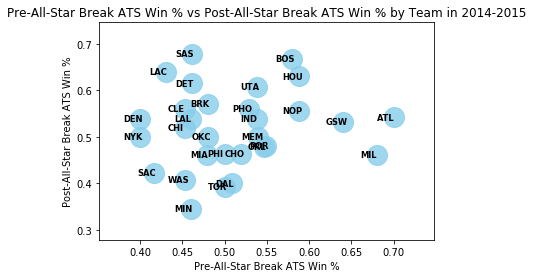

In [112]:
#list of each team's Pre-All-Star-Break ATS Winning Percentage by season
atsbefore4 = df[(df.Season == '14-15') & (df.AS == 'Before')].groupby('Team')['SR_Win_%_BA'].mean().tolist()
atsbefore5 = df[(df.Season == '15-16') & (df.AS == 'Before')].groupby('Team')['SR_Win_%_BA'].mean().tolist()
atsbefore6 = df[(df.Season == '16-17') & (df.AS == 'Before')].groupby('Team')['SR_Win_%_BA'].mean().tolist()
atsbefore7 = df[(df.Season == '17-18') & (df.AS == 'Before')].groupby('Team')['SR_Win_%_BA'].mean().tolist()

#list of each team's Post-All-Star-Break ATS Winning Percentage
atsafter4 = df[(df.Season == '14-15') & (df.AS == 'After')].groupby('Team')['SR_Win_%_AA'].mean().tolist()
atsafter5 = df[(df.Season == '15-16') & (df.AS == 'After')].groupby('Team')['SR_Win_%_AA'].mean().tolist()
atsafter6 = df[(df.Season == '16-17') & (df.AS == 'After')].groupby('Team')['SR_Win_%_AA'].mean().tolist()
atsafter7 = df[(df.Season == '17-18') & (df.AS == 'After')].groupby('Team')['SR_Win_%_AA'].mean().tolist()

#create dataframe
dfg = pd.DataFrame({
'x': atsbefore4,
'y': atsafter4,
'group': ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM',\
'MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']})
 
p1=sns.regplot(data=dfg, x="x", y="y", fit_reg=False, color="skyblue",marker='o', scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,dfg.shape[0]):
     p1.text(dfg.x[line] - .02, dfg.y[line]-.005, dfg.group[line], size='small', color='black', weight='semibold')
 
p1.set_title('Pre-All-Star Break ATS Win % vs Post-All-Star Break ATS Win % by Team in 2014-2015')
p1.set_xlabel('Pre-All-Star Break ATS Win %')
p1.set_ylabel('Post-All-Star Break ATS Win %')

Text(0,0.5,'Post-All-Star Break ATS Win %')

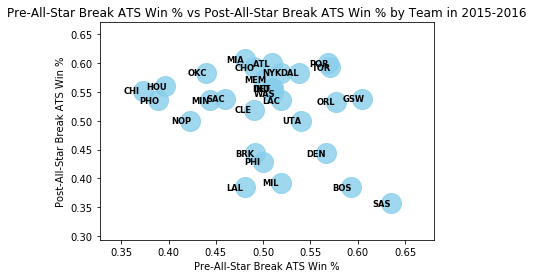

In [113]:
#create dataframe and plot
dfg = pd.DataFrame({
'x': atsbefore5,
'y': atsafter5,
'group': ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM',\
'MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']})
 
p1=sns.regplot(data=dfg, x="x", y="y", fit_reg=False, color="skyblue",marker='o', scatter_kws={'s':400})
 
for line in range(0,dfg.shape[0]):
     p1.text(dfg.x[line] - .02, dfg.y[line]-.005, dfg.group[line], size='small', color='black', weight='semibold')
 
p1.set_title('Pre-All-Star Break ATS Win % vs Post-All-Star Break ATS Win % by Team in 2015-2016')
p1.set_xlabel('Pre-All-Star Break ATS Win %')
p1.set_ylabel('Post-All-Star Break ATS Win %')

Text(0,0.5,'Post-All-Star Break ATS Win %')

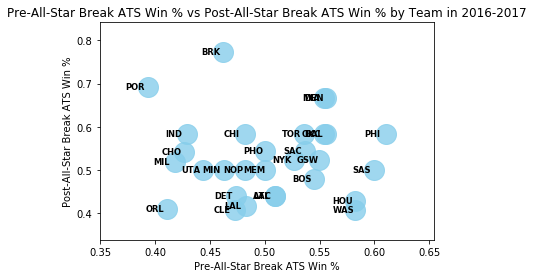

In [114]:
#create dataframe and plot
dfg = pd.DataFrame({
'x': atsbefore6,
'y': atsafter6,
'group': ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM',\
'MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']})
 
p1=sns.regplot(data=dfg, x="x", y="y", fit_reg=False, color="skyblue",marker='o', scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,dfg.shape[0]):
     p1.text(dfg.x[line] - .02, dfg.y[line]-.005, dfg.group[line], size='small', color='black', weight='semibold')
 
p1.set_title('Pre-All-Star Break ATS Win % vs Post-All-Star Break ATS Win % by Team in 2016-2017')
p1.set_xlabel('Pre-All-Star Break ATS Win %')
p1.set_ylabel('Post-All-Star Break ATS Win %')

Text(0,0.5,'Post-All-Star Break ATS Win %')

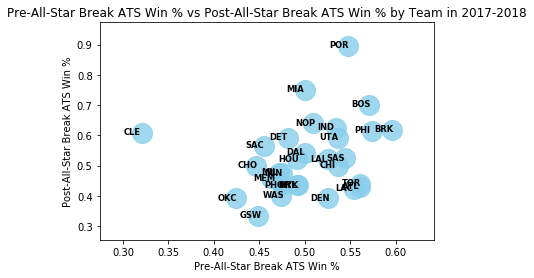

In [115]:
#create dataframe and plot
dfg = pd.DataFrame({
'x': atsbefore7,
'y': atsafter7,
'group': ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM',\
'MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']})
 
p1=sns.regplot(data=dfg, x="x", y="y", fit_reg=False, color="skyblue",marker='o', scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,dfg.shape[0]):
     p1.text(dfg.x[line] - .02, dfg.y[line]-.005, dfg.group[line], size='small', color='black', weight='semibold')
 
p1.set_title('Pre-All-Star Break ATS Win % vs Post-All-Star Break ATS Win % by Team in 2017-2018')
p1.set_xlabel('Pre-All-Star Break ATS Win %')
p1.set_ylabel('Post-All-Star Break ATS Win %')

Based on the data, there is a fair split of teams that have consistent results from before to after the break and those that change their ATS fates dramatically. The most obvious outlier comes in the 2017-2018 season with Cleveland. They had by far the lowerst ATS percentage before the break but raised that to over 60% in the second half of the year. Results like this are possible because of oddsmakers curbing their lines more appropriately, or changing them more favorably if the betting public is often wagering against them. Or it could just be a case of teams reverting to the norm. There could be many factors why some team's remain consistent, and some teams do not. If a team is good and fighting for a playoff spot or better playoff positioning they would likely have consistent ATS percentages before and after the break. But if a team on the fringe of making the playoffs starts to scuffle, they could start performing worse as their incentive to win goes down throughout the year. In any case like this, a team by team, game by game analysis of these splits would be best to truly uncover what is happening, but these overall trends are important in understanding what generally takes place for ATS performances throughout the year.

The upcoming analysis will take a look at some other variables that show when teams win games or win against the spread.

In [116]:
#how often a team wins when leading at half time
df_lht = df[df.HtMargin > 0]
df_lhtw = df_lht[df_lht.win == 1]
wp = len(df_lhtw) / len(df_lht)
print('When a team is leading at halftime, they win ' + '{:.2f}'.format(wp * 100) + '% of the time.')

#how often a team wins when leading at half time and is a favorite
df_lht = df[(df.HtMargin > 0) & (df.Type == 'Fav')]
df_lhtw = df_lht[df_lht.win == 1]
wp = len(df_lhtw) / len(df_lht)
print('When a favorite is leading at halftime, they win ' + '{:.2f}'.format(wp * 100) + '% of the time.')

#how often a team wins when leading at half time and is an underdog
df_lht = df[(df.HtMargin > 0) & (df.Type == 'Dog')]
df_lhtw = df_lht[df_lht.win == 1]
wp = len(df_lhtw) / len(df_lht)
print('When an underdog is leading at halftime, they win ' + '{:.2f}'.format(wp * 100) + '% of the time.')

When a team is leading at halftime, they win 73.65% of the time.
When a favorite is leading at halftime, they win 84.67% of the time.
When an underdog is leading at halftime, they win 54.92% of the time.


When an underdog is leading a game at the half compared to a favorite, they win at almost a 30% less rate. Let's take a look at how this percentage fairs based on how big of an underdog a team is. We would expect the greater an underdog they are, no matter their halftime lead, they are less likely to win the game.

Text(0,0.5,'Winning %')

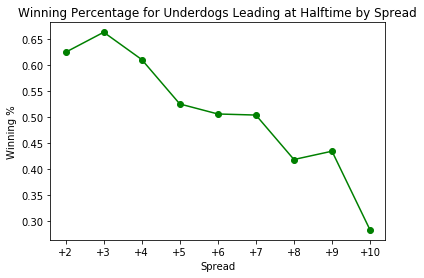

In [117]:
#winning percentages of underdogs when leading at haltime by spread

wpu = []

#how often a team wins when leading at half time and is a 2-2.5 point underdog
df_lht2 = df[(df.HtMargin > 0) & (df.Type == 'Dog') & (df.Line >= 2) & (df.Line < 3)]
df_2 = df_lht2[df_lht2.win == 1]
wp2 = len(df_2) / len(df_lht2)

#how often a team wins when leading at half time and is a 3-3.5 point underdog
df_lht3 = df[(df.HtMargin > 0) & (df.Type == 'Dog') & (df.Line >= 3) & (df.Line < 4)]
df_3 = df_lht3[df_lht3.win == 1]
wp3 = len(df_3) / len(df_lht3)

#how often a team wins when leading at half time and is a 4-4.5 point underdog
df_lht4 = df[(df.HtMargin > 0) & (df.Type == 'Dog') & (df.Line >= 4) & (df.Line < 5)]
df_4 = df_lht4[df_lht4.win == 1]
wp4 = len(df_4) / len(df_lht4)

#how often a team wins when leading at half time and is a 5-5.5 point underdog
df_lht5 = df[(df.HtMargin > 0) & (df.Type == 'Dog') & (df.Line >= 5) & (df.Line < 6)]
df_5 = df_lht5[df_lht5.win == 1]
wp5 = len(df_5) / len(df_lht5)

#how often a team wins when leading at half time and is a 6-6.5 point underdog
df_lht6 = df[(df.HtMargin > 0) & (df.Type == 'Dog') & (df.Line >= 6) & (df.Line < 7)]
df_6 = df_lht6[df_lht6.win == 1]
wp6 = len(df_6) / len(df_lht6)

#how often a team wins when leading at half time and is a 7-7.5 point underdog
df_lht7 = df[(df.HtMargin > 0) & (df.Type == 'Dog') & (df.Line >= 7) & (df.Line < 8)]
df_7 = df_lht7[df_lht7.win == 1]
wp7 = len(df_7) / len(df_lht7)

#how often a team wins when leading at half time and is a 8-8.5 point underdog
df_lht8 = df[(df.HtMargin > 0) & (df.Type == 'Dog') & (df.Line >= 8) & (df.Line < 9)]
df_8 = df_lht8[df_lht8.win == 1]
wp8 = len(df_8) / len(df_lht8)

#how often a team wins when leading at half time and is a 9-9.5 point underdog
df_lht9 = df[(df.HtMargin > 0) & (df.Type == 'Dog') & (df.Line >= 9) & (df.Line < 10)]
df_9 = df_lht9[df_lht9.win == 1]
wp9 = len(df_9) / len(df_lht9)

#how often a team wins when leading at half time and is a 10+ point underdog
df_lht10 = df[(df.HtMargin > 0) & (df.Type == 'Dog') & (df.Line >= 10)]
df_10 = df_lht10[df_lht10.win == 1]
wp10 = len(df_10) / len(df_lht10)

wpu.append(wp2),wpu.append(wp3),wpu.append(wp4),wpu.append(wp5),wpu.append(wp6),wpu.append(wp7),\
wpu.append(wp8),wpu.append(wp9),wpu.append(wp10)

X = ['+2','+3','+4','+5','+6','+7','+8','+9','+10']
plt.plot(X,wpu, color = 'green', marker='o')
plt.title('Winning Percentage for Underdogs Leading at Halftime by Spread')
plt.xlabel('Spread')
plt.ylabel('Winning %')

This graph is largely what we'd expect. When leading at half, five point underdogs and less win at more than a 50% rate, but larger underdogs of six or greater points have ended up losing more than half the time. This is not telling us everything going on here, because it does not note the size of the leads, but can still be valuable in the context of second half lines. At halftime, oddsmakers set a line for the second half of the game that can be wagered on. If a favorite is losing at halftime, many times the second half line would be close to an even spread for the remainder of the game. Knowing which types of teams end up closing out these games better could be advantageous, as it would be riskier to bet a larger underdog to win, especially since the percentage of wins drops dramatically at the +8 point mark.

The next analysis will look at when teams are leading after three quarters and how often they end up winning the game. How do these rates change depend on the lead they have, and whether they are an underdog or favorite?

Teams leading after 3 quarters have won %82.34 of the time.
Underdogs leading after 3 quarters have won %68.39 of the time.
Favorites leading after 3 quarters have won %89.40 of the time.


[Text(0.5,1,'Win % Leading After 3 Quarters: Favorites')]

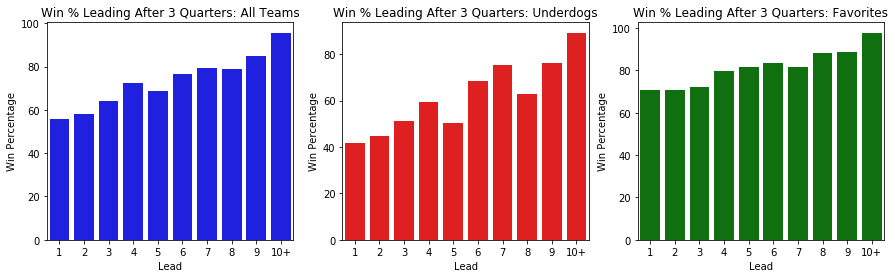

In [118]:
#percentage of wins leading after 3 quarters for all teams
df3q = df[df['1Q'] + df['2Q'] + df['3Q'] > df['O_1Q'] + df['O_2Q'] + df['O_3Q']]
df3qw = df3q[df3q.win == 1]
df3qp = len(df3qw) / len(df3q)
print('Teams leading after 3 quarters have won %' + '{:.2f}'.format(df3qp * 100) + ' of the time.')

#1 point lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) == 1]
df3qw = df3q[df3q.win == 1]
df3qp1 = len(df3qw) / len(df3q)

#2 point lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) == 2]
df3qw = df3q[df3q.win == 1]
df3qp2 = len(df3qw) / len(df3q)

#3 point lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) == 3]
df3qw = df3q[df3q.win == 1]
df3qp3 = len(df3qw) / len(df3q)

#4 point lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) == 4]
df3qw = df3q[df3q.win == 1]
df3qp4 = len(df3qw) / len(df3q)

#5 point lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) == 5]
df3qw = df3q[df3q.win == 1]
df3qp5 = len(df3qw) / len(df3q)

#6 point lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) == 6]
df3qw = df3q[df3q.win == 1]
df3qp6 = len(df3qw) / len(df3q)

#7 point lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) == 7]
df3qw = df3q[df3q.win == 1]
df3qp7 = len(df3qw) / len(df3q)

#8 point lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) == 8]
df3qw = df3q[df3q.win == 1]
df3qp8 = len(df3qw) / len(df3q)

#9 point lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) == 9]
df3qw = df3q[df3q.win == 1]
df3qp9 = len(df3qw) / len(df3q)

#double digit lead
df3q = df[(df['1Q'] + df['2Q'] + df['3Q']) - (df['O_1Q'] + df['O_2Q'] + df['O_3Q']) >= 10]
df3qw = df3q[df3q.win == 1]
df3qp10 = len(df3qw) / len(df3q)

#percentage of wins leading after 3 quarters for all underdogs
dfu = df[df.Type == 'Dog']
df3q = dfu[dfu['1Q'] + dfu['2Q'] + dfu['3Q'] > dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']]
df3qw = df3q[df3q.win == 1]
df3qp = len(df3qw) / len(df3q)
print('Underdogs leading after 3 quarters have won %' + '{:.2f}'.format(df3qp * 100) + ' of the time.')

#1 point lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) == 1]
df3qw = df3q[df3q.win == 1]
df3qp1u = len(df3qw) / len(df3q)

#2 point lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) == 2]
df3qw = df3q[df3q.win == 1]
df3qp2u = len(df3qw) / len(df3q)

#3 point lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) == 3]
df3qw = df3q[df3q.win == 1]
df3qp3u = len(df3qw) / len(df3q)

#4 point lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) == 4]
df3qw = df3q[df3q.win == 1]
df3qp4u = len(df3qw) / len(df3q)

#5 point lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) == 5]
df3qw = df3q[df3q.win == 1]
df3qp5u = len(df3qw) / len(df3q)

#6 point lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) == 6]
df3qw = df3q[df3q.win == 1]
df3qp6u = len(df3qw) / len(df3q)

#7 point lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) == 7]
df3qw = df3q[df3q.win == 1]
df3qp7u = len(df3qw) / len(df3q)

#8 point lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) == 8]
df3qw = df3q[df3q.win == 1]
df3qp8u = len(df3qw) / len(df3q)

#9 point lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) == 9]
df3qw = df3q[df3q.win == 1]
df3qp9u = len(df3qw) / len(df3q)

#double digit lead
df3q = dfu[(dfu['1Q'] + dfu['2Q'] + dfu['3Q']) - (dfu['O_1Q'] + dfu['O_2Q'] + dfu['O_3Q']) >= 10]
df3qw = df3q[df3q.win == 1]
df3qp10u = len(df3qw) / len(df3q)

#percentage of wins leading after 3 quarters for all favorites
dff = df[df.Type == 'Fav']
df3q = dff[dff['1Q'] + dff['2Q'] + dff['3Q'] > dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']]
df3qw = df3q[df3q.win == 1]
df3qp = len(df3qw) / len(df3q)
print('Favorites leading after 3 quarters have won %' + '{:.2f}'.format(df3qp * 100) + ' of the time.')

#1 point lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) == 1]
df3qw = df3q[df3q.win == 1]
df3qp1f = len(df3qw) / len(df3q)

#2 point lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) == 2]
df3qw = df3q[df3q.win == 1]
df3qp2f = len(df3qw) / len(df3q)

#3 point lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) == 3]
df3qw = df3q[df3q.win == 1]
df3qp3f = len(df3qw) / len(df3q)

#4 point lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) == 4]
df3qw = df3q[df3q.win == 1]
df3qp4f = len(df3qw) / len(df3q)

#5 point lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) == 5]
df3qw = df3q[df3q.win == 1]
df3qp5f = len(df3qw) / len(df3q)

#6 point lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) == 6]
df3qw = df3q[df3q.win == 1]
df3qp6f = len(df3qw) / len(df3q)

#7 point lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) == 7]
df3qw = df3q[df3q.win == 1]
df3qp7f = len(df3qw) / len(df3q)

#8 point lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) == 8]
df3qw = df3q[df3q.win == 1]
df3qp8f = len(df3qw) / len(df3q)

#9 point lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) == 9]
df3qw = df3q[df3q.win == 1]
df3qp9f = len(df3qw) / len(df3q)

#double digit lead
df3q = dff[(dff['1Q'] + dff['2Q'] + dff['3Q']) - (dff['O_1Q'] + dff['O_2Q'] + dff['O_3Q']) >= 10]
df3qw = df3q[df3q.win == 1]
df3qp10f = len(df3qw) / len(df3q)

#appending data to lists
lead_3q = []
lead_3q.append(df3qp1),lead_3q.append(df3qp2),lead_3q.append(df3qp3),lead_3q.append(df3qp4),lead_3q.append(df3qp5),\
lead_3q.append(df3qp6),lead_3q.append(df3qp7),lead_3q.append(df3qp8),lead_3q.append(df3qp9),lead_3q.append(df3qp10)
lead_3q = [i * 100 for i in lead_3q]

lead_3qu = []
lead_3qu.append(df3qp1u),lead_3qu.append(df3qp2u),lead_3qu.append(df3qp3u),lead_3qu.append(df3qp4u),lead_3qu\
.append(df3qp5u),lead_3qu.append(df3qp6u),lead_3qu.append(df3qp7u),lead_3qu.append(df3qp8u),lead_3qu.append(df3qp9u),\
lead_3qu.append(df3qp10u)
lead_3qu = [i * 100 for i in lead_3qu]

lead_3qf = []
lead_3qf.append(df3qp1f),lead_3qf.append(df3qp2f),lead_3qf.append(df3qp3f),lead_3qf.append(df3qp4f),lead_3qf\
.append(df3qp5f),lead_3qf.append(df3qp6f),lead_3qf.append(df3qp7f),lead_3qf.append(df3qp8f),lead_3qf.append(df3qp9f),\
lead_3qf.append(df3qp10f)
lead_3qf = [i * 100 for i in lead_3qf]

#creating plots
df_3q = {'Win Percentage':lead_3q,'Lead':[1,2,3,4,5,6,7,8,9,'10+']}
df_3q = pd.DataFrame(df_3q)
df_3qu = {'Win Percentage':lead_3qu,'Lead':[1,2,3,4,5,6,7,8,9,'10+']}
df_3qu = pd.DataFrame(df_3qu)
df_3qf = {'Win Percentage':lead_3qf,'Lead':[1,2,3,4,5,6,7,8,9,'10+']}
df_3qf = pd.DataFrame(df_3qf)
fig = plt.figure(figsize=(15, 4))
axes = fig.add_subplot(1, 3, 1)
sns.barplot(data=df_3q, x='Lead', y='Win Percentage',ax=axes, color ='b')
axes.set(title='Win % Leading After 3 Quarters: All Teams')
axes = fig.add_subplot(1, 3, 2)
sns.barplot(data=df_3qu, x='Lead', y='Win Percentage',ax=axes, color='r')
axes.set(title='Win % Leading After 3 Quarters: Underdogs')
axes = fig.add_subplot(1, 3, 3)
sns.barplot(data=df_3qf, x='Lead', y='Win Percentage',ax=axes, color='g')
axes.set(title='Win % Leading After 3 Quarters: Favorites')

As a team's third quarter lead increases, they end up winning the game more often. This is seen much more prominently in underdogs than favorites however. Underdogs are not consistently winning without at least a 6 point lead, whereas the percentage of games won with a lead is much more steady for a favorite. This could be simply reflective of how favorites win more often, which would mean the majority of the time they are just in being called a favorite. Let's see if that is true.

Text(0.5,1,'Winning Percentage for Favorites by Season')

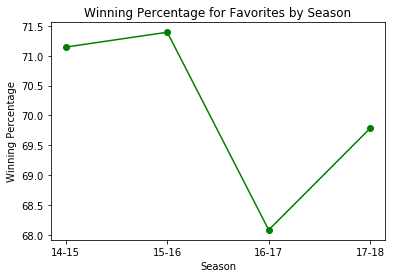

In [119]:
#df_uf will represent all games where a team is either an underdog or a favorite, thus no data points where the 
#spread is even
df_uf = df[df.Type != 'Pickem']
#finding the percentage of games won as a favorite in 2014-2015
dff4 = df[(df.Season == '14-15') & (df.Type == 'Fav')]
dffw4 = dff4[dff4.win == 1]
dffp4 = len(dffw4) / len(dff4)

#finding the percentage of games won as a favorite in 2015-2016
dff5 = df[(df.Season == '15-16') & (df.Type == 'Fav')]
dffw5 = dff5[dff5.win == 1]
dffp5 = len(dffw5) / len(dff5)

#finding the percentage of games won as a favorite in 2016-2017
dff6 = df[(df.Season == '16-17') & (df.Type == 'Fav')]
dffw6 = dff6[dff6.win == 1]
dffp6 = len(dffw6) / len(dff6)

#finding the percentage of games won as a favorite in 2017-2018
dff7 = df[(df.Season == '17-18') & (df.Type == 'Fav')]
dffw7 = dff7[dff7.win == 1]
dffp7 = len(dffw7) / len(dff7)

#append data to list
wpasfav = []
wpasfav.append(dffp4),wpasfav.append(dffp5),wpasfav.append(dffp6),wpasfav.append(dffp7)
wpasfav = [i * 100 for i in wpasfav]

#plot
plt.plot(season_list,wpasfav, color = 'green',marker='o')
plt.xlabel('Season')
plt.ylabel('Winning Percentage')
plt.title('Winning Percentage for Favorites by Season')

Like we predicted based on third quarter leads for favorites from the previous graph, for each year favorites are more likely to win. This shows they are right in being called favorites since they mostly win from a 68 to 72 percent rate year by year. 

One variable for NBA games that is determined before anyone even touches a basketball during the season is the schedule, and how the amount of rest between games impacts performance. This analysis will show how teams performs on a certain amount of rest compared to their opponents, and if this is a useful variable for making bets based on this information. 

[Text(0.5,1,'ATS Win % Based on Amount of Rest')]

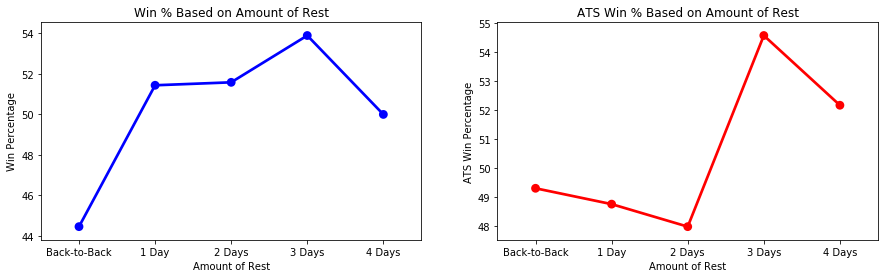

In [120]:
#acquiring the percentages on team win percentages and ATS percentages based on rest

#win percentage on back-to-backs
df_1 = df[df.Rest == '1 days']
df_1w = df_1.win.sum()
r1 = df_1w / len(df_1)

#win percentage with 1 day of rest
df_2 = df[df.Rest == '2 days']
df_2w = df_2.win.sum()
r2 = df_2w / len(df_2)

#win percentage with 2 days of rest
df_3 = df[df.Rest == '3 days']
df_3w = df_3.win.sum()
r3 = df_3w / len(df_3)

#win percentage with 3 days of rest
df_4 = df[df.Rest == '4 days']
df_4w = df_4.win.sum()
r4 = df_4w / len(df_4)

#win percentage with 4 days of rest
df_5 = df[df.Rest == '5 days']
df_5w = df_5.win.sum()
r5 = df_5w / len(df_5)

#ATS win percentage on back-to-backs
df_1 = df[(df.Rest == '1 days')]
df_1w = df_1.sr_win.sum()
r1a = df_1w / len(df_1)

#ATS win percentage with 1 day of rest
df_2 = df[df.Rest == '2 days']
df_2w = df_2.sr_win.sum()
r2a = df_2w / len(df_2)

#ATS win percentage with 2 days of rest
df_3 = df[df.Rest == '3 days']
df_3w = df_3.sr_win.sum()
r3a = df_3w / len(df_3)

#ATS win percentage with 3 days of rest
df_4 = df[df.Rest == '4 days']
df_4w = df_4.sr_win.sum()
r4a = df_4w / len(df_4)

#ATS win percentage with 4 days of rest
df_5 = df[df.Rest == '5 days']
df_5w = df_5.sr_win.sum()
r5a = df_5w / len(df_5)

#append data to lists
winperc_by_rest,atsperc_by_rest = [],[]
winperc_by_rest.append(r1),winperc_by_rest.append(r2),winperc_by_rest.append(r3),winperc_by_rest.append(r4),\
winperc_by_rest.append(r5)
atsperc_by_rest.append(r1a),atsperc_by_rest.append(r2a),atsperc_by_rest.append(r3a),atsperc_by_rest.append(r4a),\
atsperc_by_rest.append(r5a)
winperc_by_rest = [i * 100 for i in winperc_by_rest]
atsperc_by_rest = [i * 100 for i in atsperc_by_rest]

#plot
restwp = {'Amount of Rest':['Back-to-Back','1 Day','2 Days','3 Days','4 Days'], 'Win Percentage':winperc_by_rest}
restwp = pd.DataFrame(restwp)
restatsp = {'Amount of Rest':['Back-to-Back','1 Day','2 Days','3 Days','4 Days'],'ATS Win Percentage':atsperc_by_rest}
restatsp = pd.DataFrame(restatsp)
fig = plt.figure(figsize=(15, 4))
axes = fig.add_subplot(1, 2, 1)
sns.pointplot(data=restwp, x='Amount of Rest', y='Win Percentage',ax=axes, color ='b')
axes.set(title='Win % Based on Amount of Rest')
axes = fig.add_subplot(1, 2, 2)
sns.pointplot(data=restatsp, x='Amount of Rest', y='ATS Win Percentage',ax=axes, color ='r')
axes.set(title='ATS Win % Based on Amount of Rest')

These two graphs vary dramatically, with the regular winning percentage based on rest before more intuitive. There teams playing on a back-to-back lose almost 44% of those games, and that percentage increases to around 50% and above for normal rest days. The ATS graph is a bit more confusing, with 0-2 days of rest being under 50% and the only outlier is 3 days of rest above 54% ATS performance. It could be interesting to see how a team's rest compared to their opponent's rest impacts these percentages. 

[Text(0.5,1,'ATS Winning Percentage Based on Amount of Rest')]

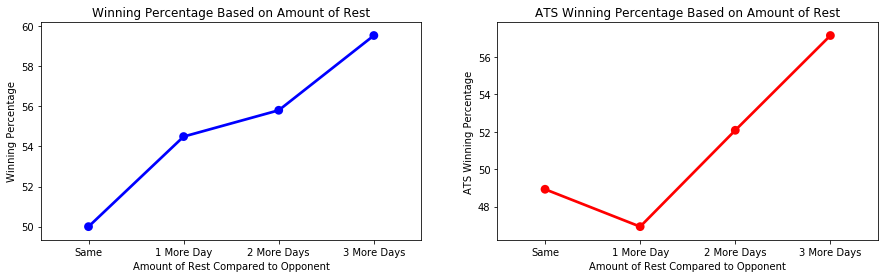

In [121]:
#percentage of games won and ATS % by teams based on amount of rest vs opponent, excluding game after all star-break

#percentage of games won with same amount of rest as opponent
dfrd1 = df[(df.Rest - df.O_Rest == '0 days') & (df.Rest < '8 days')]
dfrd1w = dfrd1.win.sum()
dfrd0p = dfrd1w / len(dfrd1)

#percentage of games won with 1 more day of rest than opponent
dfrd1 = df[(df.Rest - df.O_Rest == '1 days') & (df.Rest < '8 days')]
dfrd1w = dfrd1.win.sum()
dfrd1p = dfrd1w / len(dfrd1)

#percentage of games won with 2 more days of rest than opponent
dfrd2 = df[(df.Rest - df.O_Rest == '2 days') & (df.Rest < '8 days') ]
dfrd2w = dfrd2.win.sum()
dfrd2p = dfrd2w / len(dfrd2)

#percentage of games won with 3 more days of rest than opponent
dfrd3 = df[(df.Rest - df.O_Rest == '3 days') & (df.Rest < '8 days') ]
dfrd3w = dfrd3.win.sum()
dfrd3p = dfrd3w / len(dfrd3)

#percentage of games won ATS with same amount of rest as opponent
dfrd1 = df[(df.Rest - df.O_Rest == '0 days') & (df.Rest < '8 days')]
dfrd1w = dfrd1.sr_win.sum()
dfrd0pa = dfrd1w / len(dfrd1)

#percentage of games won ATS with 1 more day of rest than opponent
dfrd1 = df[(df.Rest - df.O_Rest == '1 days') & (df.Rest < '8 days')]
dfrd1w = dfrd1.sr_win.sum()
dfrd1pa = dfrd1w / len(dfrd1)

#percentage of games won ATS with 2 more days of rest than opponent
dfrd2 = df[(df.Rest - df.O_Rest == '2 days') & (df.Rest < '8 days') ]
dfrd2w = dfrd2.sr_win.sum()
dfrd2pa = dfrd2w / len(dfrd2)

#percentage of games won ATS with 3 more days of rest than opponent
dfrd3 = df[(df.Rest - df.O_Rest == '3 days') & (df.Rest < '8 days') ]
dfrd3w = dfrd3.sr_win.sum()
dfrd3pa = dfrd3w / len(dfrd3)

#append data to lists
rest_diffs,ats_rest_diffs = [],[]
rest_diffs.append(dfrd0p),rest_diffs.append(dfrd1p),rest_diffs.append(dfrd2p),rest_diffs.append(dfrd3p)
ats_rest_diffs.append(dfrd0pa),ats_rest_diffs.append(dfrd1pa),ats_rest_diffs.append(dfrd2pa),\
ats_rest_diffs.append(dfrd3pa)
rest_diffs = [i * 100 for i in rest_diffs]
ats_rest_diffs = [i * 100 for i in ats_rest_diffs]

#plot
restwp = {'Amount of Rest Compared to Opponent':['Same','1 More Day','2 More Days','3 More Days'],\
'Winning Percentage':rest_diffs}
restwp = pd.DataFrame(restwp)
restatsp = {'Amount of Rest Compared to Opponent':['Same','1 More Day','2 More Days','3 More Days'],\
'ATS Winning Percentage':ats_rest_diffs}
restatsp = pd.DataFrame(restatsp)
fig = plt.figure(figsize=(15, 4))
axes = fig.add_subplot(1, 2, 1)
sns.pointplot(data=restwp, x='Amount of Rest Compared to Opponent', y='Winning Percentage',ax=axes, color ='b')
axes.set(title='Winning Percentage Based on Amount of Rest')
axes = fig.add_subplot(1, 2, 2)
sns.pointplot(data=restatsp, x='Amount of Rest Compared to Opponent', y='ATS Winning Percentage',ax=axes, color ='r')
axes.set(title='ATS Winning Percentage Based on Amount of Rest')

These graphs are what we would expect in terms of the win percentages rising, and unlike the previous graphs, this ATS graph rises similarly to the regular winning percentage. It is clear having more rest than your opponent is a strong indiactor of whether or not a team will win a game, especially as the rest differential increases. For ATS percentages, having 1 more day of rest actually has a less than 50% win rate which is interesting, but as the differential goes up ATS percentages steadily rise. It should be noted that these percentages might be slightly less than perceieved because it is including ties, and they are not counted as ATS wins, even though they are not losses either.

Another interesting factor determined by a team's schedule is when they play a team in consecutive games. Does their performance in the first game have any influence in the next game vs that team? 

In [122]:
#dataframe of all teams playing consecutive games vs the same opponent
dfg = df.sort_values(by = ['Season','Team'])
dfg = dfg.reset_index()
df1 = dfg.copy()
df1.index = df1.index + 1
df_m = dfg.join(df1, lsuffix = 'l')

df_mm = df_m[(df_m.Opponent == df_m.Opponentl) & (df_m.Seasonl == df_m.Season) & (df_m['Home/Away'] != df_m['Home/Awayl'])]
df_mm = df_mm[['Team','Opponent','Home/Away','Home/Awayl','Result','Resultl']]
df_mm = df_mm.rename(columns = {'Home/Away': 'Game 1 Home/Away', 'Home/Awayl' : 'Game 2 Home/Away','Result':\
'Game 1 Result', 'Resultl': 'Game 2 Result' })
df_mm.head(30)

,Team,Opponent,Game 1 Home/Away,Game 2 Home/Away,Game 1 Result,Game 2 Result
5,ATL,NYK,Home,Away,W,W
22,ATL,ORL,Home,Away,W,L
29,ATL,MIL,Home,Away,L,W
100,BOS,WAS,Home,Away,W,L
161,BOS,CLE,Away,Home,W,W
204,BRK,WAS,Away,Home,W,L
376,CHO,WAS,Away,Home,W,W
489,CLE,BOS,Home,Away,L,L
532,DAL,DEN,Away,Home,L,W
564,DAL,SAS,Home,Away,W,L


In [123]:
#winning percentage in 2nd game of a back-to-back vs consecutive opponent when team wins the 1st game
dfw = df_mm[df_mm['Game 1 Result'] == 'W']
dfww = dfw[dfw['Game 2 Result'] == 'W']
wp = len(dfww) / len(dfw)
print('When a team wins the first game of a back-to-back vs the same opponent, they win the second game at a \
' + '{:.1f}'.format(wp * 100) + '% rate.')

#winning percentage in 2nd game of a back-to-back vs consecutive opponent when team loses the 1st game
dfw0 = df_mm[df_mm['Game 1 Result'] == 'L']
dfww0 = dfw0[dfw0['Game 2 Result'] == 'W']
wp0 = len(dfww0) / len(dfw0)
print('When a team loses the first game of a back-to-back vs the same opponent, they win the second game at a \
' + '{:.1f}'.format(wp0 * 100) + '% rate.')

#winning % in 2nd game (at home) of a back-to-back vs consecutive opponent when team loses the 1st game on the road
dfw1 = df_mm[(df_mm['Game 1 Result'] == 'L') & (df_mm['Game 1 Home/Away'] == 'Away')]
dfww1 = dfw1[dfw1['Game 2 Result'] == 'W']
wp1 = len(dfww1) / len(dfw1)
print('When a team loses the first game of a back-to-back vs the same opponent at home, they win the second \
game on the road at a ' + '{:.1f}'.format(wp1 * 100) + '% rate.')

#winning % in 2nd game (on road) of a back-to-back vs consecutive opponent when team loses the 1st game at home
dfw2 = df_mm[(df_mm['Game 1 Result'] == 'L') & (df_mm['Game 1 Home/Away'] == 'Home')]
dfww2 = dfw2[dfw2['Game 2 Result'] == 'W']
wp2 = len(dfww2) / len(dfw2)
print('When a team loses the first game of a back-to-back vs the same opponent on the road, they win the second \
game at home at a ' + '{:.1f}'.format(wp2 * 100) + '% rate.')

When a team wins the first game of a back-to-back vs the same opponent, they win the second game at a 52.1% rate.
When a team loses the first game of a back-to-back vs the same opponent, they win the second game at a 46.5% rate.
When a team loses the first game of a back-to-back vs the same opponent at home, they win the second game on the road at a 48.7% rate.
When a team loses the first game of a back-to-back vs the same opponent on the road, they win the second game at home at a 43.8% rate.


These percentages are a bit surprising. In the second game of a back-to-back vs the same opponent, if a team wins the first one they are more likely to win the next one and complete the sweep, and if they lose the first one they are even more likely to lose the next game, debunking the "revenge game" theory that a team is not as likely to have the same result in these back-to-back situations. Maybe even more surprising is that when a team loses the first game at home as opposed to away, they are more likely to win the second game on the road than the second game at home. These percentages are relatively close to 50% as it is hard to take defintitive insight on them for betting purposes. However, it could be worthwhile to see which teams perform best in these scenarios across various seasons. 

Another potentially worthwile variable to investigate is how does a team's recent performance affect their winning percentages. Below will be analysis of team performance based on their winning and losing streaks as well as previous 10 game performance. 

[Text(0.5,1,'Winning Percentage Based on Total of Current Losing Streak')]

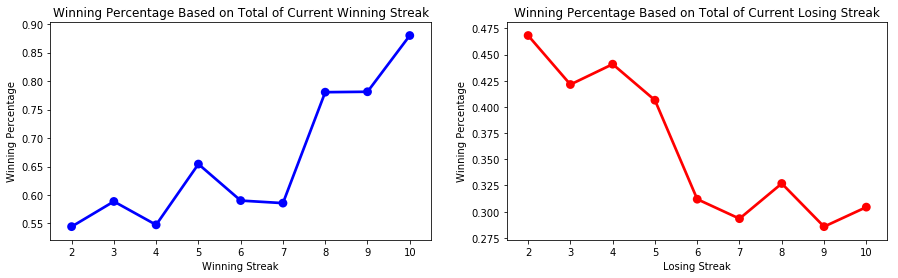

In [124]:
#percentages of games won in season based on length of winning streak
#2 game win streak
dfs2 = df[df.W_Streak == 2]
dfs2w = dfs2.win.sum()
dfs2p = dfs2w / len(dfs2)

#3 game win streak
dfs3 = df[df.W_Streak == 3]
dfs3w = dfs3.win.sum()
dfs3p = dfs3w / len(dfs3)

#4 game win streak
dfs4 = df[df.W_Streak == 4]
dfs4w = dfs4.win.sum()
dfs4p = dfs4w / len(dfs4)

#5 game win streak
dfs5 = df[df.W_Streak == 5]
dfs5w = dfs5.win.sum()
dfs5p = dfs5w / len(dfs5)

#6 game win streak
dfs6 = df[df.W_Streak == 6]
dfs6w = dfs6.win.sum()
dfs6p = dfs6w / len(dfs6)

#7 game win streak
dfs7 = df[df.W_Streak == 7]
dfs7w = dfs7.win.sum()
dfs7p = dfs7w / len(dfs7)

#8 game win streak
dfs8 = df[df.W_Streak == 8]
dfs8w = dfs8.win.sum()
dfs8p = dfs8w / len(dfs8)

#9 game win streak
dfs9 = df[df.W_Streak == 9]
dfs9w = dfs9.win.sum()
dfs9p = dfs9w / len(dfs9)

#10 game win streak
dfs10 = df[df.W_Streak == 10]
dfs10w = dfs10.win.sum()
dfs10p = dfs10w / len(dfs10)

#percentages of games won in season based on length of losing streak
#2 game losing streak
dfls2 = df[df.L_Streak == 2]
dfls2w = dfls2.win.sum()
dfls2p = dfls2w / len(dfls2)

#3 game losing streak
dfls3 = df[df.L_Streak == 3]
dfls3w = dfls3.win.sum()
dfls3p = dfls3w / len(dfls3)

#4 game losing streak
dfls4 = df[df.L_Streak == 4]
dfls4w = dfls4.win.sum()
dfls4p = dfls4w / len(dfls4)

#5 game losing streak
dfls5 = df[df.L_Streak == 5]
dfls5w = dfls5.win.sum()
dfls5p = dfls5w / len(dfls5)

#6 game losing streak
dfls6 = df[df.L_Streak == 6]
dfls6w = dfls6.win.sum()
dfls6p = dfls6w / len(dfls6)

#7 game losing streak
dfls7 = df[df.L_Streak == 7]
dfls7w = dfls7.win.sum()
dfls7p = dfls7w / len(dfls7)

#8 game losing streak
dfls8 = df[df.L_Streak == 8]
dfls8w = dfls8.win.sum()
dfls8p = dfls8w / len(dfls8)

#9 game losing streak
dfls9 = df[df.L_Streak == 9]
dfls9w = dfls9.win.sum()
dfls9p = dfls9w / len(dfls9)

#10 game losing streak
dfls10 = df[df.L_Streak == 10]
dfls10w = dfls10.win.sum()
dfls10p = dfls10w / len(dfls10)

#append data to lists
streak_percs,lstreak_percs = [],[]

streak_percs.append(dfs2p),streak_percs.append(dfs3p),streak_percs.append(dfs4p),streak_percs.append(dfs5p),\
streak_percs.append(dfs6p),streak_percs.append(dfs7p),streak_percs.append(dfs8p),streak_percs.append(dfs9p),\
streak_percs.append(dfs10p)

lstreak_percs.append(dfls2p),lstreak_percs.append(dfls3p),lstreak_percs.append(dfls4p),lstreak_percs.append(dfls5p),\
lstreak_percs.append(dfls6p),lstreak_percs.append(dfls7p),lstreak_percs.append(dfls8p),lstreak_percs.append(dfls9p),\
lstreak_percs.append(dfls10p)

#plot
wstreak = {'Winning Streak':np.arange(2,11),'Winning Percentage':streak_percs}
wstreak = pd.DataFrame(wstreak)
lstreak = {'Losing Streak':np.arange(2,11),'Winning Percentage':lstreak_percs}
lstreak = pd.DataFrame(lstreak)
fig = plt.figure(figsize=(15, 4))
axes = fig.add_subplot(1, 2, 1)
sns.pointplot(data=wstreak, x='Winning Streak', y='Winning Percentage',ax=axes, color ='b')
axes.set(title='Winning Percentage Based on Total of Current Winning Streak')
axes = fig.add_subplot(1, 2, 2)
sns.pointplot(data=lstreak, x='Losing Streak', y='Winning Percentage',ax=axes, color ='r')
axes.set(title='Winning Percentage Based on Total of Current Losing Streak')

These trends make sense, as a team's winning and losing streaks increase, they become more and less likely to win the next game. This shows the importance of how a team's most recent very good or bad performance does impact the next game for a team. If a team is on a streak, they are more likely to continue that streak than to break it in the most current game. Let's see if winning streaks have any noticeable effect on team's ATS performances.

[Text(0.5,1,'ATS Winning Percentage Based on Total of Current Losing Streak')]

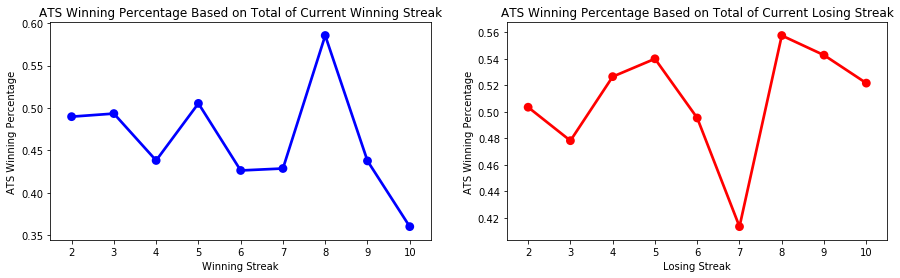

In [125]:
#percentages of games won ATS in season based on length of (normal) winning streak
#2 game win streak
dfs2 = df[df.W_Streak == 2]
dfs2w = dfs2.sr_win.sum()
dfs2p = dfs2w / len(dfs2)

#3 game win streak
dfs3 = df[df.W_Streak == 3]
dfs3w = dfs3.sr_win.sum()
dfs3p = dfs3w / len(dfs3)

#4 game win streak
dfs4 = df[df.W_Streak == 4]
dfs4w = dfs4.sr_win.sum()
dfs4p = dfs4w / len(dfs4)

#5 game win streak
dfs5 = df[df.W_Streak == 5]
dfs5w = dfs5.sr_win.sum()
dfs5p = dfs5w / len(dfs5)

#6 game win streak
dfs6 = df[df.W_Streak == 6]
dfs6w = dfs6.sr_win.sum()
dfs6p = dfs6w / len(dfs6)

#7 game win streak
dfs7 = df[df.W_Streak == 7]
dfs7w = dfs7.sr_win.sum()
dfs7p = dfs7w / len(dfs7)

#8 game win streak
dfs8 = df[df.W_Streak == 8]
dfs8w = dfs8.sr_win.sum()
dfs8p = dfs8w / len(dfs8)

#9 game win streak
dfs9 = df[df.W_Streak == 9]
dfs9w = dfs9.sr_win.sum()
dfs9p = dfs9w / len(dfs9)

#10 game win streak
dfs10 = df[df.W_Streak == 10]
dfs10w = dfs10.sr_win.sum()
dfs10p = dfs10w / len(dfs10)

#percentages of games won ATS in season based on length of (normal) losing streak
#2 game losing streak
dfls2 = df[df.L_Streak == 2]
dfls2w = dfls2.sr_win.sum()
dfls2p = dfls2w / len(dfls2)

#3 game losing streak
dfls3 = df[df.L_Streak == 3]
dfls3w = dfls3.sr_win.sum()
dfls3p = dfls3w / len(dfls3)

#4 game losing streak
dfls4 = df[df.L_Streak == 4]
dfls4w = dfls4.sr_win.sum()
dfls4p = dfls4w / len(dfls4)

#5 game losing streak
dfls5 = df[df.L_Streak == 5]
dfls5w = dfls5.sr_win.sum()
dfls5p = dfls5w / len(dfls5)

#6 game losing streak
dfls6 = df[df.L_Streak == 6]
dfls6w = dfls6.sr_win.sum()
dfls6p = dfls6w / len(dfls6)

#7 game losing streak
dfls7 = df[df.L_Streak == 7]
dfls7w = dfls7.sr_win.sum()
dfls7p = dfls7w / len(dfls7)

#8 game losing streak
dfls8 = df[df.L_Streak == 8]
dfls8w = dfls8.sr_win.sum()
dfls8p = dfls8w / len(dfls8)

#9 game losing streak
dfls9 = df[df.L_Streak == 9]
dfls9w = dfls9.sr_win.sum()
dfls9p = dfls9w / len(dfls9)

#10 game losing streak
dfls10 = df[df.L_Streak == 10]
dfls10w = dfls10.sr_win.sum()
dfls10p = dfls10w / len(dfls10)

#create lists and append data
streak_percs,lstreak_percs = [],[]

streak_percs.append(dfs2p),streak_percs.append(dfs3p),streak_percs.append(dfs4p),streak_percs.append(dfs5p),\
streak_percs.append(dfs6p),streak_percs.append(dfs7p),streak_percs.append(dfs8p),streak_percs.append(dfs9p),\
streak_percs.append(dfs10p)

lstreak_percs.append(dfls2p),lstreak_percs.append(dfls3p),lstreak_percs.append(dfls4p),lstreak_percs.append(dfls5p),\
lstreak_percs.append(dfls6p),lstreak_percs.append(dfls7p),lstreak_percs.append(dfls8p),lstreak_percs.append(dfls9p),\
lstreak_percs.append(dfls10p)

#plot
wstreak = {'Winning Streak':np.arange(2,11),'ATS Winning Percentage':streak_percs}
wstreak = pd.DataFrame(wstreak)
lstreak = {'Losing Streak':np.arange(2,11),'ATS Winning Percentage':lstreak_percs}
lstreak = pd.DataFrame(lstreak)
fig = plt.figure(figsize=(15, 4))
axes = fig.add_subplot(1, 2, 1)
sns.pointplot(data=wstreak, x='Winning Streak', y='ATS Winning Percentage',ax=axes, color ='b')
axes.set(title='ATS Winning Percentage Based on Total of Current Winning Streak')
axes = fig.add_subplot(1, 2, 2)
sns.pointplot(data=lstreak, x='Losing Streak', y='ATS Winning Percentage',ax=axes, color ='r')
axes.set(title='ATS Winning Percentage Based on Total of Current Losing Streak')

There is no pattern to these results, and it is likely a team's actual streak has nothing to do with whether or not they will perform any better or worse against the spread. This can be because a team's recent performance is factored into the line of a game. It could be possible that if a team is on a certain ATS streak that that could lead to improved or worsened performance in covering the spread in their next game.

In [126]:
#function takes one team's games and calculates consecutive wins ATS of that team into new df
#for loop concatenating all dfs together.
#column 'SR_W_Streak' shows if a team has an active winning streak ATS before start of current game and its length

def sr_winstreak(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams = df_teams[df_teams.SpreadResult != 'P']
    w = df_teams.sr_win.astype(bool)
    df_teams['SR_W_Streak'] = (w.groupby([w, (~w).cumsum().where(w)]).cumcount().add(1).mul(w))
    df_teams['SR_W_Streak'] = df_teams['SR_W_Streak'].shift(1, axis =0)
    return df_teams

df_win_ats = pd.DataFrame()

for season in season_list:
     for team in team_list: 
        df_win_ats = df_win_ats.append(sr_winstreak(team,season,df))
df_win_ats = df_win_ats.sort_values(by = ['Date','Time'])

In [127]:
#function takes one team's games and calculates consecutive losses ATS of that team into new df
#for loop concatenating all dfs together.
#column 'SR_L_Streak' shows if a team has an active losing streak ATS before start of current game and its length

def sr_losingstreak(team,season,df):
    
    df = df[df['Season'] == season]
    df_teams = df[df['Team'] == team]
    df_teams = df_teams[df_teams.SpreadResult != 'P']
    w = df_teams.sr_lose.astype(bool)
    df_teams['SR_L_Streak'] = (w.groupby([w, (~w).cumsum().where(w)]).cumcount().add(1).mul(w))
    df_teams['SR_L_Streak'] = df_teams['SR_L_Streak'].shift(1, axis =0)
    return df_teams

df_lose_ats = pd.DataFrame()

for season in season_list:
     for team in team_list: 
        df_lose_ats = df_lose_ats.append(sr_losingstreak(team,season,df))
df_lose_ats = df_lose_ats.sort_values(by = ['Date','Time'])

In [128]:
#add new data columns for winning and losing streaks ATS
df['SR_W_Streak'] = df_win_ats['SR_W_Streak']
df['SR_L_Streak'] = df_lose_ats['SR_L_Streak']

[Text(0.5,1,'ATS Winning Percentage Based on Total of Current ATS Losing Streak')]

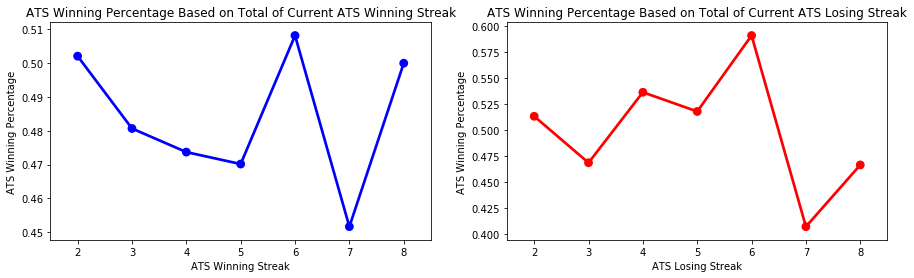

In [129]:
#percentages of games won ATS in season based on length of ATS winning streak
#2 game ATS win streak
dfs2 = df[df.SR_W_Streak == 2]
dfs2w = dfs2.sr_win.sum()
dfs2p = dfs2w / len(dfs2)

#3 game ATS win streak
dfs3 = df[df.SR_W_Streak == 3]
dfs3w = dfs3.sr_win.sum()
dfs3p = dfs3w / len(dfs3)

#4 game ATS win streak
dfs4 = df[df.SR_W_Streak == 4]
dfs4w = dfs4.sr_win.sum()
dfs4p = dfs4w / len(dfs4)

#5 game ATS win streak
dfs5 = df[df.SR_W_Streak == 5]
dfs5w = dfs5.sr_win.sum()
dfs5p = dfs5w / len(dfs5)

#6 game ATS win streak
dfs6 = df[df.SR_W_Streak == 6]
dfs6w = dfs6.sr_win.sum()
dfs6p = dfs6w / len(dfs6)

#7 game ATS win streak
dfs7 = df[df.SR_W_Streak == 7]
dfs7w = dfs7.sr_win.sum()
dfs7p = dfs7w / len(dfs7)

#8 game ATS win streak
dfs8 = df[df.SR_W_Streak == 8]
dfs8w = dfs8.sr_win.sum()
dfs8p = dfs8w / len(dfs8)

#percentages of games won ATS in season based on length of ATS losing streak
#2 game ATS losing streak
dfls2 = df[df.SR_L_Streak == 2]
dfls2w = dfls2.sr_win.sum()
dfls2p = dfls2w / len(dfls2)

#3 game ATS losing streak
dfls3 = df[df.SR_L_Streak == 3]
dfls3w = dfls3.sr_win.sum()
dfls3p = dfls3w / len(dfls3)

#4 game ATS losing streak
dfls4 = df[df.SR_L_Streak == 4]
dfls4w = dfls4.sr_win.sum()
dfls4p = dfls4w / len(dfls4)

#5 game ATS losing streak
dfls5 = df[df.SR_L_Streak == 5]
dfls5w = dfls5.sr_win.sum()
dfls5p = dfls5w / len(dfls5)

#6 game ATS losing streak
dfls6 = df[df.SR_L_Streak == 6]
dfls6w = dfls6.sr_win.sum()
dfls6p = dfls6w / len(dfls6)

#7 game ATS losing streak
dfls7 = df[df.SR_L_Streak == 7]
dfls7w = dfls7.sr_win.sum()
dfls7p = dfls7w / len(dfls7)

#8 game ATS losing streak
dfls8 = df[df.SR_L_Streak == 8]
dfls8w = dfls8.sr_win.sum()
dfls8p = dfls8w / len(dfls8)

#create lists and append data
streak_percs,lstreak_percs = [],[]

streak_percs.append(dfs2p),streak_percs.append(dfs3p),streak_percs.append(dfs4p),streak_percs.append(dfs5p),\
streak_percs.append(dfs6p),streak_percs.append(dfs7p),streak_percs.append(dfs8p)

lstreak_percs.append(dfls2p),lstreak_percs.append(dfls3p),lstreak_percs.append(dfls4p),lstreak_percs.append(dfls5p),\
lstreak_percs.append(dfls6p),lstreak_percs.append(dfls7p),lstreak_percs.append(dfls8p)

#plot
wstreak = {'ATS Winning Streak':np.arange(2,9),'ATS Winning Percentage':streak_percs}
wstreak = pd.DataFrame(wstreak)
lstreak = {'ATS Losing Streak':np.arange(2,9),'ATS Winning Percentage':lstreak_percs}
lstreak = pd.DataFrame(lstreak)
fig = plt.figure(figsize=(15, 4))
axes = fig.add_subplot(1, 2, 1)
sns.pointplot(data=wstreak, x='ATS Winning Streak', y='ATS Winning Percentage',ax=axes, color ='b')
axes.set(title='ATS Winning Percentage Based on Total of Current ATS Winning Streak')
axes = fig.add_subplot(1, 2, 2)
sns.pointplot(data=lstreak, x='ATS Losing Streak', y='ATS Winning Percentage',ax=axes, color ='r')
axes.set(title='ATS Winning Percentage Based on Total of Current ATS Losing Streak')

It looks difficult to make sense of these trends, as they fluctuate greatly. It does not appear that a team's most recent and extreme performances against the spread will impact whether or not a team will cover or not in their next game. The next analysis will evaluate how teams streaking in opposite directions perform against one another.

[Text(0.5,1,"ATS Win % Based on Length of Team and Opponent's Winning/Losing Streaks")]

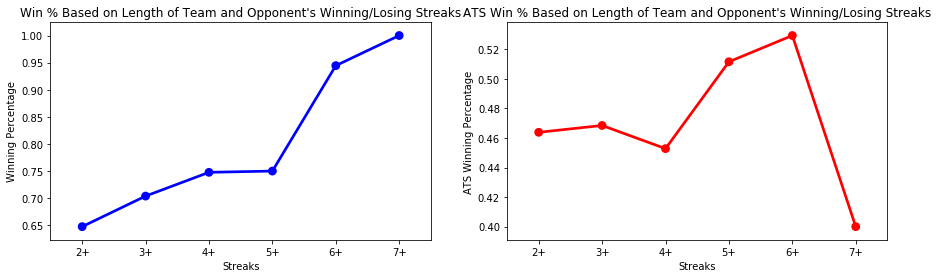

In [130]:
#winning percentage of teams with opposing winning and losing streaks of equal or greater amount of games
#team w W_Streak of 2+ games vs opponent w L_Streak of 2+ games
dfwl2 = df[(df.W_Streak >= 2) & (df.O_L_Streak >= 2)]
dfwl2w = dfwl2.win.sum()
dfwl2p = dfwl2w / len(dfwl2)

#team w W_Streak of 3+ games vs opponent w L_Streak of 3+ games
dfwl3 = df[(df.W_Streak >= 3) & (df.O_L_Streak >= 3)]
dfwl3w = dfwl3.win.sum()
dfwl3p = dfwl3w / len(dfwl3)

#team with W_Streak of 4+ games vs opponent with L_Streak of 4+ games
dfwl4 = df[(df.W_Streak >= 4) & (df.O_L_Streak >= 4)]
dfwl4w = dfwl4.win.sum()
dfwl4p = dfwl4w / len(dfwl4)

#team with W_Streak of 5+ games vs opponent with L_Streak of 5+ games
dfwl5 = df[(df.W_Streak >= 5) & (df.O_L_Streak >= 5)]
dfwl5w = dfwl5.win.sum()
dfwl5p = dfwl5w / len(dfwl5)

#team with W_Streak of 6+ games vs opponent with L_Streak of 6+ games
dfwl6 = df[(df.W_Streak >= 6) & (df.O_L_Streak >= 6)]
dfwl6w = dfwl6.win.sum()
dfwl6p = dfwl6w / len(dfwl6)

#team with W_Streak of 7+ games vs opponent with L_Streak of 7+ games
dfwl7 = df[(df.W_Streak >= 7) & (df.O_L_Streak >= 7)]
dfwl7w = dfwl7.win.sum()
dfwl7p = dfwl7w / len(dfwl7)

#ATS winning percentage of teams with opposing winning and losing streaks of equal or greater amount of games
#team w W_Streak of 2+ games vs opponent w L_Streak of 2+ games
df_noties = df[df.SpreadResult != 'P']
dfwl2 = df_noties[(df_noties.W_Streak >= 2) & (df_noties.O_L_Streak >= 2)]
dfwl2w = dfwl2.sr_win.sum()
dfwl2pa = dfwl2w / len(dfwl2)

#team w W_Streak of 3+ games vs opponent w L_Streak of 3+ games
dfwl3 = df_noties[(df_noties.W_Streak >= 3) & (df_noties.O_L_Streak >= 3)]
dfwl3w = dfwl3.sr_win.sum()
dfwl3pa = dfwl3w / len(dfwl3)

#team with W_Streak of 4+ games vs opponent with L_Streak of 4+ games
dfwl4 = df_noties[(df_noties.W_Streak >= 4) & (df_noties.O_L_Streak >= 4)]
dfwl4w = dfwl4.sr_win.sum()
dfwl4pa = dfwl4w / len(dfwl4)

#team with W_Streak of 5+ games vs opponent with L_Streak of 5+ games
dfwl5 = df_noties[(df_noties.W_Streak >= 5) & (df_noties.O_L_Streak >= 5)]
dfwl5w = dfwl5.sr_win.sum()
dfwl5pa = dfwl5w / len(dfwl5)

#team with W_Streak of 6+ games vs opponent with L_Streak of 6+ games
dfwl6 = df_noties[(df_noties.W_Streak >= 6) & (df_noties.O_L_Streak >= 6)]
dfwl6w = dfwl6.sr_win.sum()
dfwl6pa = dfwl6w / len(dfwl6)

#team with W_Streak of 7+ games vs opponent with L_Streak of 7+ games
dfwl7 = df_noties[(df_noties.W_Streak >= 7) & (df_noties.O_L_Streak >= 7)]
dfwl7w = dfwl7.sr_win.sum()
dfwl7pa = dfwl7w / len(dfwl7)

w_v_l_streaks, w_v_l_streaks_ats = [], []

w_v_l_streaks.append(dfwl2p),w_v_l_streaks.append(dfwl3p),w_v_l_streaks.append(dfwl4p),w_v_l_streaks.append(dfwl5p),\
w_v_l_streaks.append(dfwl6p),w_v_l_streaks.append(dfwl7p)

w_v_l_streaks_ats.append(dfwl2pa),w_v_l_streaks_ats.append(dfwl3pa),w_v_l_streaks_ats.append(dfwl4pa),\
w_v_l_streaks_ats.append(dfwl5pa),w_v_l_streaks_ats.append(dfwl6pa),w_v_l_streaks_ats.append(dfwl7pa)

streak = {'Streaks':['2+','3+','4+','5+','6+','7+'],'Winning Percentage':w_v_l_streaks}
streak = pd.DataFrame(streak)
streak_ats = {'Streaks':['2+','3+','4+','5+','6+','7+'],'ATS Winning Percentage':w_v_l_streaks_ats}
streak_ats = pd.DataFrame(streak_ats)
fig = plt.figure(figsize=(15, 4))
axes = fig.add_subplot(1, 2, 1)
sns.pointplot(data=streak, x='Streaks', y='Winning Percentage',ax=axes, color ='b')
axes.set(title="Win % Based on Length of Team and Opponent's Winning/Losing Streaks")
axes = fig.add_subplot(1, 2, 2)
sns.pointplot(data=streak_ats, x='Streaks', y='ATS Winning Percentage',ax=axes, color ='r')
axes.set(title="ATS Win % Based on Length of Team and Opponent's Winning/Losing Streaks")

The graph on the left for regular winning percentage is largely what we would expect, with the winning percentage consistently rising as the length of opponent's winning and losing streaks increase. Teams that are hot playing teams that are cold are more liekly to win. As these streaks increase the percentages become more dramatic. There were 10 games from 2014-2018 where a team with a winning streak of 7 or more played a team with a losing streak of 7 games or more and they won each time. The graph for ATS winning percentages is not as straightforward. It remains under 50% for streaks of 2 or more to 4 or more. Even though those teams are winning the games at roughly a 65-75% mark, they do not cover the majority of the time. This could be a result from oddsmakers factoring in the diverging performance of teams and having bettors overvalue these statistics. Although as the streaks increase to 5 and 6 the percentage goes over 50%, it does not by much, and then drops significantly at 7. There is no true value for insight on evaluating ATS performance based on these streaks, but there is in just solely predicting a winner.

Another measure of a team's performance is how they have performed in their last 10 games, a good sample of how teams compare to one another in their most recent stretches. A team's last 10 games will include their streaks as well as breaks in those streaks, or just show if of late they have been good, bad or average. These recent stretches will be compared to their opponent's and we will see how teams who have been winning more often of late fare against teams who have been losing more of late and vice versa.

[Text(0.5,1,'ATS Win % Based on Difference in Amount of Games Won in Past 10')]

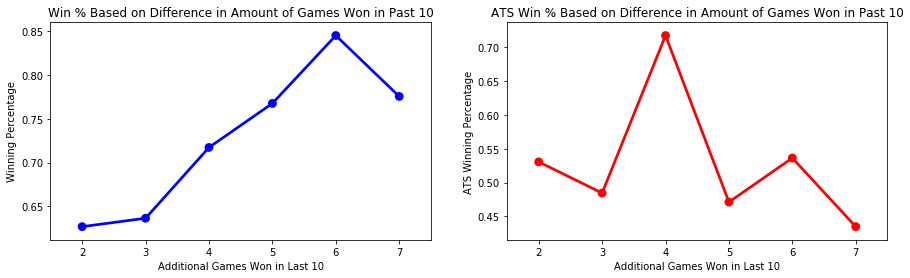

In [131]:
#winning percentage of teams vs opponent based on differences in last 10 game performances

#if a team has 2 more wins in their last 10 games than in their opponent's last 10 games 
dflt2 = df[df['Win_%_Last10'] - df['O_Win_%_Last10'] == .2]
dflt2w = dflt2.win.sum()
dflt2p = dflt2w / len(dflt2)

#if a team has 3 more wins in their last 10 games than in their opponent's last 10 games 
dflt3 = df[df['Win_%_Last10'] - df['O_Win_%_Last10'] == .3]
dflt3w = dflt3.win.sum()
dflt3p = dflt3w / len(dflt3)

#if a team has 4 more wins in their last 10 games than in their opponent's last 10 games 
dflt4 = df[df['Win_%_Last10'] - df['O_Win_%_Last10'] == .4]
dflt4w = dflt4.win.sum()
dflt4p = dflt4w / len(dflt4)

#if a team has 5 more wins in their last 10 games than in their opponent's last 10 games 
dflt5 = df[df['Win_%_Last10'] - df['O_Win_%_Last10'] == .5]
dflt5w = dflt5.win.sum()
dflt5p = dflt5w / len(dflt5)

#if a team has 6 more wins in their last 10 games than in their opponent's last 10 games 
dflt6 = df[df['Win_%_Last10'] - df['O_Win_%_Last10'] == .6]
dflt6w = dflt6.win.sum()
dflt6p = dflt6w / len(dflt6)

#if a team has 7 more wins in their last 10 games than in their opponent's last 10 games 
dflt7 = df[df['Win_%_Last10'] - df['O_Win_%_Last10'] == .7]
dflt7w = dflt7.win.sum()
dflt7p = dflt7w / len(dflt7)

#ATS winning percentage of teams vs opponent based on differences in last 10 game performances
#if a team has 2 more wins in their last 10 games than in their opponent's last 10 games 
dflt2 = df_noties[df_noties['Win_%_Last10'] - df_noties['O_Win_%_Last10'] == .2]
dflt2w = dflt2.sr_win.sum()
dflt2pa = dflt2w / len(dflt2)

#if a team has 3 more wins in their last 10 games than in their opponent's last 10 games 
dflt3 = df_noties[df_noties['Win_%_Last10'] - df_noties['O_Win_%_Last10'] == .3]
dflt3w = dflt3.sr_win.sum()
dflt3pa = dflt3w / len(dflt3)

#if a team has 4 more wins in their last 10 games than in their opponent's last 10 games 
dflt4 = df_noties[df_noties['Win_%_Last10'] - df_noties['O_Win_%_Last10'] == .4]
dflt4w = dflt4.sr_win.sum()
dflt4pa = dflt4w / len(dflt4)

#if a team has 5 more wins in their last 10 games than in their opponent's last 10 games 
dflt5 = df_noties[df_noties['Win_%_Last10'] - df_noties['O_Win_%_Last10'] == .5]
dflt5w = dflt5.sr_win.sum()
dflt5pa = dflt5w / len(dflt5)

#if a team has 6 more wins in their last 10 games than in their opponent's last 10 games 
dflt6 = df_noties[df_noties['Win_%_Last10'] - df_noties['O_Win_%_Last10'] == .6]
dflt6w = dflt6.sr_win.sum()
dflt6pa = dflt6w / len(dflt6)

#if a team has 7 more wins in their last 10 games than in their opponent's last 10 games 
dflt7 = df_noties[df_noties['Win_%_Last10'] - df_noties['O_Win_%_Last10'] == .7]
dflt7w = dflt7.sr_win.sum()
dflt7pa = dflt7w / len(dflt7)

#create lists and append data
ten_game_diff, ten_game_diff_ats = [],[]

ten_game_diff.append(dflt2p),ten_game_diff.append(dflt3p),ten_game_diff.append(dflt4p),ten_game_diff.append(dflt5p),\
ten_game_diff.append(dflt6p),ten_game_diff.append(dflt7p)
ten_game_diff_ats.append(dflt2pa),ten_game_diff_ats.append(dflt3pa),ten_game_diff_ats.append(dflt4p),\
ten_game_diff_ats.append(dflt5pa),ten_game_diff_ats.append(dflt6pa),ten_game_diff_ats.append(dflt7pa)

#plot
diff10 = {'Additional Games Won in Last 10':np.arange(2,8),'Winning Percentage':ten_game_diff}
diff10 = pd.DataFrame(diff10)
diff10ats = {'Additional Games Won in Last 10':np.arange(2,8),'ATS Winning Percentage':ten_game_diff_ats}
diff10ats = pd.DataFrame(diff10ats)
fig = plt.figure(figsize=(15, 4))
axes = fig.add_subplot(1, 2, 1)
sns.pointplot(data=diff10, x='Additional Games Won in Last 10', y='Winning Percentage',ax=axes, color ='b')
axes.set(title="Win % Based on Difference in Amount of Games Won in Past 10")
axes = fig.add_subplot(1, 2, 2)
sns.pointplot(data=diff10ats, x='Additional Games Won in Last 10', y='ATS Winning Percentage',ax=axes, color ='r')
axes.set(title="ATS Win % Based on Difference in Amount of Games Won in Past 10")

The graph on winning percentage increases greatly based on team's previous 10 game winning percentages. This makes sense, as teams that are hot should win often against struggling ones. But, these results are extreme and do look valuable in predicting winners. The same cannot be said about ATS performances, as this graph varies greatly. A team's recent bulk of work is likely a factor in the line of the game, and is not a good variable to include when making a bet on the spread. A deeper analysis on this could prove important based on other variables within this trend such as if a team is an underdog or on the road. It could be that if a team has done well recently is playing a team that hasn't but is still an underdog could be a worthwhile gamble. Of course this does not tell us everything about how a team is actually performing recently, as it doesn't give us insight on the type of competition they have faced, their stats, or their point margins in these games. But it is a measure of how team's with varying degrees of most recent performance compete against one another, and it appears to have strong correlation based on the left graph.

The analysis performed in this section has given us insight as to what are some critical factors and what are not as significant in trying to predict the winner of a game just based off of solely these trends. These visualizations have provided an understanding of how different types of winning percentages and metrics that are important in the scope of gambling are related with one another and when certain team win specific games. We have seen how variables such as a team’s rest, their current steaks, and their given spread can help influence prediction, and when analyzed the correct way could be beneficial information for bettors to know. There have also been false predictors that may seem important but are not as significant as we may have previously thought such as where a team is playing and if they are facing the same opponent in a row.

## IV. Exploratory Data Analysis - Inferential Statistics & Machine Learning

First let's test out models that can predict the value of a win or a loss based on the statistics of that current game. This would not have any value for future games since it is using the statistics that take place in those games to predict wins, but would tell us which statistics are most and least important in terms of teams accumulating in order to win, and we can compare it with future models based on statistics known before the games start and see if the most important stats are similar. 

In [132]:
#list variables to check correlations
predictors = ['win', 'FGM', 'FGA', 'FG%','3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB','REB', 'AST',\
'STL', 'BLK', 'TO', 'PF']
X = df[predictors]
X.describe()

,win,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,REB,AST,STL,BLK,TO,PF
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,0.500000,38.602439,84.902439,0.455689,9.126829,25.623679,0.354321,17.32063,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,0.500025,5.029992,7.130043,0.054711,3.598084,7.102501,0.097782,6.00262,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,0.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,1.00000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,0.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.290000,13.00000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,0.500000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,17.00000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,1.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,21.00000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,1.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,44.00000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


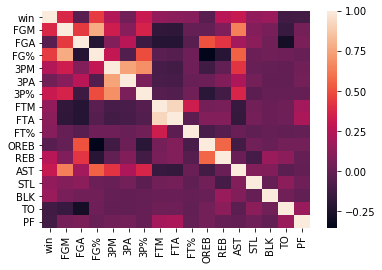

In [133]:
#create heatmap
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [134]:
#configure correlation matrix
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,win,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,REB,AST,STL,BLK,TO,PF
win,1,0.38,-0.042,0.45,0.24,0.033,0.32,0.14,0.11,0.11,-0.04,0.26,0.31,0.14,0.17,-0.12,-0.11
FGM,0.38,1,0.44,0.78,0.33,0.11,0.36,-0.18,-0.19,0.0049,-0.00092,0.08,0.64,0.098,0.062,-0.15,0.051
FGA,-0.042,0.44,1,-0.22,0.092,0.26,-0.14,-0.22,-0.22,-0.037,0.51,0.42,0.2,0.12,0.037,-0.28,0.074
FG%,0.45,0.78,-0.22,1,0.29,-0.066,0.49,-0.036,-0.047,0.031,-0.35,-0.21,0.55,0.021,0.042,0.028,0.0061
3PM,0.24,0.33,0.092,0.29,1,0.75,0.69,-0.099,-0.12,0.028,-0.12,-0.013,0.42,0.0081,-0.0021,-0.0058,0.033
3PA,0.033,0.11,0.26,-0.066,0.75,1,0.068,-0.092,-0.099,0.0072,0.017,0.09,0.23,0.047,-0.0056,-0.012,0.047
3P%,0.32,0.36,-0.14,0.49,0.69,0.068,1,-0.05,-0.066,0.033,-0.2,-0.12,0.37,-0.029,0.00076,0.0051,0.0054
FTM,0.14,-0.18,-0.22,-0.036,-0.099,-0.092,-0.05,1,0.92,0.33,0.052,0.063,-0.15,0.039,0.013,0.023,0.2
FTA,0.11,-0.19,-0.22,-0.047,-0.12,-0.099,-0.066,0.92,1,-0.029,0.092,0.091,-0.17,0.051,0.016,0.028,0.21
FT%,0.11,0.0049,-0.037,0.031,0.028,0.0072,0.033,0.33,-0.029,1,-0.09,-0.05,0.015,-0.018,0.0033,-0.01,0.00027


This correlation matrix represents how all statistical variables are related to one another during a certain game. The top row or leftmost column is of the most importance to us because it shows the relationship between a certain statistic and a win for a team. It appears that the statistics that are most correlated with a win are field goal percentage (FG%), field goals made (FGM), three point percentage (3P%) and assists (AST). These are directly related to scoring and higher marks would determine a more efficient team. The statistics with the smallest correlations are personal fouls (PF) with a negative correlation, free throw attempts (FTA), and (FT%). It is surprising that these free throw related values are seen as the least indicative of a win here, but could be because they just account for one point each opposed to field goals and threes, which are two and three points respectively. 

In [135]:
#set up variables for model
X = df[['FGM', 'FGA', 'FG%','3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',\
'REB', 'AST','STL', 'BLK', 'TO', 'PF']].values   

y = df.win.values

In [136]:
from sklearn.model_selection import train_test_split

#train test split of 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [137]:
from sklearn.tree import DecisionTreeClassifier

#define model
model = DecisionTreeClassifier()

#fit model`
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:
#cross validation function with average score
def cross_validate(X, y, classifier, k_fold, r_state=None) :

    #derive a set of random training and testing indices
    k_fold_indices = KFold(len(X), n_folds=k_fold,
                           shuffle=True, random_state=r_state)

    k_score_total = 0
    
    #for each training and testing slices run the classifier, and score the results
    for train_indices, test_indices in k_fold_indices :

        model = classifier.fit(X[train_indices],
                           y[train_indices])

        k_score = model.score(X[test_indices],
                              y[test_indices])

        k_score_total += k_score

    #return the average accuracy
    return k_score_total/k_fold

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold

#run function using kmeans classifier

cross_validate(X, y, KNeighborsClassifier(3), 10, 0)

/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.7442073170731708

In [140]:
#test different values for k in classifier

for k in range(1,120,5):
    model = KNeighborsClassifier(k, weights='distance')
    print (cross_validate(X, y, model, 10, 0))

0.7085365853658536
0.7652439024390244
0.7842479674796748
0.7877032520325203
0.7919715447154473
0.7936991869918699
0.794410569105691
0.7975609756097561
0.7975609756097561
0.8013211382113822
0.7995934959349593
0.797459349593496
0.7986788617886178
0.7985772357723577
0.7970528455284553
0.7964430894308944
0.7970528455284553
0.7965447154471545
0.7964430894308945
0.7983739837398375
0.7975609756097561
0.7988821138211382
0.798170731707317
0.7986788617886178


In [141]:
#run random forest classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)

In [142]:
#random forest with function
cross_validate(X, y, model, 10, 0)

0.7780487804878048

In [143]:
#create dataframe of feature importance values for random forest
variables = ['FGM', 'FGA', 'FG%','3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',\
'REB', 'AST','STL', 'BLK', 'TO', 'PF']
fi = model.fit(X,y).feature_importances_
fid = {'Features':variables,'Feature Importances':fi}
fid = pd.DataFrame(fid)
fid

,Features,Feature Importances
0,FGM,0.082982
1,FGA,0.047428
2,FG%,0.156638
3,3PM,0.037253
4,3PA,0.036493
5,3P%,0.076196
6,FTM,0.047447
7,FTA,0.041885
8,FT%,0.047895
9,OREB,0.036279


Based on this random forest regression using the same current game statistics for predicting a win as the statistics seen in the correlation matrixes above, the most important features are field goal percentage and rebounds (REB). This is consitent with the correlation matrix as FG% is still the most significant determinant for wins and rebounds was largely significant in both as well compared to the other statistics. 

In [144]:
#train test split of 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [145]:
#random forest
model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [146]:
#creating a dataframe of all the predictions made and actual values of the test data and computing the correct
#percentage of wins calculated
predictions =  model.predict(X_test)
model_preds = pd.DataFrame(list(zip(predictions.tolist(),y_test.tolist())))

right = model_preds[model_preds[1] == model_preds[0]]
pw = len(right) / model_preds.shape[0]

print('Based on this Random Forest Classifier, a win correctly is predicted ' + '{:.2f}'.format(pw * 100)\
+ "% of the time.")

Based on this Random Forest Classifier, a win correctly is predicted 76.73% of the time.


In [147]:
#create confusion matrix of random forest predictions
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predictions)
cf

array([[796, 180],
       [278, 714]])

This confusion matrix shows that the in-game statistics are better at predicting a win rather than a loss. There are more than 100 values of false negative values than false positives, showing it more often incorrectly predicts a loss than a win, with more Type 2 error. 

In [148]:
#configure gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
.fit(X_train, y_train)
clf = clfgtb.score(X_test, y_test)

print('Based on this Gradient Boosting Classifier, a win is correctly predicted ' + '{:.2f}'.format(clf * 100) \
+ "% of the time.")

Based on this Gradient Boosting Classifier, a win is correctly predicted 83.64% of the time.


In [149]:
#create dataframe of feature importance values for gradient boost model
variables = ['FGM', 'FGA', 'FG%','3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',\
'REB', 'AST','STL', 'BLK', 'TO', 'PF']
fi = clfgtb.fit(X,y).feature_importances_
fid = {'Features':variables,'Feature Importances':fi}
fid = pd.DataFrame(fid)
fid

,Features,Feature Importances
0,FGM,0.00
1,FGA,0.13
2,FG%,0.14
3,3PM,0.03
4,3PA,0.03
5,3P%,0.05
6,FTM,0.04
7,FTA,0.02
8,FT%,0.04
9,OREB,0.01


These feature importances vary slightly with those of the Random Forest model. Rebounds and field goal percentage are very significant, but field goals made (FGM) is not, which is surprising since it is highly correlated with FG%. 

In [150]:
#create confusion matrix for gradient boosting classifier
predictions =  clfgtb.predict(X_test)

cf = confusion_matrix(y_test, predictions)
cf

array([[838, 138],
       [163, 829]])

This confusion matrix shows almost equal values of true positives with true negatives and false positives with false negatives. This classifier is very good at predicting wins based on the statistics at hand, with a 83.64% success rate with the gradient boosting classifier. This proves that teams can learn what to focus on in order to win more games just by looking at the statistics alone. This is no big secret in the NBA. 

##### Looking at the average stats of teams to analyze wins

Because we do not know the stats of a game before it happens, we need to analyze how the average statistics of teams can predict performance and which indicators are the best and worst at determining wins. 

In [151]:
#create dataframe df_non1 that drops rows with average stats being null, meaning the first game of the season for 
#that season because there are no active statistics yet
df_non1 = df[pd.notnull(df['A_FGM'])]
avg_predictors = ['win','A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF']
X = df_non1[avg_predictors]

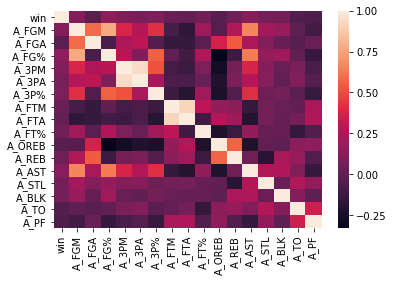

In [152]:
#create heatmap
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [153]:
#configure correlation matrix
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,win,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_REB,A_AST,A_STL,A_BLK,A_TO,A_PF
win,1,0.11,-0.013,0.15,0.1,0.079,0.095,0.033,0.016,0.051,-0.024,0.042,0.12,0.065,0.066,-0.048,-0.055
A_FGM,0.11,1,0.59,0.77,0.38,0.27,0.42,-0.085,-0.16,0.19,-0.032,0.25,0.67,0.21,0.17,-0.0069,-0.092
A_FGA,-0.013,0.59,1,-0.068,0.24,0.29,-0.043,-0.14,-0.14,-0.017,0.37,0.54,0.23,0.11,0.019,-0.028,0.027
A_FG%,0.15,0.77,-0.068,1,0.28,0.098,0.56,0.0025,-0.092,0.25,-0.33,-0.11,0.63,0.16,0.19,0.0072,-0.14
A_3PM,0.1,0.38,0.24,0.28,1,0.94,0.52,-0.086,-0.12,0.092,-0.26,0.063,0.38,0.12,0.027,0.088,-0.073
A_3PA,0.079,0.27,0.29,0.098,0.94,1,0.22,-0.064,-0.069,0.024,-0.21,0.086,0.27,0.12,0.0043,0.11,-0.03
A_3P%,0.095,0.42,-0.043,0.56,0.52,0.22,1,-0.11,-0.19,0.2,-0.24,-0.045,0.41,0.044,0.064,-0.017,-0.13
A_FTM,0.033,-0.085,-0.14,0.0025,-0.086,-0.064,-0.11,1,0.92,0.28,0.17,0.14,-0.14,0.063,0.025,0.0094,0.23
A_FTA,0.016,-0.16,-0.14,-0.092,-0.12,-0.069,-0.19,0.92,1,-0.098,0.26,0.19,-0.2,0.064,0.021,0.068,0.25
A_FT%,0.051,0.19,-0.017,0.25,0.092,0.024,0.2,0.28,-0.098,1,-0.23,-0.13,0.16,0.021,0.022,-0.15,-0.048


This correlation matrix represents how all of the average statistical variables of teams are related to one another throughout a season. The top row or leftmost column is of the most importance to us because it shows the relationship between a certain average statistic and a win for that team. It appears that the statistics that are most correlated with a win are average field goal percentage (A_FG%) and assists per game (A_AST). These are again directly related to scoring and higher marks would determine a more efficient basketball team. The average statistics with the smallest correlations are free throw attempts per game (FTA) and field goal attempts per game (A_FGA). It is possible that the values representing team attempts for a certain type of shot have the least significant because it does not matter how many shots they take, and what is important how many they make and how many the other team make and attempt compared to their totals.

In [154]:
#set up variables for model
X = df_non1[['A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF']].values

y = df_non1.win.values

In [155]:
#train test 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [156]:
#define model
model = DecisionTreeClassifier()
#fit model
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [157]:
cross_validate(X, y, KNeighborsClassifier(3), 10, 0)

0.5606995884773662

In [158]:
#for loop for increasing values of k
for k in range(1,120,5):
    model = KNeighborsClassifier(k, weights='distance')
    print (cross_validate(X, y, model, 10, 0))

0.5460905349794238
0.5695473251028808
0.5834362139917696
0.5897119341563787
0.5917695473251029
0.596604938271605
0.5967078189300411
0.5969135802469135
0.5967078189300411
0.5962962962962963
0.5970164609053498
0.5977366255144033
0.597633744855967
0.5984567901234568
0.5984567901234568
0.5991769547325102
0.5979423868312759
0.5951646090534979
0.5943415637860082
0.5924897119341563
0.592798353909465
0.5933127572016461
0.5940329218106994
0.5969135802469135


In [159]:
#run random forest
model = RandomForestClassifier(random_state=0)
cross_validate(X, y, model, 10, 0)

0.5635802469135803

In [160]:
#create dataframe of feature importance values

variables = ['A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF']
fi = model.fit(X,y).feature_importances_
fid = {'Features':variables,'Feature Importances':fi}
fid = pd.DataFrame(fid)
fid

,Features,Feature Importances
0,A_FGM,0.057957
1,A_FGA,0.061010
2,A_FG%,0.072254
3,A_3PM,0.064213
4,A_3PA,0.059870
5,A_3P%,0.066414
6,A_FTM,0.058434
7,A_FTA,0.057180
8,A_FT%,0.062564
9,A_OREB,0.058054


The feature with most importance here is turnovers per game (A_TO). It is extremely important for teams to keep their turnover counts low in a game because that directly translates to how many times they have possession of the ball and more opportunities to score. It should be noted that this classifier has the feature importances of these values all relatively close to one another.

In [161]:
#train test split of 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [162]:
#random forest
model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [163]:
#creating a dataframe of all the predictions made and actual values of the test data and computing the correct
#percentage of wins calculated
predictions =  model.predict(X_test)
model_preds = pd.DataFrame(list(zip(predictions.tolist(),y_test.tolist())))

right = model_preds[model_preds[1] == model_preds[0]]
pw = len(right) / model_preds.shape[0]

print('Based on this Random Forest Classifier, a win is correctly predicted ' + '{:.1f}'.format(pw * 100) \
+ "% of the time.")

Based on this Random Forest Classifier, a win is correctly predicted 57.4% of the time.


In [164]:
#confusion matrix for random forest
cf = confusion_matrix(y_test, predictions)
cf

array([[601, 360],
       [469, 514]])

Like the other random forest confusion matrix, this model is much better at predicting wins than losses, with many more false negatives than false positive responses.

In [165]:
#configure gradient boost
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
.fit(X_train, y_train)
clf = clfgtb.score(X_test, y_test)

print('Based on this Gradient Boosting Classifier, a win is correctly predicted ' + '{:.2f}'.format(clf * 100) \
+ "% of the time.")

Based on this Gradient Boosting Classifier, a win is correctly predicted 59.26% of the time.


In [166]:
#dataframe of feature importance values
fi = clfgtb.fit(X,y).feature_importances_
fid = {'Features':variables,'Feature Importances':fi}
fid = pd.DataFrame(fid)
fid

,Features,Feature Importances
0,A_FGM,0.04
1,A_FGA,0.06
2,A_FG%,0.11
3,A_3PM,0.05
4,A_3PA,0.06
5,A_3P%,0.07
6,A_FTM,0.01
7,A_FTA,0.06
8,A_FT%,0.06
9,A_OREB,0.11


The features with the most importance here are similarly turnovers, and average field goal percentage and offensive rebounds. 

In [167]:
#confusion matrix of GB classifier
predictions =  clfgtb.predict(X_test)

cf = confusion_matrix(y_test, predictions)
cf

array([[619, 342],
       [392, 591]])

Like with the previous confusion matrixes, the Graident Boost Classifer is more precise than the Random Forest models. But this one is not as precise as representing in game stats, and is noticably better at predicting wins better than losses as well.

Based on a team's average statistics throughout the season, the K Nearest Neighbors Classifier performed best with a larger amount of neighbors, with 80 having the greatest K score. However none of these models performed particularly well.

Average stats of a team are not the only important statistical feature in a game, as they are playing an opponent who also has strengths and weaknesses in certain statistical areas. It could be important to see which statistical relationships between teams and opponents are significant in terms of winninf games.

In [168]:
#Is there a significant relationship to a team winning when they have a higher season average field goal percentage
#than their opponent?

#creating dataframe column of average field goal percentage of opponent

#home team avg fg% against
dfg3 = df.sort_values(by = ['Date','Season'])
dfg3 = dfg3.reset_index()
df2g = dfg3.copy()
df2g.index = df2g.index - 1
df_gop = dfg3.join(df2g, lsuffix = 'opp1')

#road team avg fg% against
dfg2 = df.sort_values(by = ['Date','Season'])
dfg2 = dfg2.reset_index()
df1g = dfg2.copy()
df1g.index = df1g.index + 1
df_gopp = dfg2.join(df1g, lsuffix = 'opp')

df['A_FG%_H_3'] = df_gop['A_FG%']
df['A_FG%_A_4'] = df_gopp['A_FG%']

df['A_FG%_O'] = df.apply(lambda x: x[-1] if x[4] == 'Away' else x[-2], axis = 1)

In [169]:
df_fgg = df[df['A_FG%'] > df['A_FG%_O']]

df_fggw = df_fgg[df_fgg.win == 1]
df_fggp = len(df_fggw) / len(df_fgg)
print('Teams with a higher average field goal percentage compared to their opponent up to that point in the season\
 have won at a ' + '{:.2f}'.format(df_fggp * 100) + '% rate.')

Teams with a higher average field goal percentage compared to their opponent up to that point in the season have won at a 59.79% rate.


#### Null hypothesis: There is no significant relationship between having a higher average field goal percentage and winning
#### Alternative hypothesis:  There is a significant relationship between average field goal percentage and winning


In [170]:
import scipy.stats as stats
#conduct one sample ttest

stats.ttest_1samp(df_fgg.win.tolist(),np.mean(df.win.tolist()))

Ttest_1sampResult(statistic=13.903051918643442, pvalue=4.0362161127095995e-43)

Based on these values and our p-value of close to zero, we reject the null hypothesis that having a higher average field goal percentage than your opponent is not significant towards winning. Logistically this makes sense as teams that shoot better compared to their opponent would be thought to having an advantage.

In [171]:
#Is there a significant relationship to a team winning when they average more offensive rebounds per game 
#than their opponent?

#creating dataframe column of average offensive rebounds per game of opponent

#home team avg assists against
dfg3 = df.sort_values(by = ['Date','Season'])
dfg3 = dfg3.reset_index()
df2g = dfg3.copy()
df2g.index = df2g.index - 1
df_gop = dfg3.join(df2g, lsuffix = 'o')

#road team avg assists against
dfg2 = df.sort_values(by = ['Date','Season'])
dfg2 = dfg2.reset_index()
df1g = dfg2.copy()
df1g.index = df1g.index + 1
df_gopp = dfg2.join(df1g, lsuffix = 'o2')

df['A_OREB_H'] = df_gop['A_OREB']
df['A_OREB_A'] = df_gopp['A_OREB']

df['A_OREB_O'] = df.apply(lambda x: x[-1] if x[4] == 'Away' else x[-2], axis = 1)

In [172]:
df_fgg = df[df['A_OREB'] > df['A_OREB_O']]

df_fggw = df_fgg[df_fgg.win == 1]
df_fggp = len(df_fggw) / len(df_fgg)
print('Teams that average more offensive rebounds per game compared to their opponent up to that point in the season\
 have won at a ' + '{:.2f}'.format(df_fggp * 100) + '% rate.')

Teams that average more offensive rebounds per game compared to their opponent up to that point in the season have won at a 47.95% rate.


#### Null hypothesis: There is no significant relationship between averaging more offensive rebounds per game and winning
#### Alternative hypothesis: There is a significant relationship between averaging more offensive rebounds per game and winning

In [173]:
#conduct one sample ttest

stats.ttest_1samp(df_fgg.win.tolist(),np.mean(df.win.tolist()))

Ttest_1sampResult(statistic=-2.8510962776697903, pvalue=0.004375360137271079)

Based on these values and our p-value of .004, we can not reject the null hypothesis that averaging more offensive rebounds than your opponent is not significant towards winning. This makes sense as teams that average more offensive rebounds coming in compared to their opponent only win 47.95% of the time. This could be because they are getting more offensive rebounds since they don't shoot as well as other teams and miss more shots.

##### Next we can look at how models using average stats and values for which team is playing impact the models.

In [174]:
#adding dummy variable data columns that represent if a certain team is playing that game
for team in team_list:
    df[team] = df.apply(lambda x: 1 if x[3] == team else 0, axis =1)

In [175]:
#average stats with included dummy variables for which team is playing

#defining df_non1 again to include new data columns
df_non1 = df[pd.notnull(df['A_FGM'])]

X = df_non1[['A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF','NOP','ORL','SAS','DAL','LAL','HOU','CHO','MIL','IND','PHI','BOS','BRK',\
'MIA','WAS','TOR','ATL','MEM','MIN','NYK','CHI','DEN','DET','UTA','PHO','SAC','GSW','POR','OKC', 'CLE','LAC']].values   

y = df_non1.win.values

In [176]:
cross_validate(X, y, KNeighborsClassifier(3), 10, 0)

0.561522633744856

In [177]:
for k in range(1,120,5):
    model = KNeighborsClassifier(k, weights='distance')
    print (cross_validate(X, y, model, 10, 0))

0.5465020576131688
0.5703703703703704
0.5824074074074075
0.5894032921810699
0.59320987654321
0.5980452674897119
0.5969135802469135
0.5977366255144032
0.5982510288065843
0.5984567901234568
0.5974279835390945
0.5987654320987655
0.5983539094650205
0.5995884773662551
0.5992798353909465
0.5981481481481483
0.5976337448559671
0.5967078189300412
0.5952674897119341
0.5948559670781893
0.5949588477366256
0.5977366255144033
0.5966049382716049
0.5979423868312758


In [178]:
model = RandomForestClassifier(random_state=0)
cross_validate(X, y, model, 10, 0)

0.5616255144032921

In [179]:
#create dataframe of feature importance values

variables = ['A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF','NOP','ORL','SAS','DAL','LAL','HOU','CHO','MIL','IND','PHI','BOS','BRK',\
'MIA','WAS','TOR','ATL','MEM','MIN','NYK','CHI','DEN','DET','UTA','PHO','SAC','GSW','POR','OKC', 'CLE','LAC',]
fi = model.fit(X,y).feature_importances_
fid = {'Features':variables,'Feature Importances':fi}
fid = pd.DataFrame(fid)
print(fid[0:16])
print(fid[17:])

   Features  Feature Importances
0     A_FGM             0.057297
1     A_FGA             0.057069
2     A_FG%             0.070428
3     A_3PM             0.058015
4     A_3PA             0.064824
5     A_3P%             0.059600
6     A_FTM             0.059013
7     A_FTA             0.057485
8     A_FT%             0.060466
9    A_OREB             0.060467
10    A_REB             0.057661
11    A_AST             0.058381
12    A_STL             0.058014
13    A_BLK             0.060528
14     A_TO             0.060843
15     A_PF             0.057569
   Features  Feature Importances
17      ORL             0.002109
18      SAS             0.002115
19      DAL             0.000869
20      LAL             0.002528
21      HOU             0.002293
22      CHO             0.000458
23      MIL             0.001335
24      IND             0.001547
25      PHI             0.002093
26      BOS             0.002137
27      BRK             0.001703
28      MIA             0.000872
29      WA

A pattern we are starting to see is that field goal percentage is consistently one of or the most important determinant in predicting a win. The teams that showed the most significance is terms of who is playing were the Lakers (LAL), Celtics (BOS), and Warriors (GSW). The Celtics and Warriors consistently play very good while the Lakers had been very bad.

In [180]:
#80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [181]:
model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [182]:
#dataframe of all predictions of random forest
predictions =  model.predict(X_test)
model_preds = pd.DataFrame(list(zip(predictions.tolist(),y_test.tolist())))

right = model_preds[model_preds[1] == model_preds[0]]
pw = len(right) / model_preds.shape[0]

print('Based on this Random Forest Classifier, a win is correctly predicted ' + '{:.2f}'.format(pw * 100) \
+ "% of the time.")

Based on this Random Forest Classifier, a win is correctly predicted 56.94% of the time.


In [183]:
#set up GB classifier
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
.fit(X_train, y_train)
clf = clfgtb.score(X_test, y_test)

print('Based on this Gradient Boosting Classifier, a win is correctly predicted ' + '{:.2f}'.format(clf * 100) \
+ "% of the time.")

Based on this Gradient Boosting Classifier, a win is correctly predicted 60.08% of the time.


Of these models, the K Nearest Neighbors scores are very similar, the Gradiest Boosting Classifier increased while the Random Forest decreased. It is difficult to tell if adding the team information improved forecasting. But, another natural step here would be to account for which team is playing who as well.

#### In addition to which team is playing, we can assign values for who the opponent of the game is as well to factor in their average statistics on the season.

In [184]:
#adding dummy variable data columns that represent if a certain opponent is playing that game

#creating list of opponents to differentiate from team_list
opponent_list = ['NOP_O','ORL_O','SAS_O','DAL_O','LAL_O','CHO_O','MIL_O','IND_O','PHI_O','BOS_O','BRK_O','MIA_O',\
'WAS_O','TOR_O','ATL_O','MEM_O','MIN_O','NYK_O','CHI_O','DEN_O','DET_O','UTA_O','PHO_O','SAC_O','GSW_O',\
'POR_O','OKC_O', 'CLE_O','LAC_O']

for opponent in opponent_list:
    df[opponent] = df.apply(lambda x: 1 if x[5] == opponent[:3] else 0, axis =1)

In [185]:
#average stats with included dummy variables for which opponent is playing as well as which team

#defining df_non1 again to include new data columns
df_non1 = df[pd.notnull(df['A_FGM'])]

X = df_non1[['A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF','NOP','ORL','SAS','DAL','LAL','HOU','CHO','MIL','IND','PHI','BOS','BRK',\
'MIA','WAS','TOR','ATL','MEM','MIN','NYK','CHI','DEN','DET','UTA','PHO','SAC','GSW','POR','OKC', 'CLE','LAC',\
'NOP_O','ORL_O','SAS_O','DAL_O','LAL_O','CHO_O','MIL_O','IND_O','PHI_O','BOS_O','BRK_O','MIA_O',\
'WAS_O','TOR_O','ATL_O','MEM_O','MIN_O','NYK_O','CHI_O','DEN_O','DET_O','UTA_O','PHO_O','SAC_O','GSW_O',\
'POR_O','OKC_O', 'CLE_O','LAC_O']].values   

y = df_non1.win.values

In [186]:
cross_validate(X, y, KNeighborsClassifier(3), 10, 0)

0.5652263374485595

In [187]:
for k in range(1,120,5):
    model = KNeighborsClassifier(k, weights='distance')
    print (cross_validate(X, y, model, 10, 0))

0.5556584362139917
0.573559670781893
0.5900205761316872
0.5988683127572016
0.5993827160493828
0.6056584362139917
0.6013374485596708
0.601440329218107
0.6009259259259259
0.5997942386831276
0.6004115226337449
0.6024691358024692
0.6022633744855967
0.6037037037037037
0.6048353909465021
0.6048353909465021
0.6049382716049383
0.6029835390946502
0.6022633744855966
0.6009259259259259
0.6018518518518519
0.6028806584362141
0.6024691358024692
0.6002057613168723


In [188]:
model = RandomForestClassifier(random_state=0)
cross_validate(X, y, model, 10, 0)

0.5862139917695474

In [189]:
variables = ['A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF','NOP','ORL','SAS','DAL','LAL','HOU','CHO','MIL','IND','PHI','BOS','BRK',\
'MIA','WAS','TOR','ATL','MEM','MIN','NYK','CHI','DEN','DET','UTA','PHO','SAC','GSW','POR','OKC', 'CLE','LAC',\
'NOP_O','ORL_O','SAS_O','DAL_O','LAL_O','CHO_O','MIL_O','IND_O','PHI_O','BOS_O','BRK_O','MIA_O',\
'WAS_O','TOR_O','ATL_O','MEM_O','MIN_O','NYK_O','CHI_O','DEN_O','DET_O','UTA_O','PHO_O','SAC_O','GSW_O',\
'POR_O','OKC_O', 'CLE_O','LAC_O']
fi = model.fit(X,y).feature_importances_
fid = {'Features':variables,'Feature Importances':fi}
fid = pd.DataFrame(fid)
print(fid[0:16])
print(fid[16:46])
print(fid[46:])

   Features  Feature Importances
0     A_FGM             0.050978
1     A_FGA             0.052253
2     A_FG%             0.060129
3     A_3PM             0.046490
4     A_3PA             0.051531
5     A_3P%             0.053556
6     A_FTM             0.053457
7     A_FTA             0.051056
8     A_FT%             0.046803
9    A_OREB             0.047707
10    A_REB             0.053213
11    A_AST             0.053224
12    A_STL             0.051156
13    A_BLK             0.054922
14     A_TO             0.055082
15     A_PF             0.049869
   Features  Feature Importances
16      NOP             0.001141
17      ORL             0.001363
18      SAS             0.002037
19      DAL             0.000916
20      LAL             0.002553
21      HOU             0.002029
22      CHO             0.000387
23      MIL             0.001245
24      IND             0.001842
25      PHI             0.002954
26      BOS             0.001556
27      BRK             0.001350
28      MI

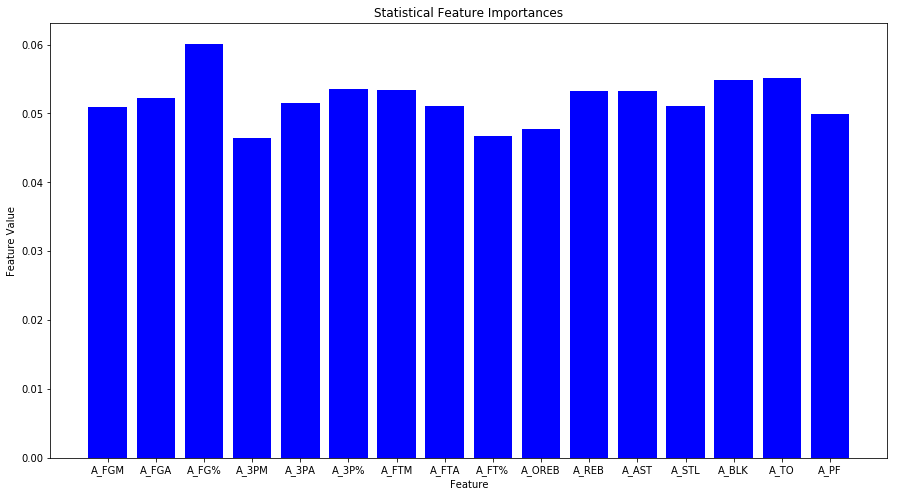

In [190]:
#plot the statistical feature importances of the random forest 
plt.figure(figsize = (15,8))
plt.title("Statistical Feature Importances")
plt.bar(variables[0:16], fi[0:16],  color = "b")
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

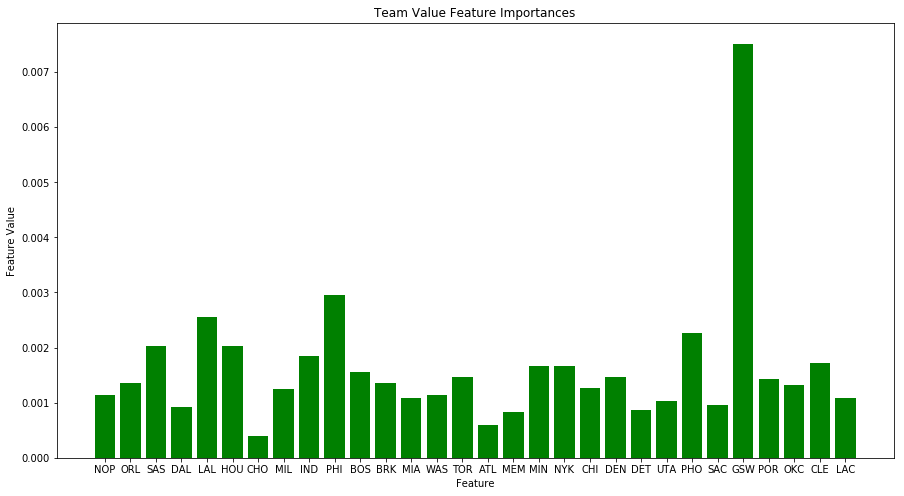

In [191]:
#plot the statistical feature importances of the random forest 
plt.figure(figsize = (15,8))
plt.title("Team Value Feature Importances")
plt.bar(variables[16:46], fi[16:46],  color = "g")
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

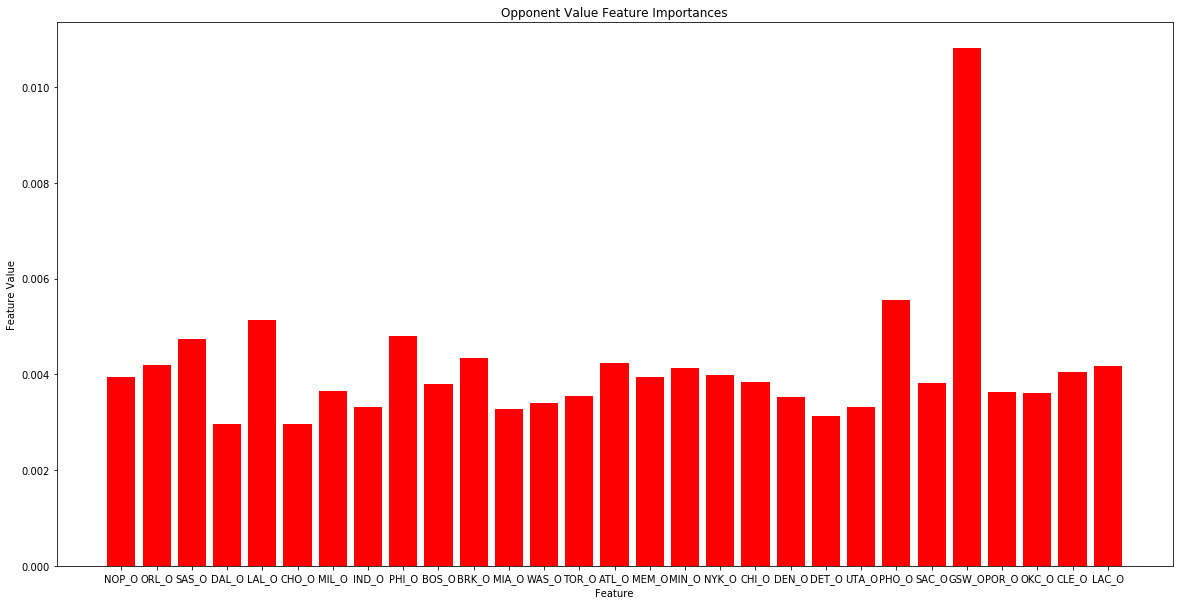

In [192]:
#plot the statistical feature importances of the random forest 
plt.figure(figsize = (20,10))
plt.title("Opponent Value Feature Importances")
plt.bar(variables[46:], fi[46:],  color = "r")
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

The Warriors (GSW) have by far highest feature importance for a team and when playing as an opponent. This is likely because their statistics diverge most from other teams because of their record scoring production, along with winning among the most games in the NBA each year it is easier to predict when the Warriors are going to win than it is for other teams. On average the  opponent's feature importance has more value than which team is playing. This is interesting and shows the stats on their own are not very telling of who will win, but combining that information with how others teams perform vs similar teams with those statistical trends yields a more accurate predictive model. 

In [193]:
#80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [194]:
model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [195]:
predictions =  model.predict(X_test)
model_preds = pd.DataFrame(list(zip(predictions.tolist(),y_test.tolist())))

right = model_preds[model_preds[1] == model_preds[0]]
pw = len(right) / model_preds.shape[0]

print('Based on this Random Forest Classifier, a win is correctly predicted correctly ' + '{:.2f}'.format(pw * 100) \
+ "% of the time.")

Based on this Random Forest Classifier, a win is correctly predicted correctly 57.46% of the time.


In [196]:
#confusion matrix for RF
cf = confusion_matrix(y_test, predictions)
cf

array([[623, 338],
       [489, 494]])

Again this matrix shows the classifier is more accurate in predicting wins, leading to higher Type 2 error. 

In [197]:
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
.fit(X_train, y_train)
clf = clfgtb.score(X_test, y_test)

print('Based on this Gradient Boosting Classifier, a win is correctly predicted ' + '{:.2f}'.format(clf * 100) \
+ "% of the time.")

Based on this Gradient Boosting Classifier, a win is correctly predicted 62.86% of the time.


In [198]:
#confusion matrix for GBC
predictions =  clfgtb.predict(X_test)

cf = confusion_matrix(y_test, predictions)
cf

array([[592, 369],
       [353, 630]])

This is the first matrix showing more losses predicted correctly than wins, with more Type 1 error than Type 2. Although it is not a dramatic differene. This evening out has led to the best predicitve model thus far.

Based on these scores, the gradient boosting classifier with values for the team and opponent is the best calculated yet using a team's average statistics. Still, this score of just under 63% is not a great predictor. Next we'll look at the same model, but adding the value that represents if a team is playing at home or away.

In [199]:
#adding home dummy variable
X = df_non1[['home','A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF','NOP','ORL','SAS','DAL','LAL','HOU','CHO','MIL','IND','PHI','BOS','BRK',\
'MIA','WAS','TOR','ATL','MEM','MIN','NYK','CHI','DEN','DET','UTA','PHO','SAC','GSW','POR','OKC', 'CLE','LAC',\
'NOP_O','ORL_O','SAS_O','DAL_O','LAL_O','CHO_O','MIL_O','IND_O','PHI_O','BOS_O','BRK_O','MIA_O',\
'WAS_O','TOR_O','ATL_O','MEM_O','MIN_O','NYK_O','CHI_O','DEN_O','DET_O','UTA_O','PHO_O','SAC_O','GSW_O',\
'POR_O','OKC_O', 'CLE_O','LAC_O']].values   

y = df_non1.win.values

In [200]:
#80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [201]:
model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [202]:
predictions =  model.predict(X_test)
model_preds = pd.DataFrame(list(zip(predictions.tolist(),y_test.tolist())))

right = model_preds[model_preds[1] == model_preds[0]]
pw = len(right) / model_preds.shape[0]

print('Based on this Random Forest Classifier, a win is correctly predicted correctly ' + '{:.2f}'.format(pw * 100) \
+ "% of the time.")

Based on this Random Forest Classifier, a win is correctly predicted correctly 57.56% of the time.


In [203]:
#confusion matrix for RF
cf = confusion_matrix(y_test, predictions)
cf

array([[634, 327],
       [498, 485]])

This confusion matrix is consistent with the others for Random Forest Classification. Wins are predicted more accurately than losses leading to more Type 2 error.

In [204]:
#configure GBC
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
.fit(X_train, y_train)
clf = clfgtb.score(X_test, y_test)

print('Based on this Gradient Boosting Classifier, a win is correctly predicted ' + '{:.2f}'.format(clf * 100) \
+ "% of the time.")

Based on this Gradient Boosting Classifier, a win is correctly predicted 65.28% of the time.


In [205]:
#confusion matrix for GBC
predictions =  clfgtb.predict(X_test)

cf = confusion_matrix(y_test, predictions)
cf

array([[620, 341],
       [334, 649]])

This matrix shows very consitent predictions, which is in line with the highest score of 65.28% correctly predicted yet. There are almost as many false negative values made as false positives. 

We can also break the season down into sections to see if the statistics being used have more value later or earlier in the year. This will provide enough time for a team's stats to average out to close to their true values at the end of the year. A good place to separate games is at the All-Star Break. This analysis will only look at the games after the break, using the average stats from the team's full season up to that point. 

In [206]:
#creating df with only values of games after the all-star break so the average stats are more indicative of a team's
#season-long performance
df_pab = df[(df.AS == 'After')]
X = df_pab[['home','A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF','NOP','ORL','SAS','DAL','LAL','HOU','CHO','MIL','IND','PHI','BOS','BRK',\
'MIA','WAS','TOR','ATL','MEM','MIN','NYK','CHI','DEN','DET','UTA','PHO','SAC','GSW','POR','OKC', 'CLE','LAC',\
'NOP_O','ORL_O','SAS_O','DAL_O','LAL_O','CHO_O','MIL_O','IND_O','PHI_O','BOS_O','BRK_O','MIA_O',\
'WAS_O','TOR_O','ATL_O','MEM_O','MIN_O','NYK_O','CHI_O','DEN_O','DET_O','UTA_O','PHO_O','SAC_O','GSW_O',\
'POR_O','OKC_O', 'CLE_O','LAC_O']].values   

y = df_pab.win.values

In [207]:
#80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [208]:
#random forest
model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [209]:
predictions =  model.predict(X_test)
model_preds = pd.DataFrame(list(zip(predictions.tolist(),y_test.tolist())))
model_preds

right = model_preds[model_preds[1] == model_preds[0]]
pw = len(right) / model_preds.shape[0]

print('Based on this Random Forest Classifier, a win is correctly predicted correctly ' + '{:.2f}'.format(pw * 100) \
+ "% of the time.")

Based on this Random Forest Classifier, a win is correctly predicted correctly 59.88% of the time.


In [210]:
#gbc
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
.fit(X_train, y_train)
clf = clfgtb.score(X_test, y_test)

print('Based on this Gradient Boosting Classifier, a win is correctly predicted ' + '{:.2f}'.format(clf * 100) \
+ "% of the time.")

Based on this Gradient Boosting Classifier, a win is correctly predicted 62.99% of the time.


The Random Forest Regression score is marginally better, and the gradient boosting classifer score is much worse than before. This is likely from a loss of a significant amount of game data, showing average stats in the beginning of year could be just as important as to how they average out later on. The next analysis will take a similar approach, eliminating a team's first ten games played in the season from the model. 

In [211]:
#looking at all games besides the first 10 in a season for a team

df_72 = df[pd.notnull(df['Win_%_Last10'])]
X = df_72[['home','A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO', 'A_PF','NOP','ORL','SAS','DAL','LAL','HOU','CHO','MIL','IND','PHI','BOS','BRK',\
'MIA','WAS','TOR','ATL','MEM','MIN','NYK','CHI','DEN','DET','UTA','PHO','SAC','GSW','POR','OKC', 'CLE','LAC',\
'NOP_O','ORL_O','SAS_O','DAL_O','LAL_O','CHO_O','MIL_O','IND_O','PHI_O','BOS_O','BRK_O','MIA_O',\
'WAS_O','TOR_O','ATL_O','MEM_O','MIN_O','NYK_O','CHI_O','DEN_O','DET_O','UTA_O','PHO_O','SAC_O','GSW_O',\
'POR_O','OKC_O', 'CLE_O','LAC_O']].values   

y = df_72.win.values

In [212]:
#80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [213]:
#configure random forest model
model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [214]:
predictions =  model.predict(X_test)
model_preds = pd.DataFrame(list(zip(predictions.tolist(),y_test.tolist())))
model_preds

right = model_preds[model_preds[1] == model_preds[0]]
pw = len(right) / model_preds.shape[0]

print('Based on this Random Forest Classifier, a win is correctly predicted correctly ' + '{:.2f}'.format(pw * 100) \
+ "% of the time.")

Based on this Random Forest Classifier, a win is correctly predicted correctly 59.95% of the time.


In [215]:
#configure gradient boost model

clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
.fit(X_train, y_train)
clf = clfgtb.score(X_test, y_test)

print('Based on this Gradient Boosting Classifier, a win is correctly predicted ' + '{:.2f}'.format(clf * 100) \
+ "% of the time.")

Based on this Gradient Boosting Classifier, a win is correctly predicted 64.35% of the time.


Comparing these values to the previous models with just post All-Star Break data, the Random Forest did worse but the Gradient Booster performed better. However, both these values are worse than complete season data, reconfirming the belief that taking away any game data for a season hurts the model.

The next analysis shows an improvement in the model by altering the average statistics chosen. Here, only average personal fouls per game (A_PF) was removed. This was the only statistic that when removed improved the model's performance. The other iterations are not shown, but other combinations of taking one or groups of average statistical values were performed and they all lessened the prediction rates. This is in line what we have seen in the correlation matrixes and feature importance analyses where personal fouls were not significant in determing a team's win. 

In [216]:
#altering the stats.
#taking out personal fouls
X = df_non1[['home','A_FGM', 'A_FGA', 'A_FG%','A_3PM', 'A_3PA', 'A_3P%', 'A_FTM', 'A_FTA', 'A_FT%', 'A_OREB','A_REB',\
'A_AST','A_STL', 'A_BLK', 'A_TO','NOP','ORL','SAS','DAL','LAL','HOU','CHO','MIL','IND','PHI','BOS','BRK',\
'MIA','WAS','TOR','ATL','MEM','MIN','NYK','CHI','DEN','DET','UTA','PHO','SAC','GSW','POR','OKC', 'CLE','LAC',\
'NOP_O','ORL_O','SAS_O','DAL_O','LAL_O','CHO_O','MIL_O','IND_O','PHI_O','BOS_O','BRK_O','MIA_O',\
'WAS_O','TOR_O','ATL_O','MEM_O','MIN_O','NYK_O','CHI_O','DEN_O','DET_O','UTA_O','PHO_O','SAC_O','GSW_O',\
'POR_O','OKC_O', 'CLE_O','LAC_O']].values   

y = df_non1.win.values

In [217]:
#80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [218]:
#random forest
model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [219]:
predictions =  model.predict(X_test)
model_preds = pd.DataFrame(list(zip(predictions.tolist(),y_test.tolist())))
model_preds

right = model_preds[model_preds[1] == model_preds[0]]
pw = len(right) / model_preds.shape[0]

print('Based on this Random Forest Classifier, a win is correctly predicted correctly ' + '{:.2f}'.format(pw * 100) \
+ "% of the time.")

Based on this Random Forest Classifier, a win is correctly predicted correctly 59.36% of the time.


In [220]:
#CF for RF model
cf = confusion_matrix(y_test, predictions)
cf

array([[615, 346],
       [444, 539]])

This matrix shows a major problem with this regressor, as it had almost as many false negatives as true negatives. Although it had strong performance in predicting wins, it was not a great overall model.

In [221]:
#GBC
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
.fit(X_train, y_train)
clf = clfgtb.score(X_test, y_test)

print('Based on this Gradient Boosting Classifier, a win is correctly predicted ' + '{:.2f}'.format(clf * 100) \
+ "% of the time.")

Based on this Gradient Boosting Classifier, a win is correctly predicted 65.38% of the time.


In [222]:
#CF for GBC
predictions =  clfgtb.predict(X_test)

cf = confusion_matrix(y_test, predictions)
cf

array([[622, 339],
       [334, 649]])

This confusion matrix is similar to what we have viewed with others using a Gradient Boosting Classifier with consistent values for true positives with true negatives and false positives with false negatives. The higher totals of correct predictions lead it to being the most accurate model overall.

This is the best model calculated thus far with almost a 66% success rate. Personal fouls do not have any predictive measure in choosing a winner and negatively impact predicting wins when including them. This is likely because the number of fouls a team makes may not necessarily hurt them during a game, and it can be beneficial to foul more often depending on how a game is going, sending players to the free throw line who don't shoot well instead of giving them easy baskets.

# Conclusion

There are so many variables that do and do not factor into an NBA team winning a game on any given day. When looking at the context of a whole season, it can be even more difficult to find what trends matter and which would be foolish to follow. However, this analysis has shown that are some definitive factors that more often than not have predicitve value. Although this is valuable, you can't say that it necessarily is for every game, which could be problematic for someone actually trying to wager on games. This analysis is just the tip of the iceberg in looking at predicting the outcome of an NBA game. Despite just looking at the four most recent full regular seasons, basketball has a myriad of more advanced stats that can be analyzed and have been proven to show importance in evaluating player and game data. The statistics used here are just some of the most fundamental ones applied in basketball, and do not even take into account individual player statistics. There are also many qualitative variables that come into play that you can't just stick a data figure too. Coaching, team chemistry, and simple things such as how a star player is feeling that day all can have a major impact on a game, so going by the numbers is not always an exact science.

In summation, it is difficult to know what exactly to look at in order to predict game results, but by looking at the correct data there is a lot to learn about the nuances within an NBA game and season for betting purposes, understanding the important variables in what makes of a winning team, and yearly trends for teams and the league as a whole. At the end of the day, sometimes basketball just comes down to the randomness of how the ball bounces on the rim, but that doesn't mean we can't analyze it and break it down to a game of numbers as much as possible.  